In [1]:
#Importing all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn import preprocessing
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
from sklearn.cluster import KMeans, DBSCAN
import xgboost as xg

from matplotlib.colors import ListedColormap
import re



#from sklearn.utils import resample
#from imblearn.over_sampling import SMOTE
%matplotlib inline
sns.set_style("darkgrid")
from statsmodels.tsa.deterministic import DeterministicProcess, CalendarFourier
from sklearn.metrics import mean_squared_error

In [2]:
#Reading the data from csv.file
df = pd.read_csv('C:/Users/carlo/Downloads/Crimes_-_2001_to_Present.csv')

In [3]:
df['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIM SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'CRIMINAL SEXUAL ASSAULT', 'ARSON',
       'STALKING', 'KIDNAPPING', 'INTIMIDATION',
       'CONCEALED CARRY LICENSE VIOLATION', 'NON - CRIMINAL',
       'HUMAN TRAFFICKING', 'OBSCENITY', 'PUBLIC INDECENCY',
       'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL', 'HOMICIDE',
       'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

In [4]:
df.replace('CRIM SEXUAL ASSAULT', 'CRIMINAL SEXUAL ASSAULT', inplace=True)

In [5]:
df['Primary Type'].unique()

array(['BATTERY', 'THEFT', 'NARCOTICS', 'ASSAULT', 'BURGLARY', 'ROBBERY',
       'DECEPTIVE PRACTICE', 'OTHER OFFENSE', 'CRIMINAL DAMAGE',
       'WEAPONS VIOLATION', 'CRIMINAL TRESPASS', 'MOTOR VEHICLE THEFT',
       'SEX OFFENSE', 'INTERFERENCE WITH PUBLIC OFFICER',
       'OFFENSE INVOLVING CHILDREN', 'PUBLIC PEACE VIOLATION',
       'PROSTITUTION', 'GAMBLING', 'CRIMINAL SEXUAL ASSAULT',
       'LIQUOR LAW VIOLATION', 'ARSON', 'STALKING', 'KIDNAPPING',
       'INTIMIDATION', 'CONCEALED CARRY LICENSE VIOLATION',
       'NON - CRIMINAL', 'HUMAN TRAFFICKING', 'OBSCENITY',
       'PUBLIC INDECENCY', 'OTHER NARCOTIC VIOLATION', 'NON-CRIMINAL',
       'HOMICIDE', 'NON-CRIMINAL (SUBJECT SPECIFIED)', 'RITUALISM',
       'DOMESTIC VIOLENCE'], dtype=object)

In [6]:
df

ID Case Number                    Date                  Block  \
0        10224738    HY411648  09/05/2015 01:30:00 PM        043XX S WOOD ST   
1        10224739    HY411615  09/04/2015 11:30:00 AM    008XX N CENTRAL AVE   
2        11646166    JC213529  09/01/2018 12:01:00 AM  082XX S INGLESIDE AVE   
3        10224740    HY411595  09/05/2015 12:45:00 PM      035XX W BARRY AVE   
4        10224741    HY411610  09/05/2015 01:00:00 PM    0000X N LARAMIE AVE   
...           ...         ...                     ...                    ...   
7733583  12936285    JF526139  06/27/2022 10:05:00 AM     025XX N HALSTED ST   
7733584  12936301    JF526810  12/22/2022 06:00:00 PM   020XX W CORNELIA AVE   
7733585  12938501    JF523997  12/26/2022 10:30:00 PM      021XX W DEVON AVE   
7733586  12936397    JF526745  12/19/2022 02:00:00 PM    044XX N ROCKWELL ST   
7733587  12935341    JF525383  12/20/2022 06:45:00 AM   027XX W ROOSEVELT RD   

         IUCR         Primary Type                          Description  \
0        0486              BATTERY              DOMESTIC BATTERY SIMPLE   
1        0870                THEFT                       POCKET-PICKING   
2        0810                THEFT                            OVER $500   
3        2023            NARCOTICS                POSS: HEROIN(BRN/TAN)   
4        0560              ASSAULT                               SIMPLE   
...       ...                  ...                                  ...   
7733583  1153   DECEPTIVE PRACTICE  FINANCIAL IDENTITY THEFT OVER $ 300   
7733584  1320      CRIMINAL DAMAGE                           TO VEHICLE   
7733585  0915  MOTOR VEHICLE THEFT               TRUCK, BUS, MOTOR HOME   
7733586  0620             BURGLARY                       UNLAWFUL ENTRY   
7733587  0810                THEFT                            OVER $500   

                           Location Description  Arrest  Domestic  ...  Ward  \
0                                     RESIDENCE   False      True  ...  12.0   
1                                       CTA BUS   False     False  ...  29.0   
2                                     RESIDENCE   False      True  ...   8.0   
3                                      SIDEWALK    True     False  ...  35.0   
4                                     APARTMENT   False      True  ...  28.0   
...                                         ...     ...       ...  ...   ...   
7733583                                     NaN   False     False  ...  43.0   
7733584                                  STREET   False     False  ...  32.0   
7733585  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...  50.0   
7733586                               APARTMENT   False     False  ...  47.0   
7733587                                  STREET   False     False  ...  28.0   

         Community Area  FBI Code  X Coordinate Y Coordinate  Year  \
0                  61.0       08B     1165074.0    1875917.0  2015   
1                  25.0        06     1138875.0    1904869.0  2015   
2                  44.0        06           NaN          NaN  2018   
3                  21.0        18     1152037.0    1920384.0  2015   
4                  25.0       08A     1141706.0    1900086.0  2015   
...                 ...       ...           ...          ...   ...   
7733583             7.0        11     1170513.0    1917030.0  2022   
7733584             5.0        14     1161968.0    1923233.0  2022   
7733585             2.0        07     1160681.0    1942466.0  2022   
7733586             4.0        05     1158237.0    1929586.0  2022   
7733587            29.0        06     1158071.0    1894595.0  2022   

                     Updated On   Latitude  Longitude  \
0        02/10/2018 03:50:01 PM  41.815117 -87.670000   
1        02/10/2018 03:50:01 PM  41.895080 -87.765400   
2        04/06/2019 04:04:43 PM        NaN        NaN   
3        02/10/2018 03:50:01 PM  41.937406 -87.716650   
4        02/10/2018 03:50:01 PM  41.881903 -87.755121   
...      

In [8]:
#percentatge del total de crims que són del¨lictes sexuals
64361 * 100 / 7733588

0.8322269042519462

In [9]:
df['Date'] = pd.to_datetime(df['Date'], format = "%m/%d/%Y %I:%M:%S %p", utc = True)

In [10]:
df['Dates'] = pd.to_datetime(df['Date']).dt.date
df['Time'] = pd.to_datetime(df['Date']).dt.time

In [11]:
df

ID Case Number                      Date  \
0        10224738    HY411648 2015-09-05 13:30:00+00:00   
1        10224739    HY411615 2015-09-04 11:30:00+00:00   
2        11646166    JC213529 2018-09-01 00:01:00+00:00   
3        10224740    HY411595 2015-09-05 12:45:00+00:00   
4        10224741    HY411610 2015-09-05 13:00:00+00:00   
...           ...         ...                       ...   
7733583  12936285    JF526139 2022-06-27 10:05:00+00:00   
7733584  12936301    JF526810 2022-12-22 18:00:00+00:00   
7733585  12938501    JF523997 2022-12-26 22:30:00+00:00   
7733586  12936397    JF526745 2022-12-19 14:00:00+00:00   
7733587  12935341    JF525383 2022-12-20 06:45:00+00:00   

                         Block  IUCR         Primary Type  \
0              043XX S WOOD ST  0486              BATTERY   
1          008XX N CENTRAL AVE  0870                THEFT   
2        082XX S INGLESIDE AVE  0810                THEFT   
3            035XX W BARRY AVE  2023            NARCOTICS   
4          0000X N LARAMIE AVE  0560              ASSAULT   
...                        ...   ...                  ...   
7733583     025XX N HALSTED ST  1153   DECEPTIVE PRACTICE   
7733584   020XX W CORNELIA AVE  1320      CRIMINAL DAMAGE   
7733585      021XX W DEVON AVE  0915  MOTOR VEHICLE THEFT   
7733586    044XX N ROCKWELL ST  0620             BURGLARY   
7733587   027XX W ROOSEVELT RD  0810                THEFT   

                                 Description  \
0                    DOMESTIC BATTERY SIMPLE   
1                             POCKET-PICKING   
2                                  OVER $500   
3                      POSS: HEROIN(BRN/TAN)   
4                                     SIMPLE   
...                                      ...   
7733583  FINANCIAL IDENTITY THEFT OVER $ 300   
7733584                           TO VEHICLE   
7733585               TRUCK, BUS, MOTOR HOME   
7733586                       UNLAWFUL ENTRY   
7733587                            OVER $500   

                           Location Description  Arrest  Domestic  ...  \
0                                     RESIDENCE   False      True  ...   
1                                       CTA BUS   False     False  ...   
2                                     RESIDENCE   False      True  ...   
3                                      SIDEWALK    True     False  ...   
4                                     APARTMENT   False      True  ...   
...                                         ...     ...       ...  ...   
7733583                                     NaN   False     False  ...   
7733584                                  STREET   False     False  ...   
7733585  PARKING LOT / GARAGE (NON RESIDENTIAL)   False     False  ...   
7733586                               APARTMENT   False     False  ...   
7733587                                  STREET   False     False  ...   

         FBI Code  X Coordinate  Y Coordinate  Year              Updated On  \
0             08B     1165074.0     1875917.0  2015  02/10/2018 03:50:01 PM   
1              06     1138875.0     1904869.0  2015  02/10/2018 03:50:01 PM   
2              06           NaN           NaN  2018  04/06/2019 04:04:43 PM   
3              18     1152037.0     1920384.0  2015  02/10/2018 03:50:01 PM   
4             08A     1141706.0     1900086.0  2015  02/10/2018 03:50:01 PM   
...           ...           ...           ...   ...                     ...   
7733583        11     1170513.0     1917030.0  2022  01/03/2023 03:46:28 PM   
7733584        14     1161968.0     1923233.0  2022  01/03/2023 03:46:28 PM   
7733585        07     1160681.0     1942466.0  2022  01/03/2023 03:46:28 PM   
7733586        05     1158237.0     1929586.0  2022  01/03/2023 03:46:28 PM   
7733587        06     1158071.0     1894595.0  2022  01/03/2023 03:46:28 PM   

          Latitude  Longitude                       Location       Dates  \
0        41.815117 -87.670000  (41.815117282, -87.669999562)  2015-09-05   
1     

In [12]:
#seleccionem només els crims d'agressions sexuals
selected_types = ['CRIMINAL SEXUAL ASSAULT', 'SEX OFFENSE']
descriptions = ['PUBLIC INDECENCY', 'SEXUAL EXPLOITATION OF A CHILD', 
       'INDECENT SOLICITATION/CHILD', 'CRIMINAL TRANSMISSION OF HIV',
       'INDECENT SOLICITATION OF A CHILD', 'FORNICATION', 'BIGAMY',
        'MARRYING A BIGAMIST']
df.Dates = pd.to_datetime(df.Dates)
years = sorted(df.Dates.dt.year.unique())

In [14]:
df_prova = df[(df['Primary Type'] == 'CRIMINAL SEXUAL ASSAULT') | (df['Primary Type'] == 'SEX OFFENSE')]
for description in descriptions:
    df_prova = df_prova[df_prova['Description'] != description]

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


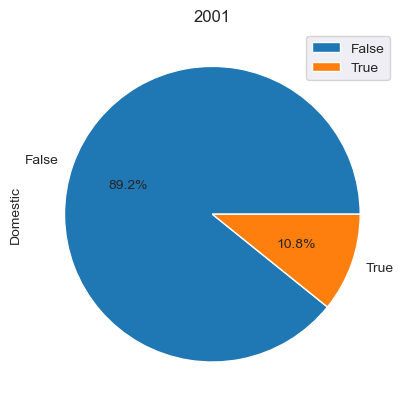

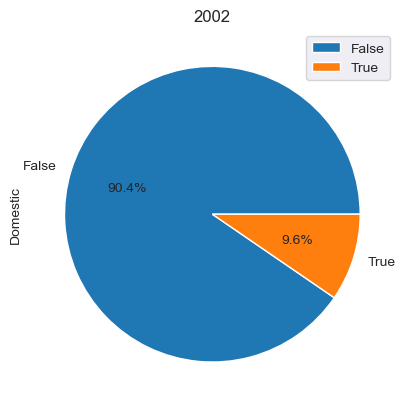

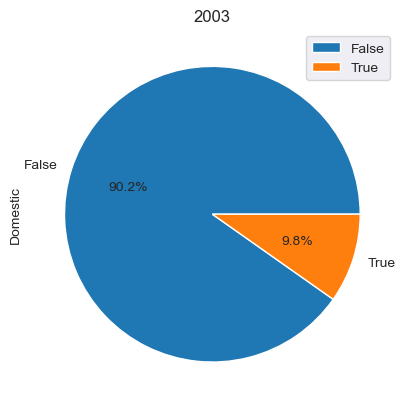

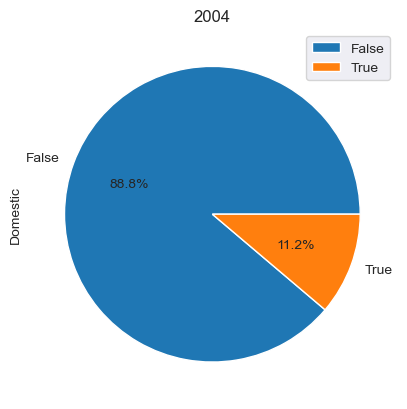

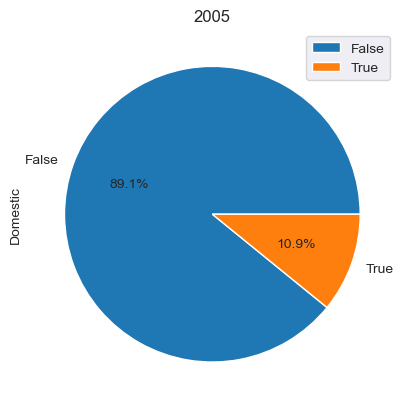

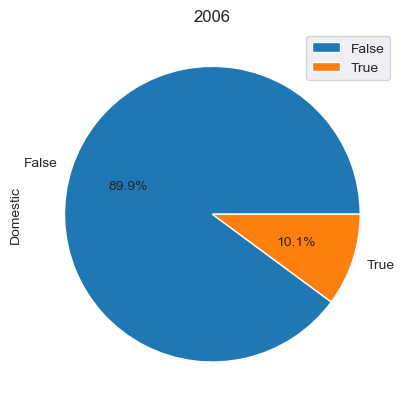

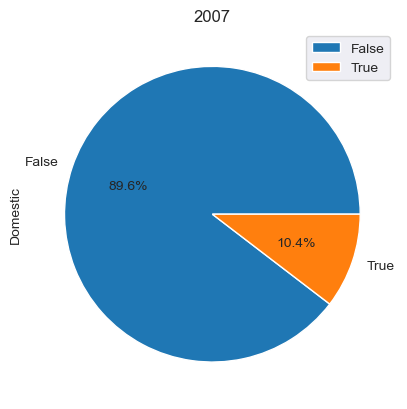

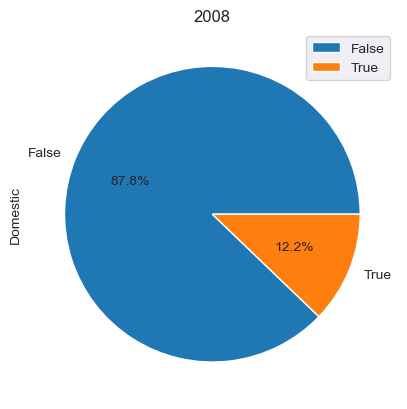

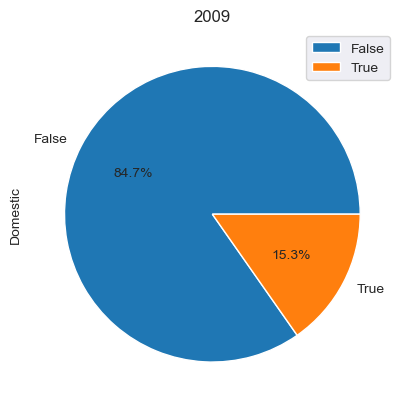

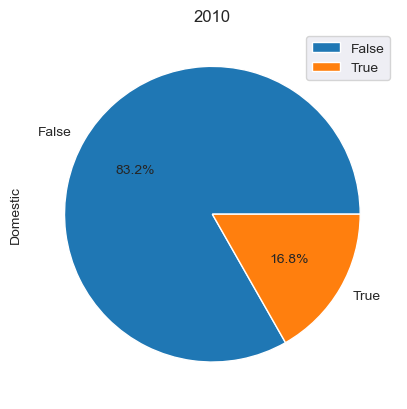

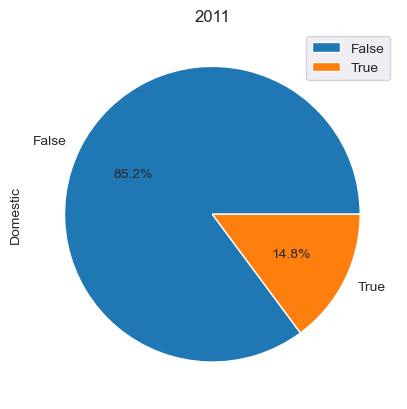

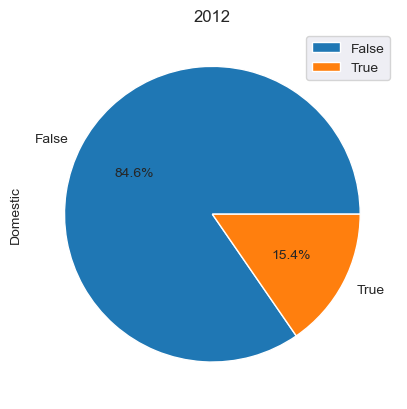

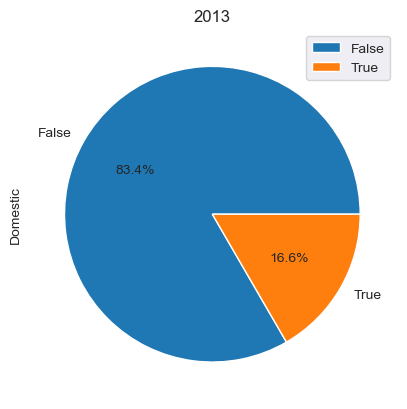

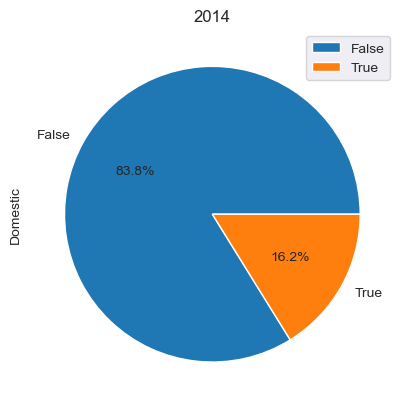

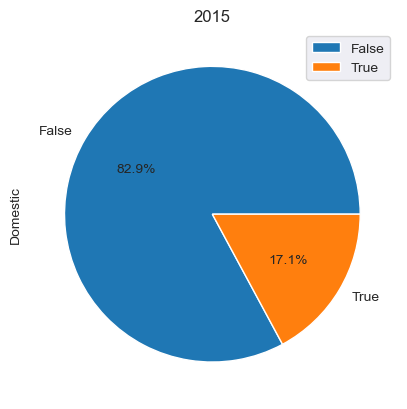

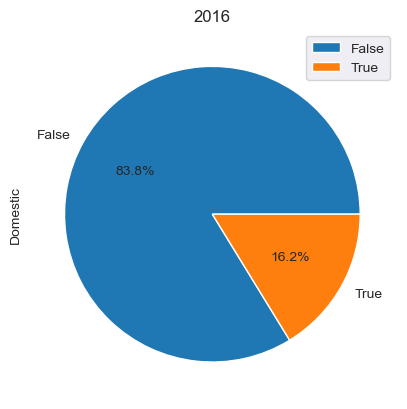

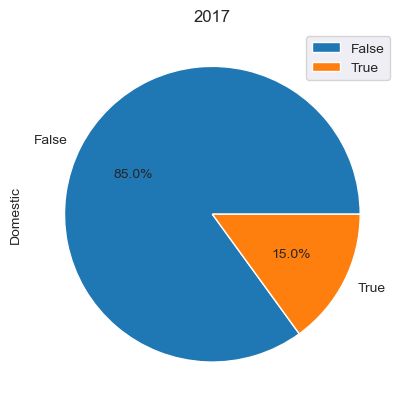

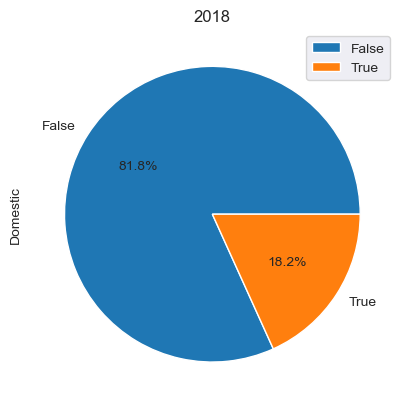

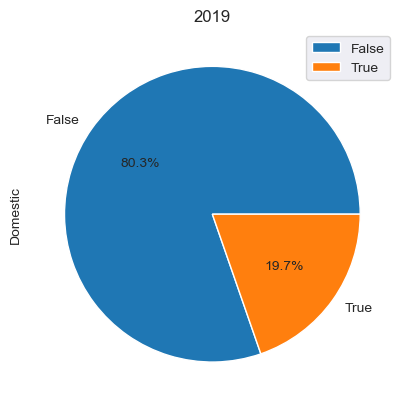

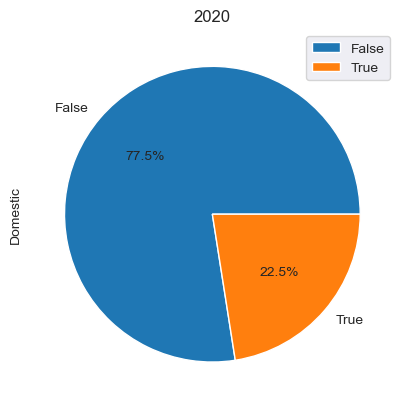

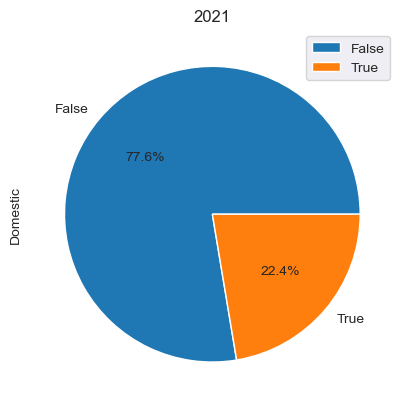

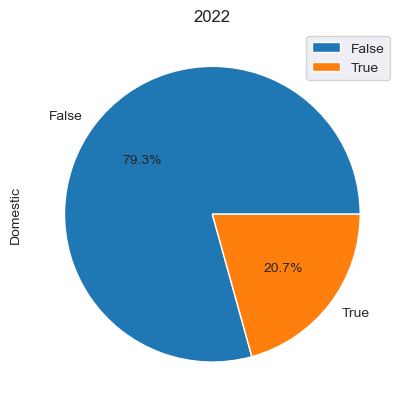

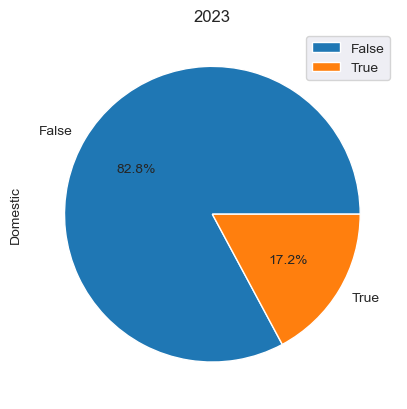

In [15]:
#mirem el percentatge dels crims que són domèstics
selected_df = pd.DataFrame()
for i in years:
    df_year = df_prova[df_prova.Dates.dt.year == i]
    
    selected_df["Domestic"] = df_year.groupby(df_year.Domestic).size()

    selected_df.plot.pie(y='Domestic', autopct='%1.1f%%', title = i);

In [16]:
domestic_df = pd.DataFrame(index=df_prova.Dates.dt.date)
domestic_df['Domestic'] = df_prova[df_prova["Domestic"] == True].groupby(df_prova.Dates.dt.date).size()
domestic_df['Non Domestic'] = df_prova[df_prova["Domestic"] == False].groupby(df_prova.Dates.dt.date).size()

In [17]:
domestic_df.fillna(0)

Domestic  Non Domestic
Dates                             
2015-09-05       0.0          11.0
2015-09-06       3.0           4.0
2015-09-06       3.0           4.0
2017-10-08       0.0           5.0
2017-08-26       1.0          10.0
...              ...           ...
2022-11-02       3.0           5.0
2022-10-22       1.0          13.0
2022-10-27       0.0           7.0
2022-03-01       5.0          14.0
2022-12-26       0.0           5.0

[54421 rows x 2 columns]

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


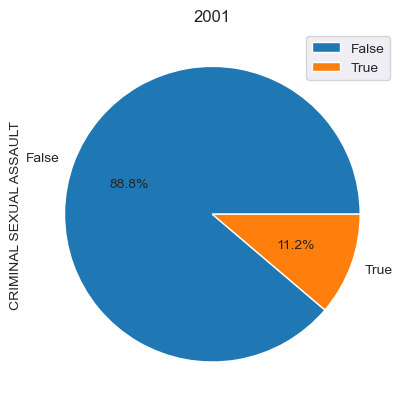

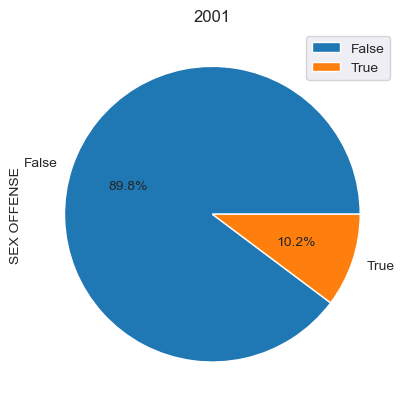

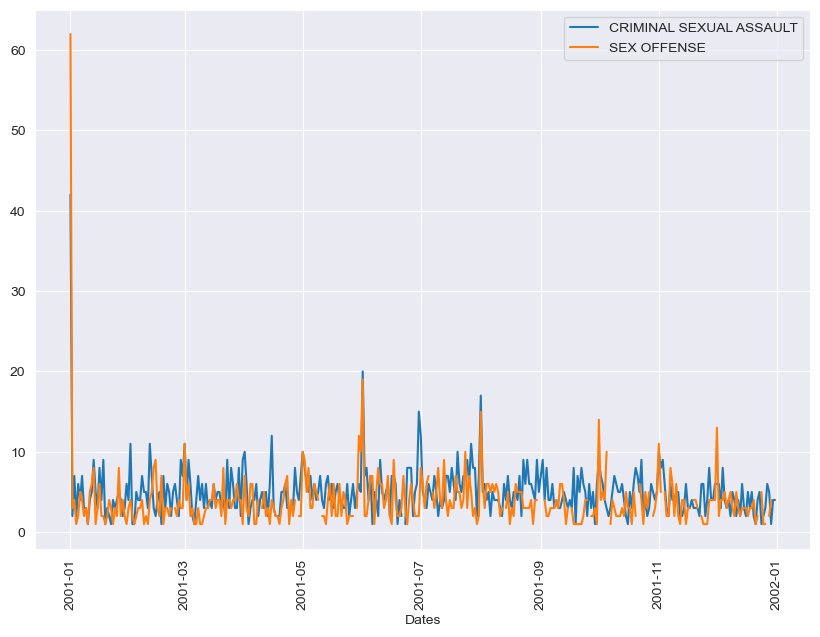

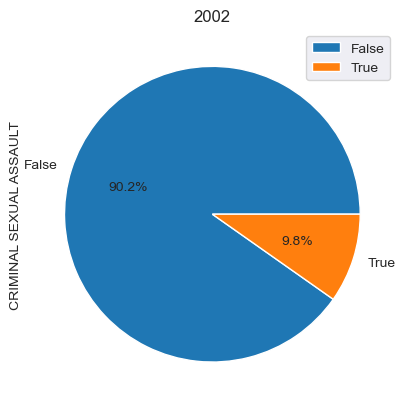

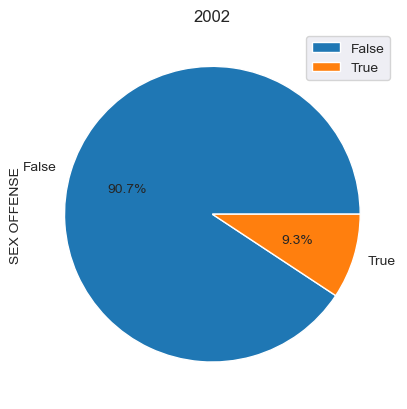

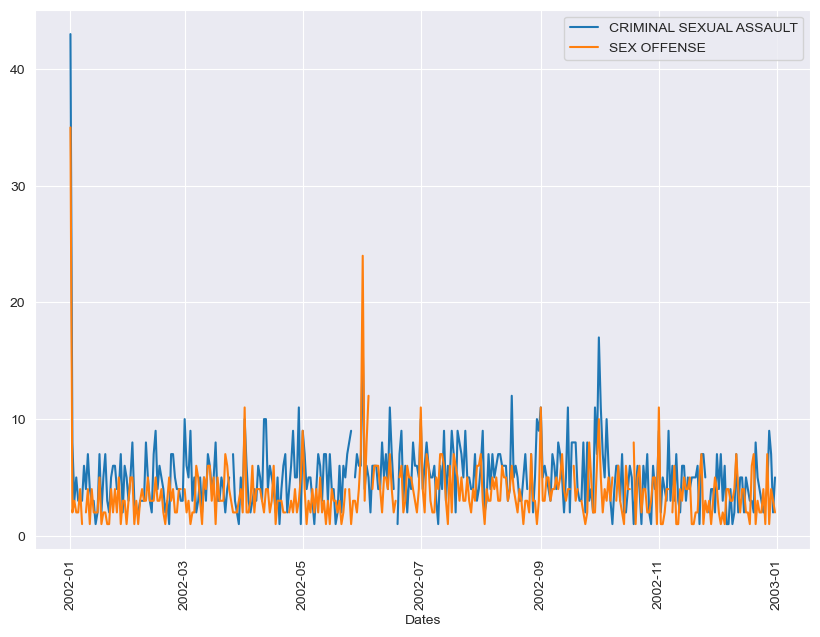

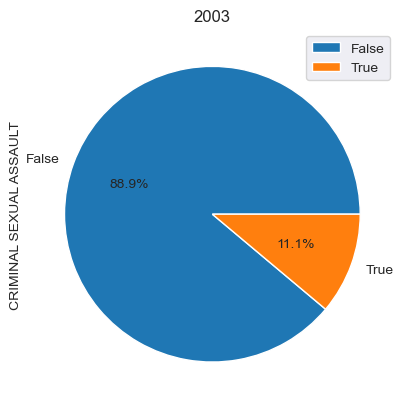

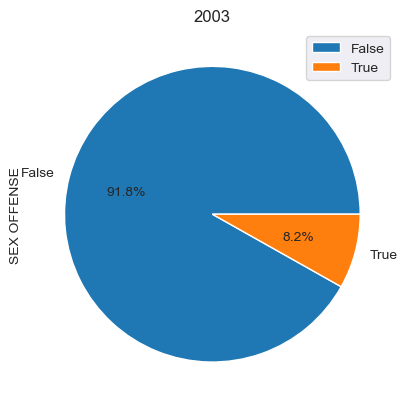

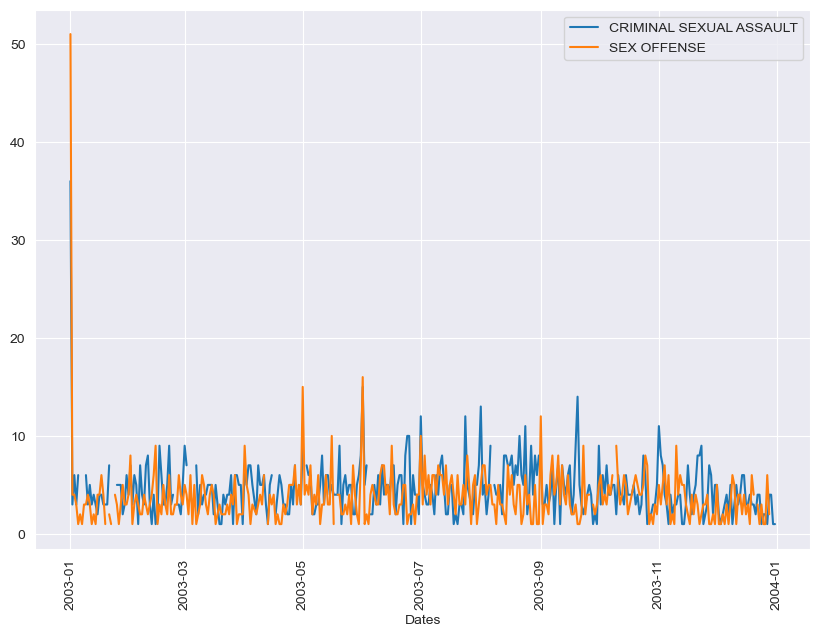

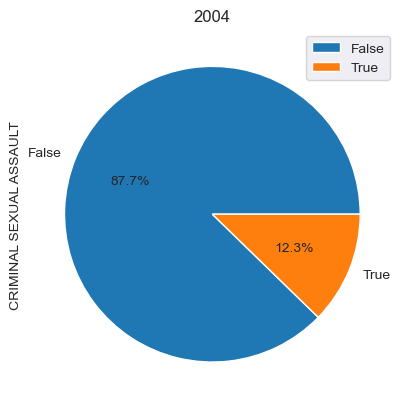

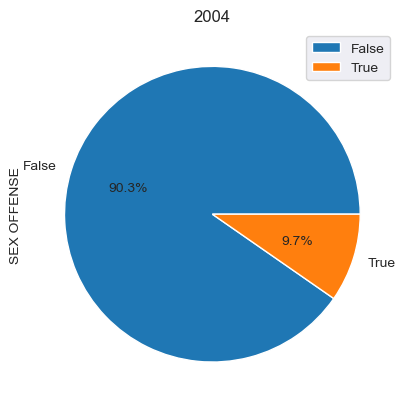

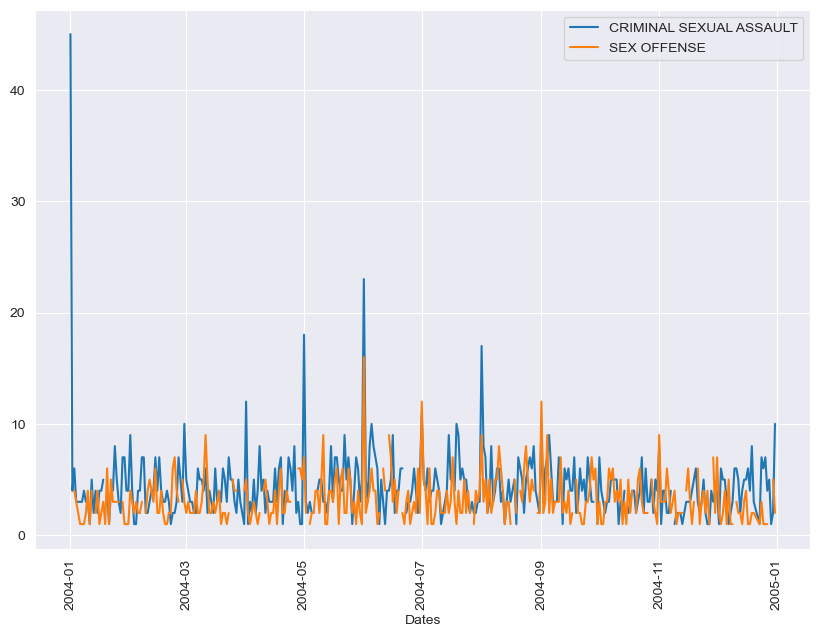

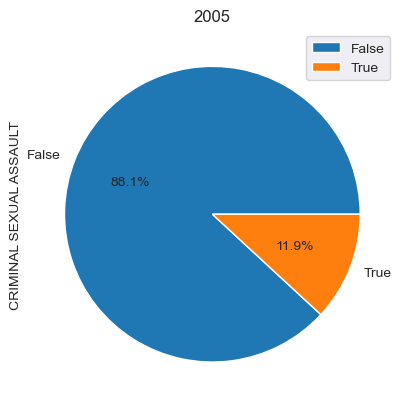

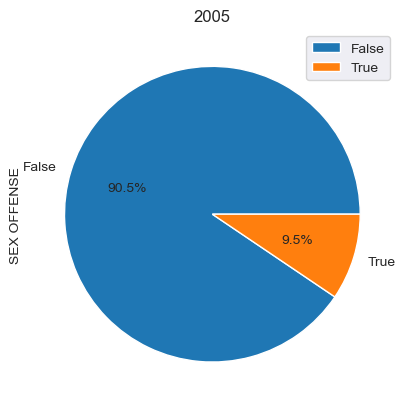

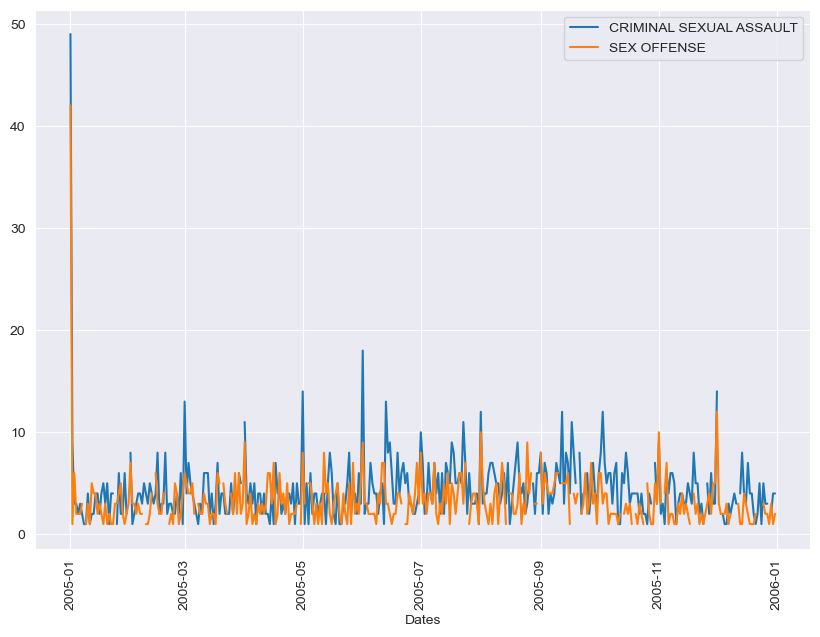

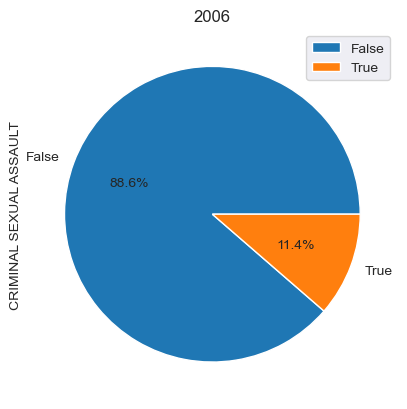

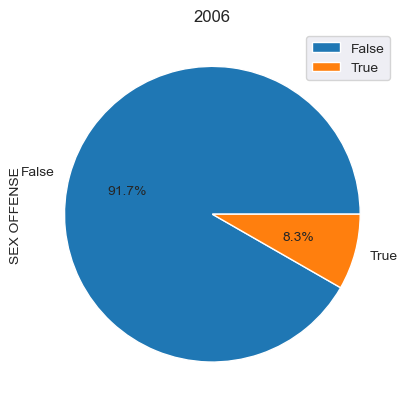

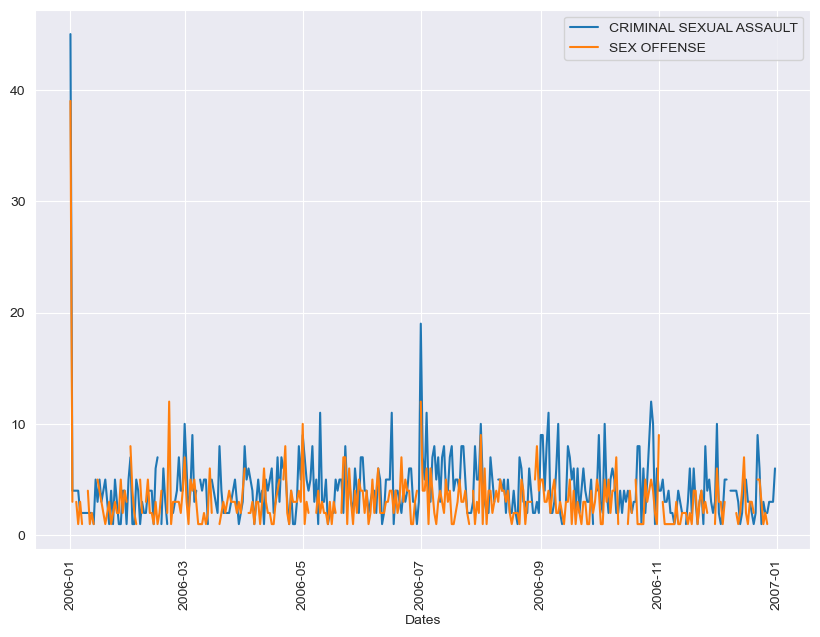

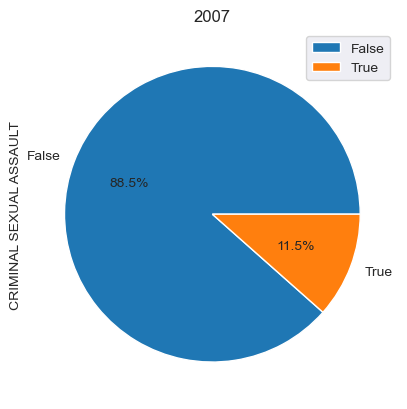

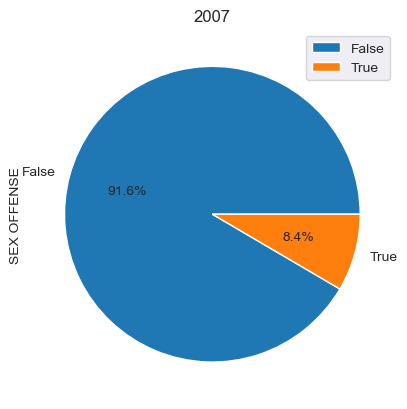

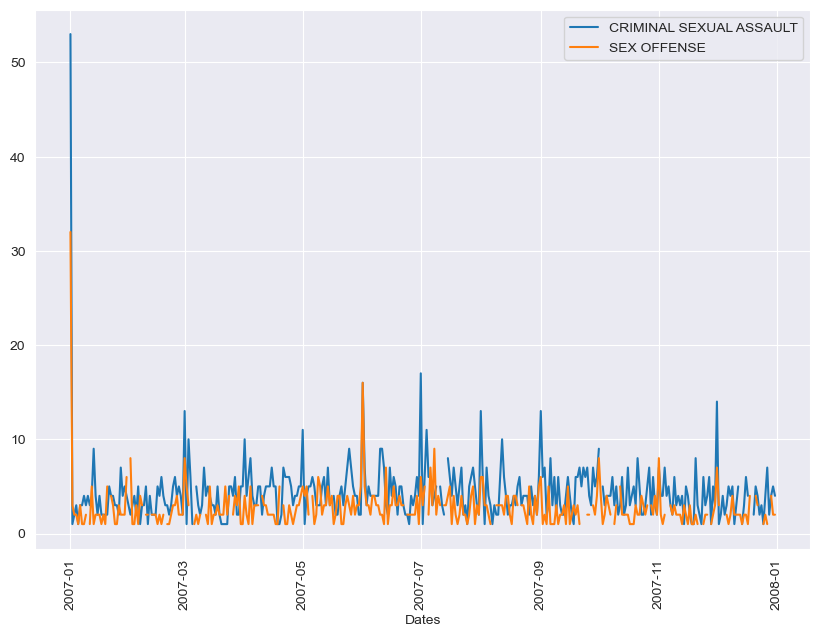

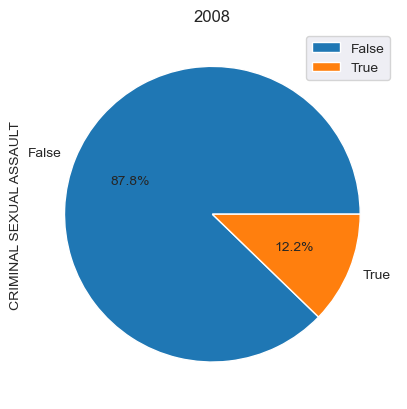

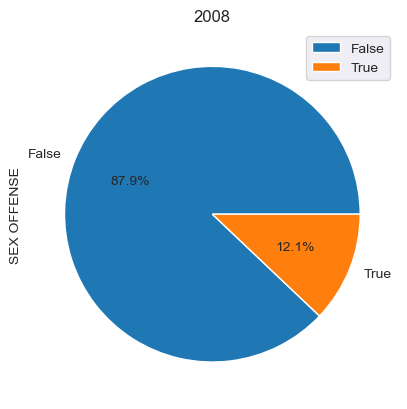

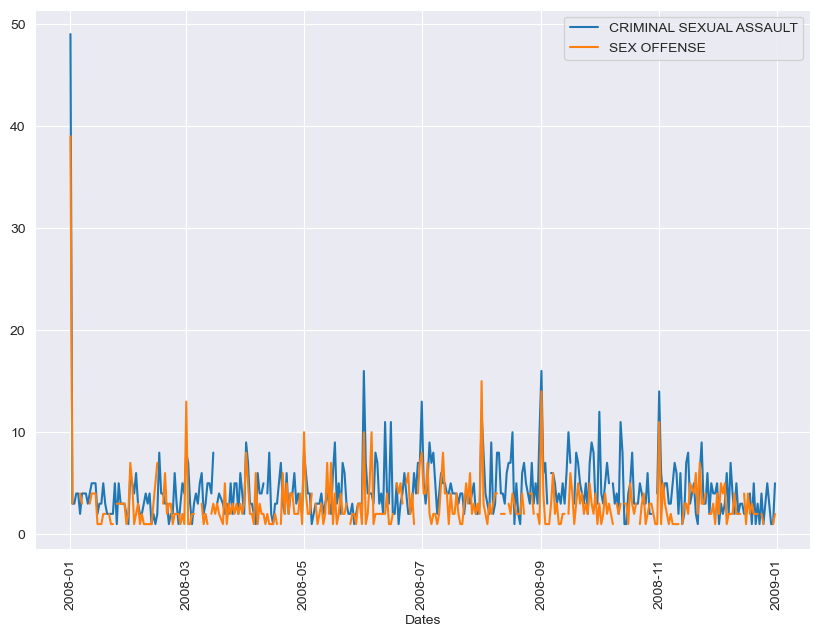

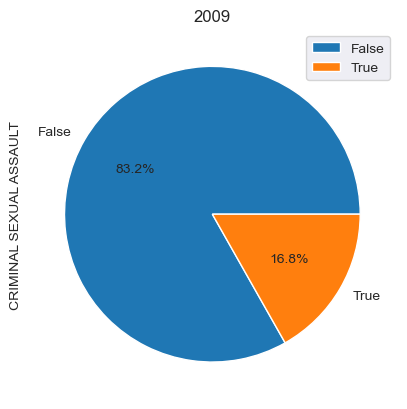

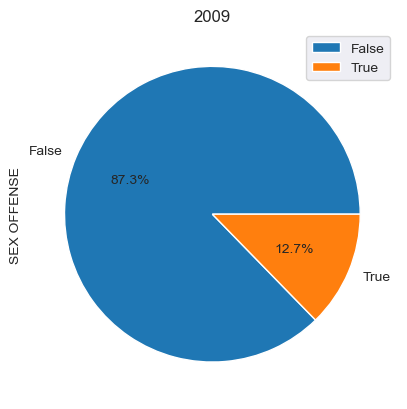

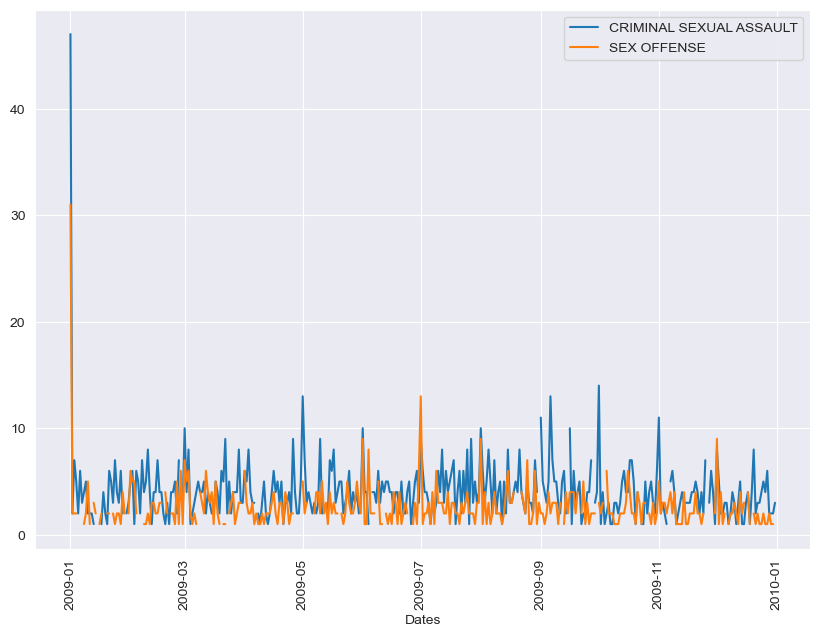

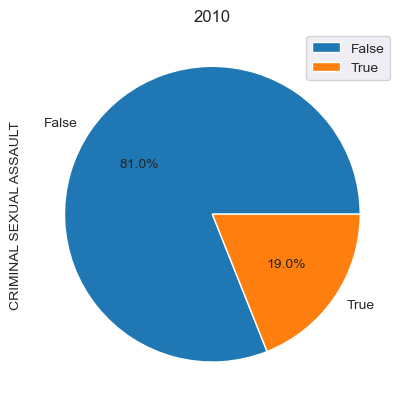

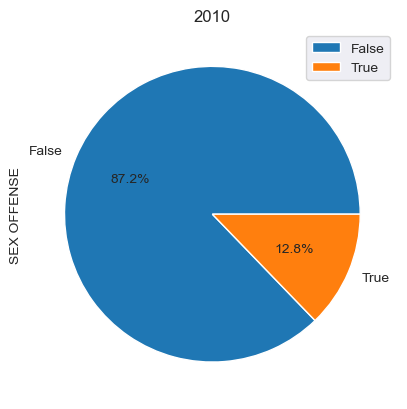

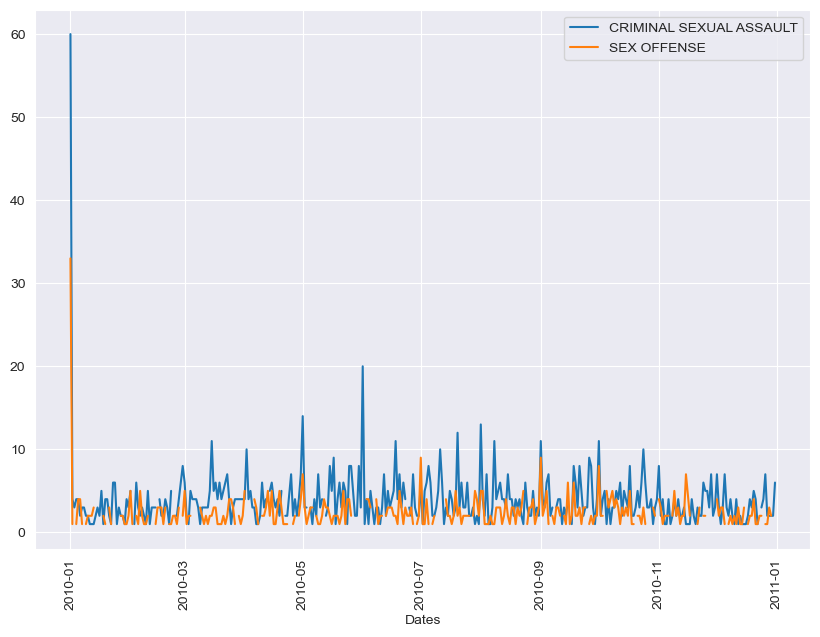

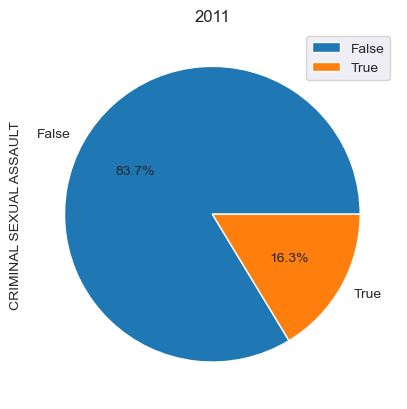

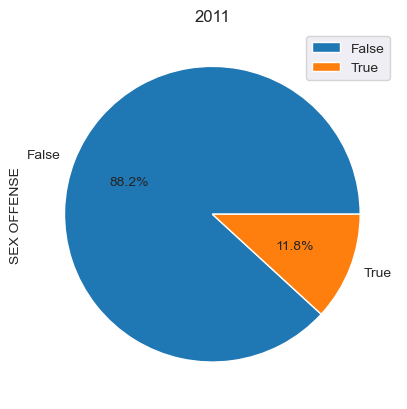

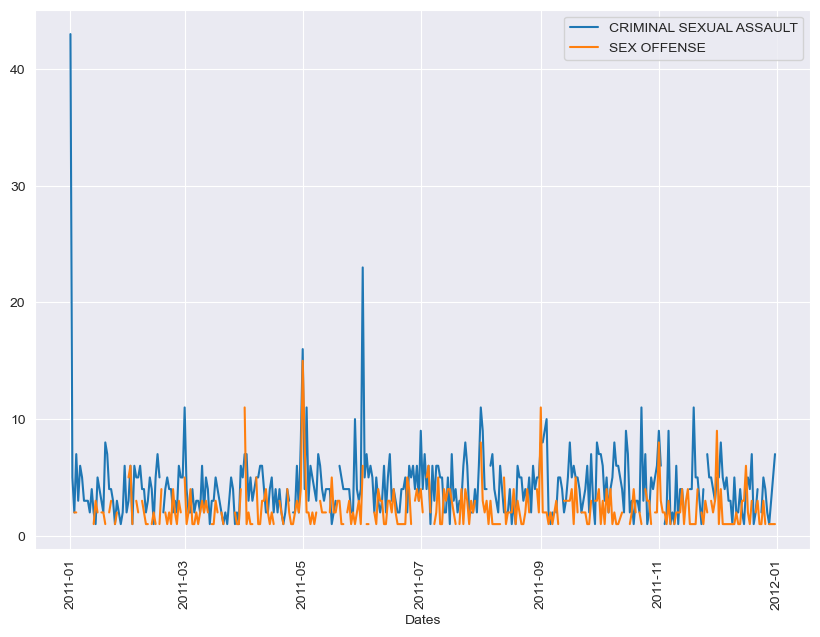

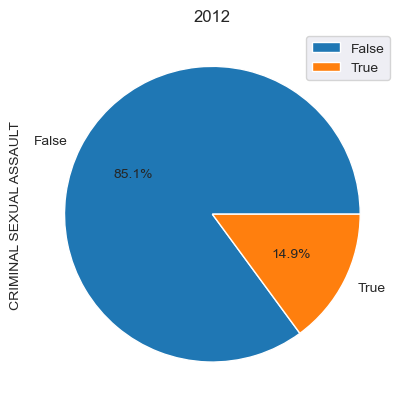

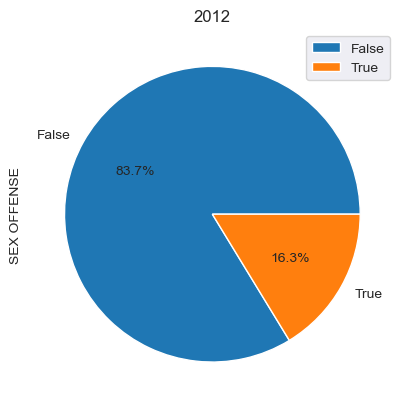

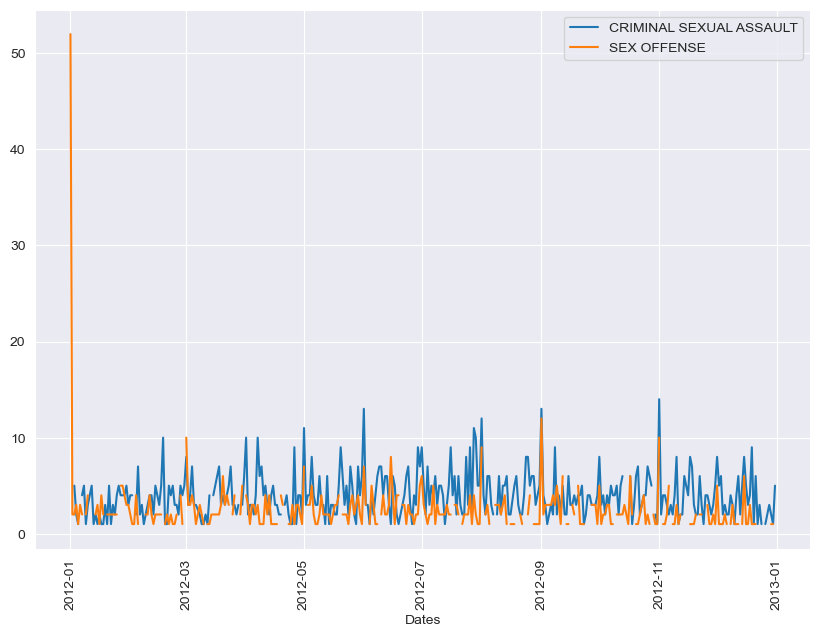

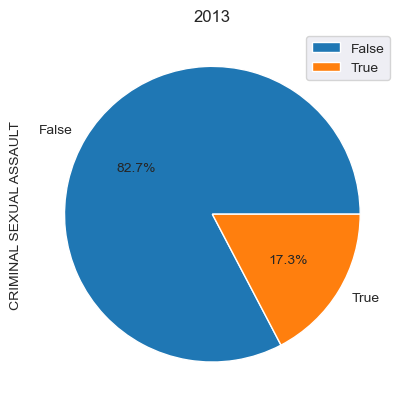

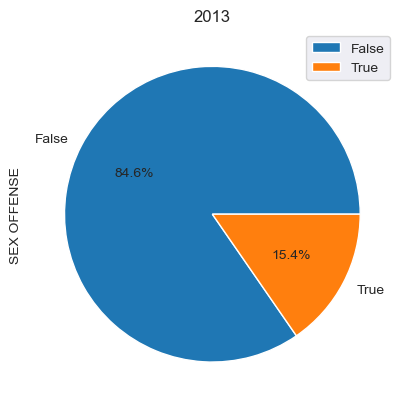

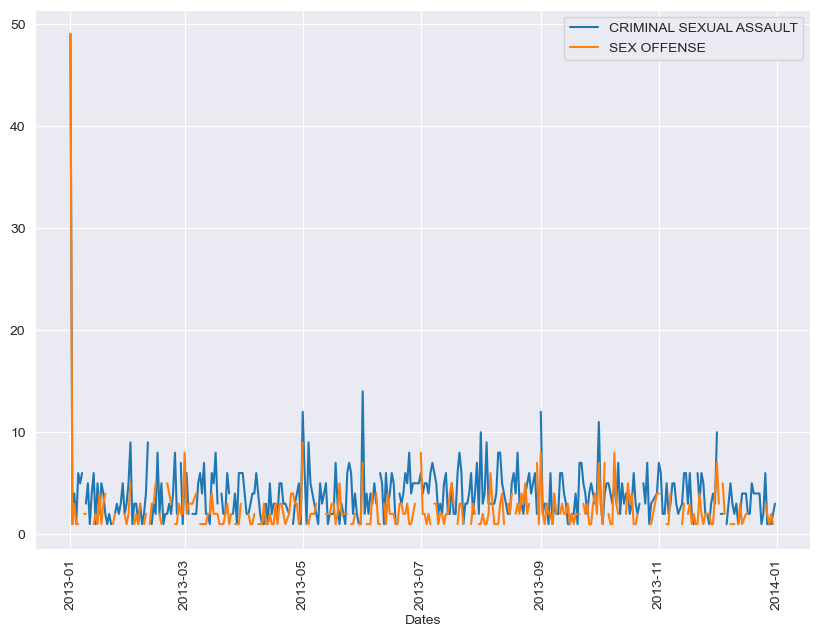

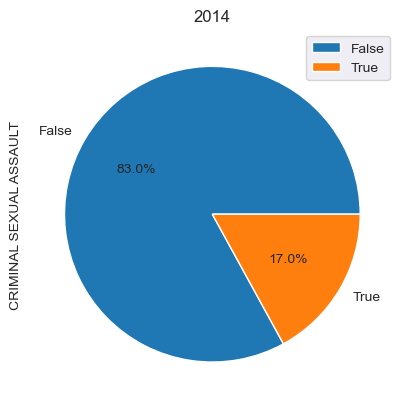

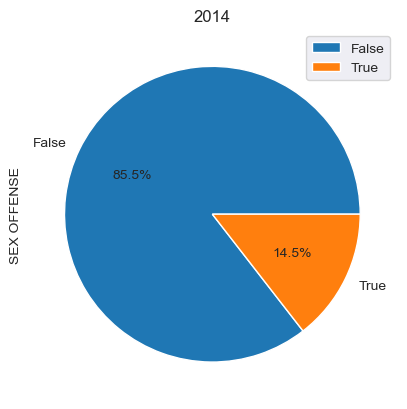

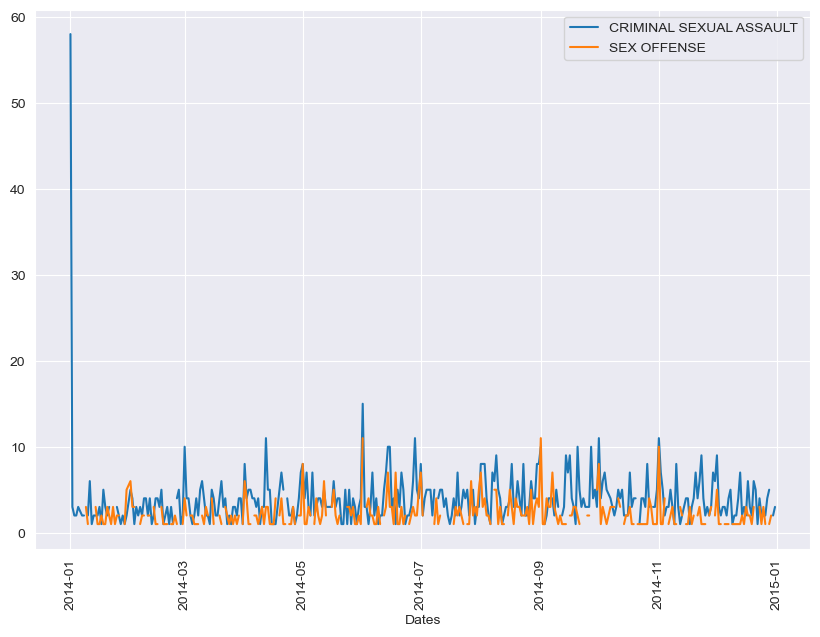

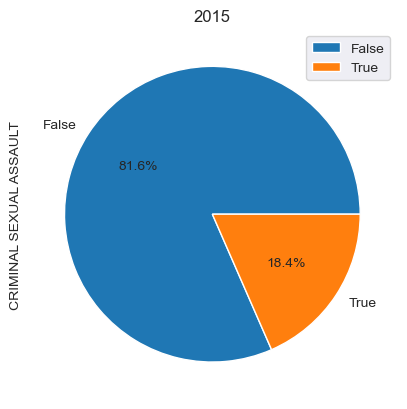

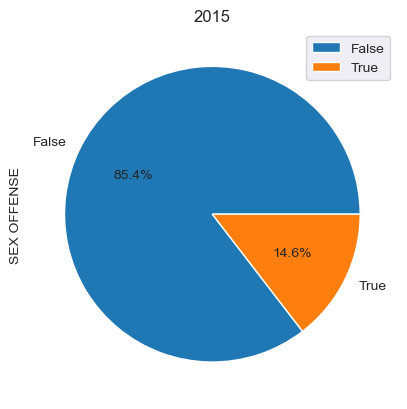

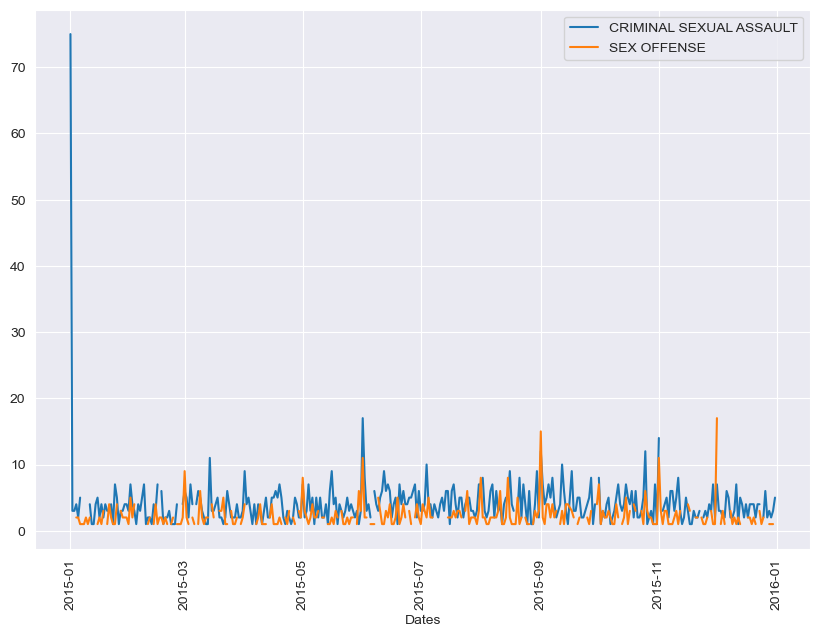

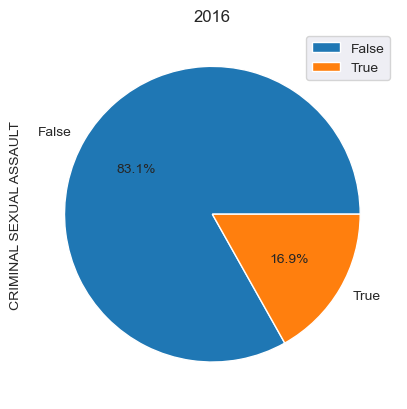

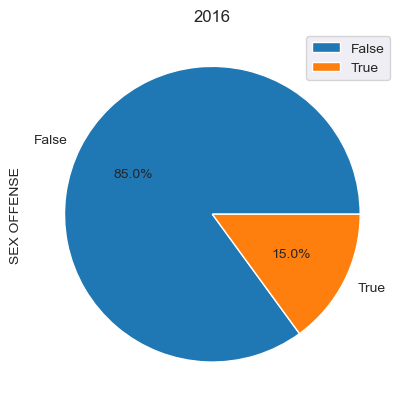

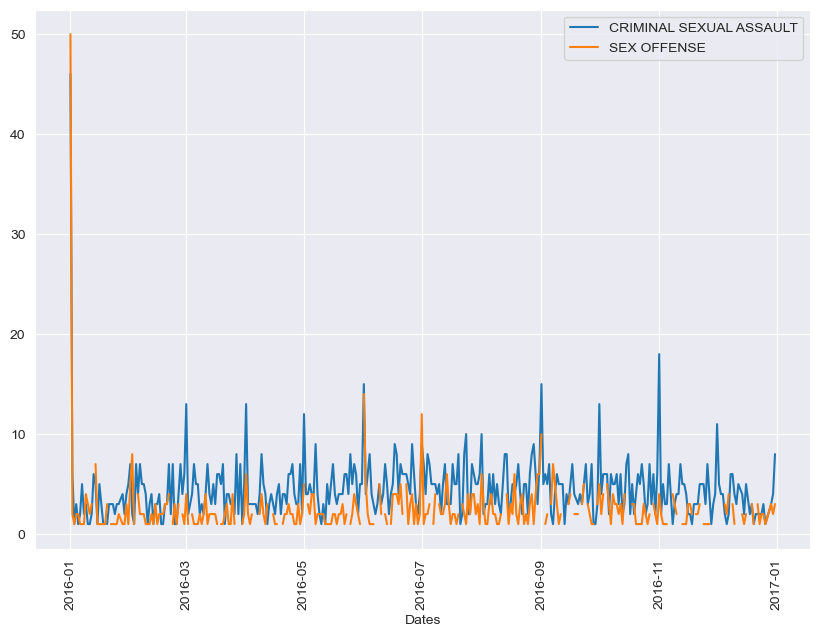

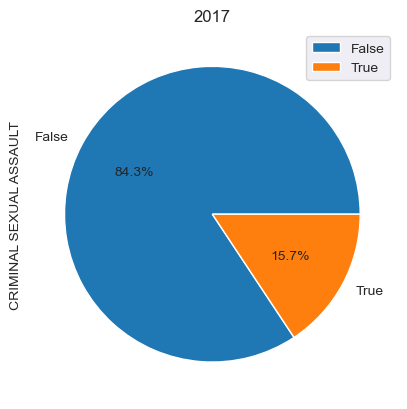

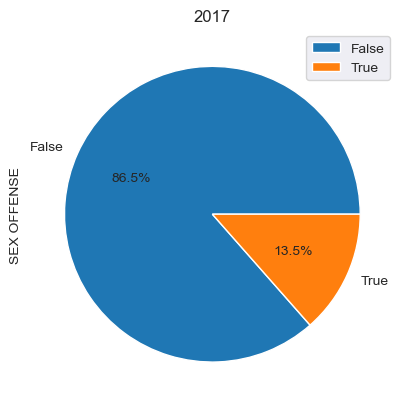

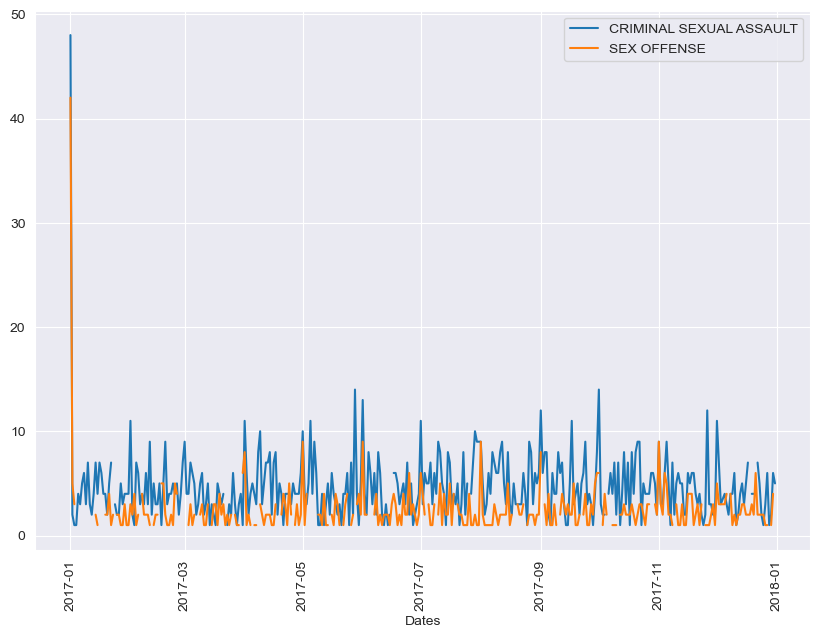

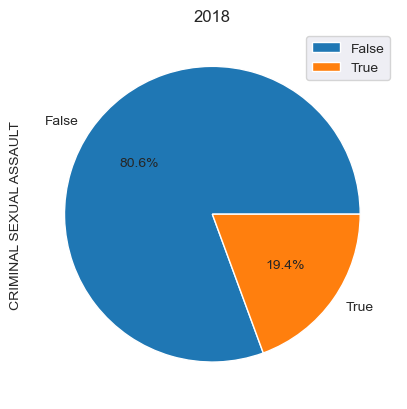

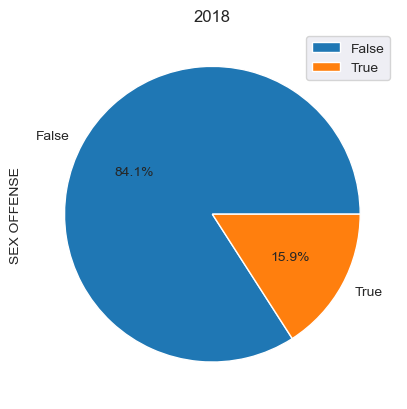

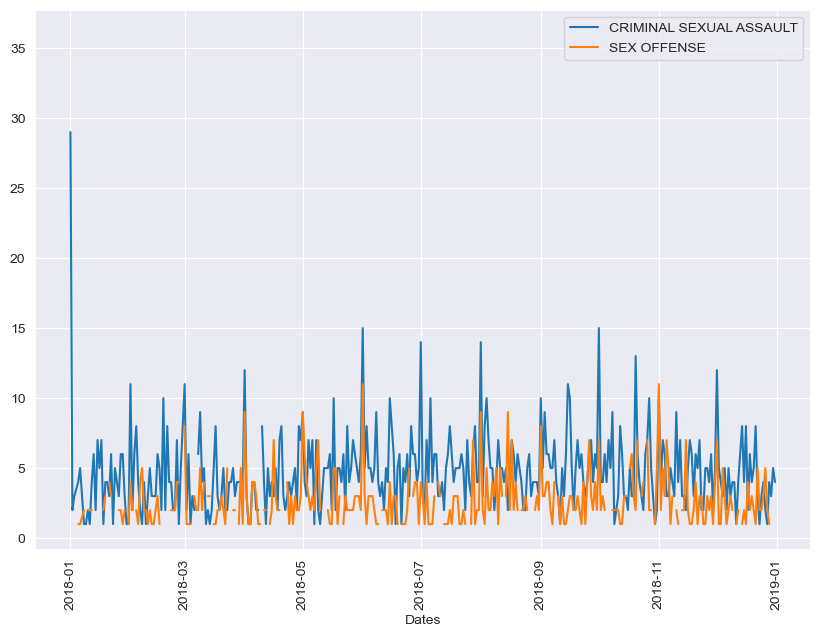

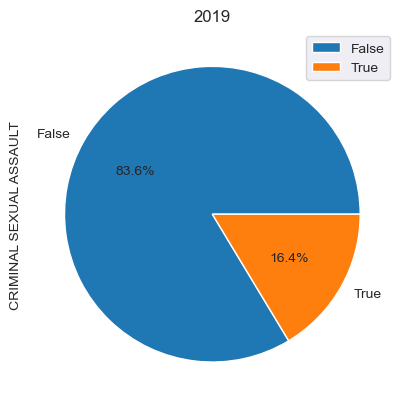

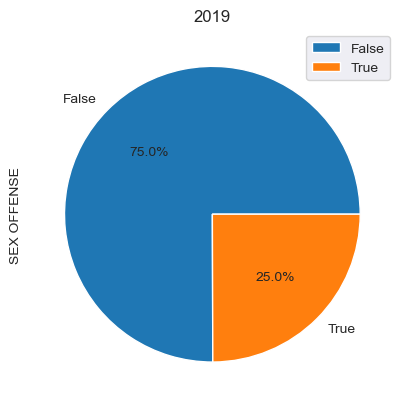

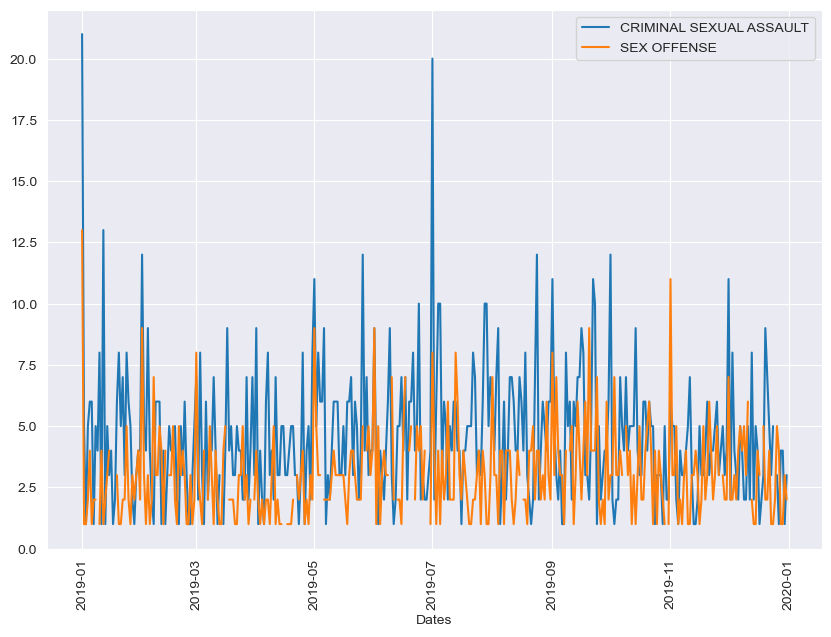

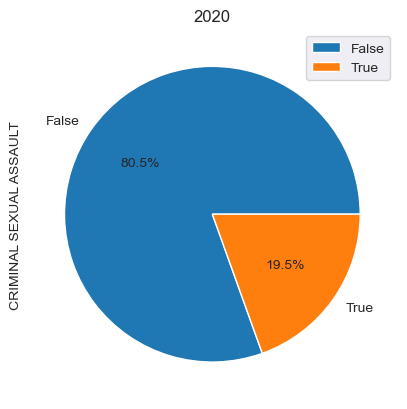

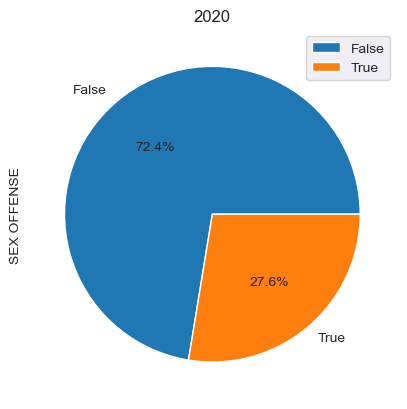

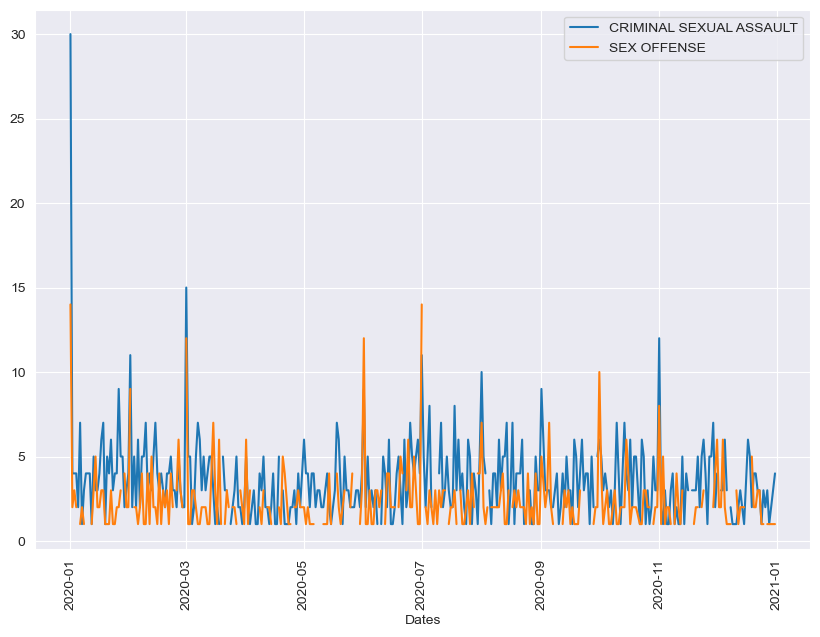

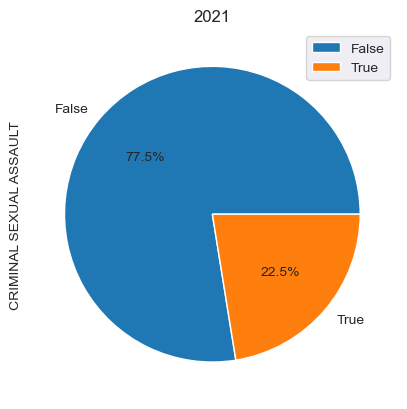

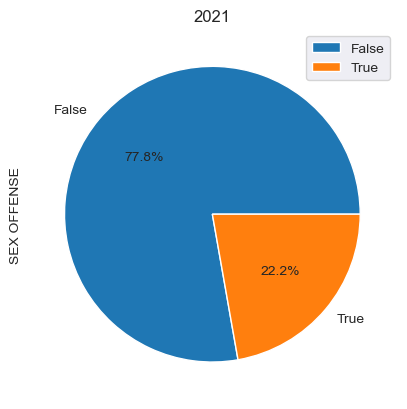

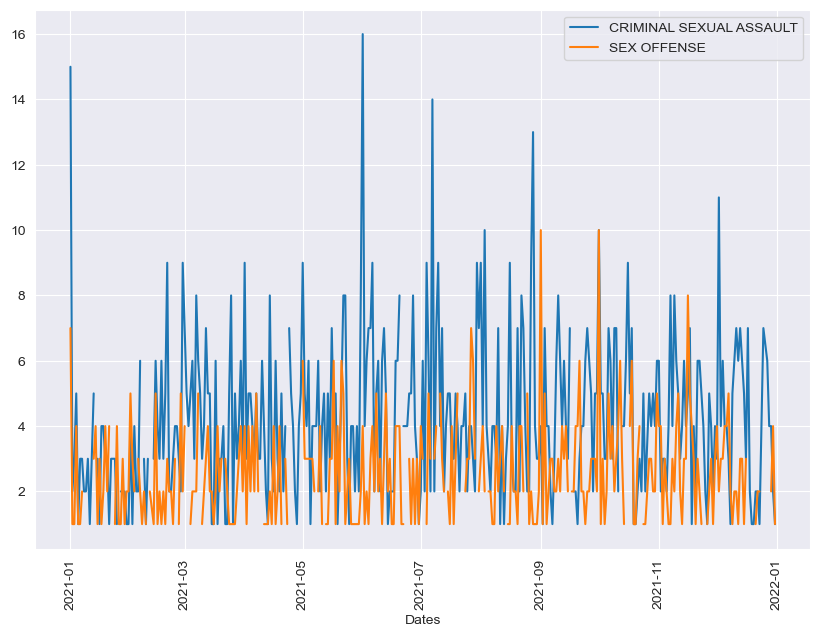

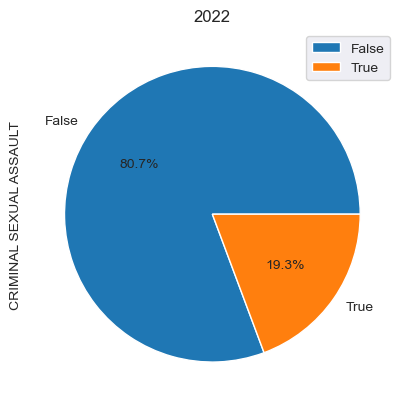

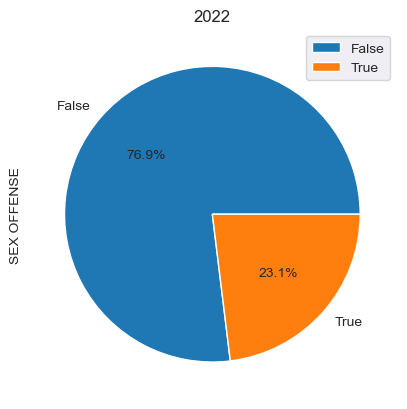

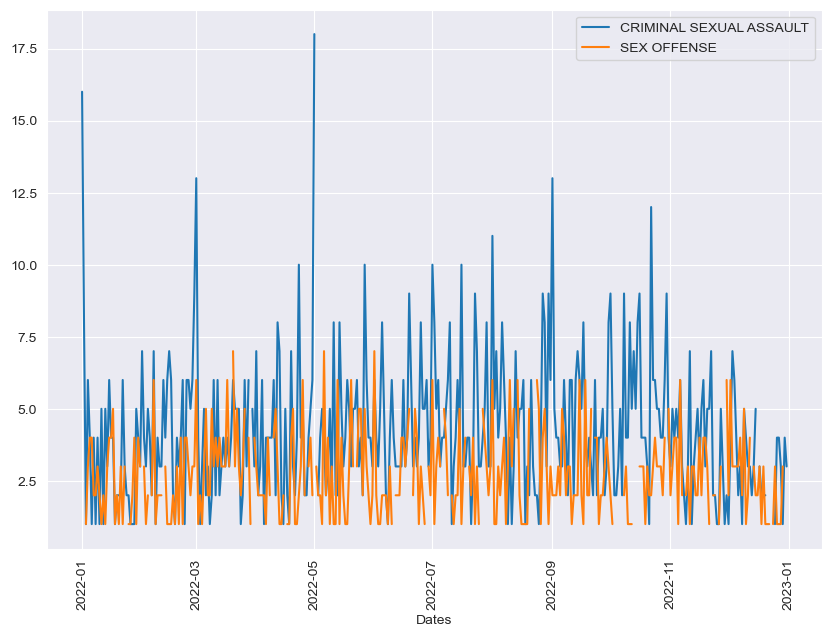

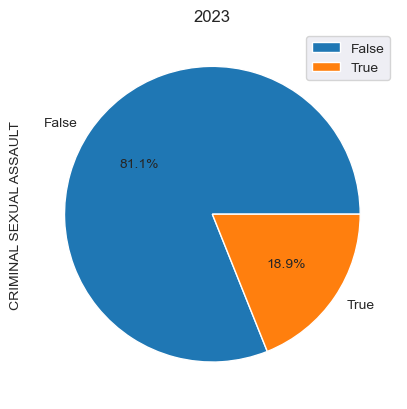

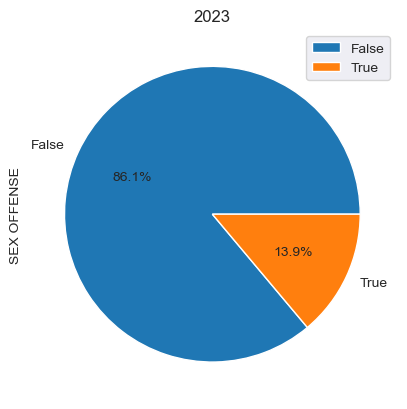

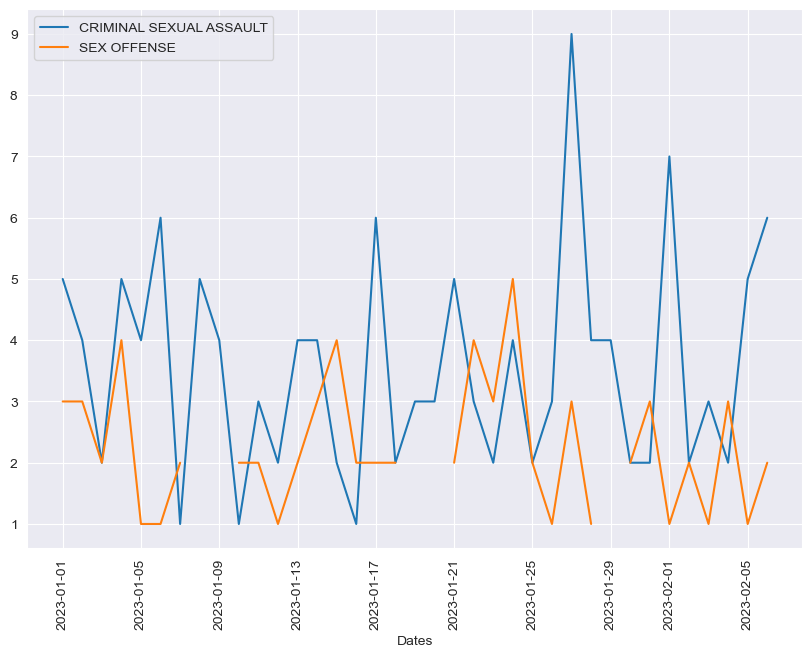

In [18]:
#sex offense vs criminal sexual assault
df3 = pd.DataFrame()
for i in years:
    df_year = df_prova[df_prova.Dates.dt.year == i]

    selected_df = pd.DataFrame(index=df_year.Dates.dt.date)

    for primary_type in selected_types:
        selected_df[primary_type] = df_year[df_year["Primary Type"] == primary_type].groupby(df_year.Dates.dt.date).size()
        df3[primary_type] = df_year[df_year["Primary Type"] == primary_type].groupby(df_year.Domestic).size()
        df3.plot.pie(y= primary_type, autopct='%1.1f%%', title = i);

    selected_df.plot(rot=90, figsize=(10, 7));

In [19]:
df_years= df_prova.groupby(df.Dates.dt.year).size().to_frame()
df_years = df_years.rename(columns = {0:'Agressions'})[:-1]
df_years

Agressions
Dates            
2001         3167
2002         3148
2003         2959
2004         2707
2005         2668
2006         2500
2007         2471
2008         2528
2009         2298
2010         2154
2011         2251
2012         2235
2013         2049
2014         2078
2015         2172
2016         2389
2017         2447
2018         2572
2019         2688
2020         1976
2021         2315
2022         2445

<AxesSubplot:xlabel='Dates'>

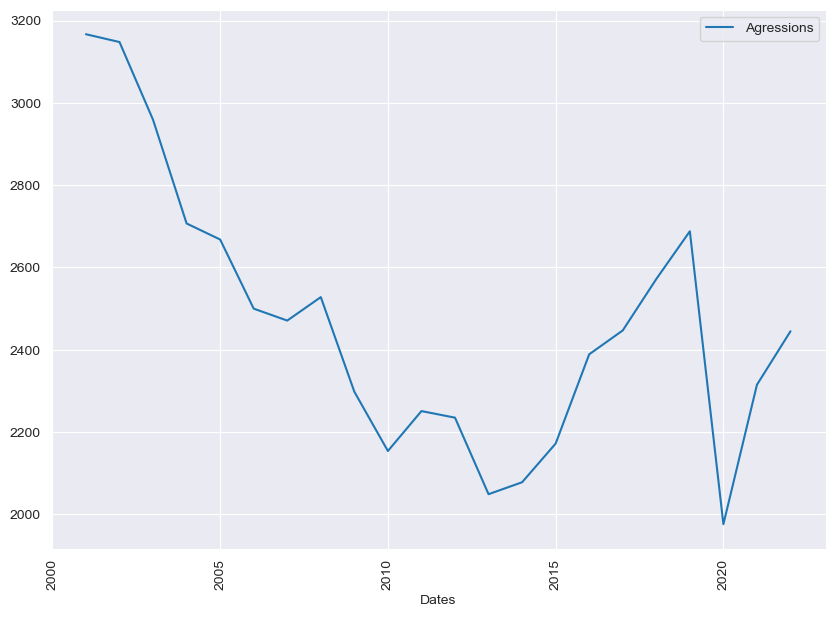

In [20]:
df_years.plot(rot=90, figsize=(10, 7))

## Mirant Agressions Crim Individual

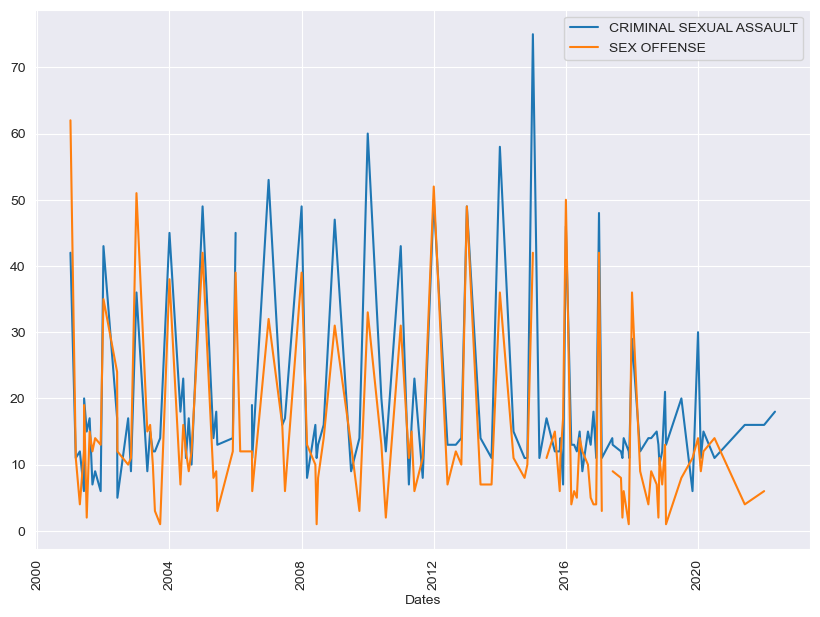

In [21]:
#número de crims diaris per sobre de 10 durant 23 anys
selected_df = pd.DataFrame(index=df_prova.Dates.dt.date)

for primary_type in selected_types:
    selected_df[primary_type] = df_prova[df_prova["Primary Type"] == primary_type].groupby(df_prova.Dates.dt.date).size()
    
selected_df = selected_df.drop_duplicates()
selected_df = selected_df[(selected_df['CRIMINAL SEXUAL ASSAULT'] > 10) | (selected_df['SEX OFFENSE'] > 10)]
selected_df.plot(rot=90, figsize=(10, 7));

In [22]:
selected_df

CRIMINAL SEXUAL ASSAULT  SEX OFFENSE
Dates                                           
2015-01-01                     75.0         42.0
2007-01-01                     53.0         32.0
2003-01-01                     36.0         51.0
2010-01-01                     60.0         33.0
2008-01-01                     49.0         39.0
...                             ...          ...
2019-07-01                     20.0          8.0
2020-03-01                     15.0         12.0
2021-06-01                     16.0          4.0
2022-01-01                     16.0          6.0
2022-05-01                     18.0          NaN

[112 rows x 2 columns]

In [23]:
#dates amb pics
for i in selected_df.index:
    if i.day != 1:
        print(i, selected_df[selected_df.index == i])

2015-10-25             CRIMINAL SEXUAL ASSAULT  SEX OFFENSE
Dates                                           
2015-10-25                     12.0          6.0
2006-07-04             CRIMINAL SEXUAL ASSAULT  SEX OFFENSE
Dates                                           
2006-07-04                     11.0          6.0
2017-05-28             CRIMINAL SEXUAL ASSAULT  SEX OFFENSE
Dates                                           
2017-05-28                     14.0          NaN
2017-09-17             CRIMINAL SEXUAL ASSAULT  SEX OFFENSE
Dates                                           
2017-09-17                     11.0          2.0
2017-11-26             CRIMINAL SEXUAL ASSAULT  SEX OFFENSE
Dates                                           
2017-11-26                     12.0          1.0
2019-01-12             CRIMINAL SEXUAL ASSAULT  SEX OFFENSE
Dates                                           
2019-01-12                     13.0          1.0
2015-03-14             CRIMINAL SEXUAL ASSAULT  SEX 

## Mirant Agressions Crim Col·lectiu

In [24]:
df_prova

ID Case Number                      Date  \
409      10225229    HY412204 2015-09-05 23:15:00+00:00   
430      10225252    HY412283 2015-09-06 00:50:00+00:00   
457      10225283    HY412303 2015-09-06 01:59:00+00:00   
467      11227287    JB147188 2017-10-08 03:00:00+00:00   
478      11227634    JB147599 2017-08-26 10:00:00+00:00   
...           ...         ...                       ...   
7733373  12935959    JF512777 2022-11-02 20:00:00+00:00   
7733400  12935072    JF525494 2022-10-22 15:00:00+00:00   
7733438  12935963    JF524912 2022-10-27 14:37:00+00:00   
7733439  12935475    JF525827 2022-03-01 12:00:00+00:00   
7733557  12936497    JF527057 2022-12-26 06:00:00+00:00   

                            Block  IUCR             Primary Type  \
409             066XX S HONORE ST  1563              SEX OFFENSE   
430      059XX W BELLE PLAINE AVE  0281  CRIMINAL SEXUAL ASSAULT   
457          053XX S LAWNDALE AVE  0291  CRIMINAL SEXUAL ASSAULT   
467            092XX S RACINE AVE  0281  CRIMINAL SEXUAL ASSAULT   
478           001XX W RANDOLPH ST  0281  CRIMINAL SEXUAL ASSAULT   
...                           ...   ...                      ...   
7733373    089XX S COMMERCIAL AVE  0291  CRIMINAL SEXUAL ASSAULT   
7733400        078XX S YATES BLVD  0281  CRIMINAL SEXUAL ASSAULT   
7733438         067XX S UNION AVE  1562              SEX OFFENSE   
7733439       034XX W FULTON BLVD  0281  CRIMINAL SEXUAL ASSAULT   
7733557           035XX W POLK ST  0281  CRIMINAL SEXUAL ASSAULT   

                              Description       Location Description  Arrest  \
409                 CRIMINAL SEXUAL ABUSE                  APARTMENT   False   
430                        NON-AGGRAVATED                  APARTMENT   False   
457                ATTEMPT NON-AGGRAVATED                  RESIDENCE    True   
467                        NON-AGGRAVATED                  RESIDENCE   False   
478                        NON-AGGRAVATED                HOTEL/MOTEL   False   
...                                   ...                        ...     ...   
7733373            ATTEMPT NON-AGGRAVATED                  APARTMENT   False   
7733400                    NON-AGGRAVATED                  APARTMENT   False   
7733438  AGGRAVATED CRIMINAL SEXUAL ABUSE                  RESIDENCE   False   
7733439                    NON-AGGRAVATED  SCHOOL - PRIVATE BUILDING   False   
7733557                    NON-AGGRAVATED                  APARTMENT   False   

         Domestic  ...  FBI Code  X Coordinate  Y Coordinate  Year  \
409         False  ...        17     1165157.0     1860630.0  2015   
430          True  ...        02     1135859.0     1926645.0  2015   
457          True  ...        02     1152615.0     1868916.0  2015   
467         False  ...        02           NaN           NaN  2017   
478         False  ...        02           NaN           NaN  2017   
...           ...  ...       ...           ...           ...   ...   
7733373      True  ...        02     1197698.0     1846203.0  2022   
7733400     False  ...        02     1193559.0     1853415.0  2022   
7733438     False  ...        17     1172898.0     1860262.0  2022   
7733439     False  ...        02     1153349.0     1901783.0  2022   
7733557     False  ...        02     1153005.0     1896144.0  2022   

                     Updated On   Latitude  Longitude  \
409      02/10/2018 03:50:01 PM  41.773166 -87.670128   
430      02/10/2018 03:50:01 PM  41.954891 -87.775958   
457      02/10/2018 03:50:01 PM  41.796160 -87.715886   
467      02/11/2018 03:57:41 PM        NaN        NaN   
478      02/11/2018 03:57:41 PM        NaN        NaN   
...                         ...        ...        ...   
7733373  01/03/2023 03:46:28 PM  41.732827 -87.551323   
7733400  01/03/2023 03:46:28 PM  41.752719 -87.566250   
7733438  01/03/2023 03:46:28 PM  41.771989 -87.641762   
7733439  01/03/2023 03:46:28 PM  41.886337 -87.712323   
7733557  01/03/2023 03:46:28 PM  41.870870 -87.713736   

  

In [25]:
new_df = df_prova.groupby(df.Dates).size().to_frame()
new_df = new_df.rename(columns = {0:'Agressions'})
new_df

Agressions
Dates                 
2001-01-01         104
2001-01-02           5
2001-01-03          11
2001-01-04           3
2001-01-05           8
...                ...
2023-02-02           4
2023-02-03           4
2023-02-04           5
2023-02-05           6
2023-02-06           8

[8023 rows x 1 columns]

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


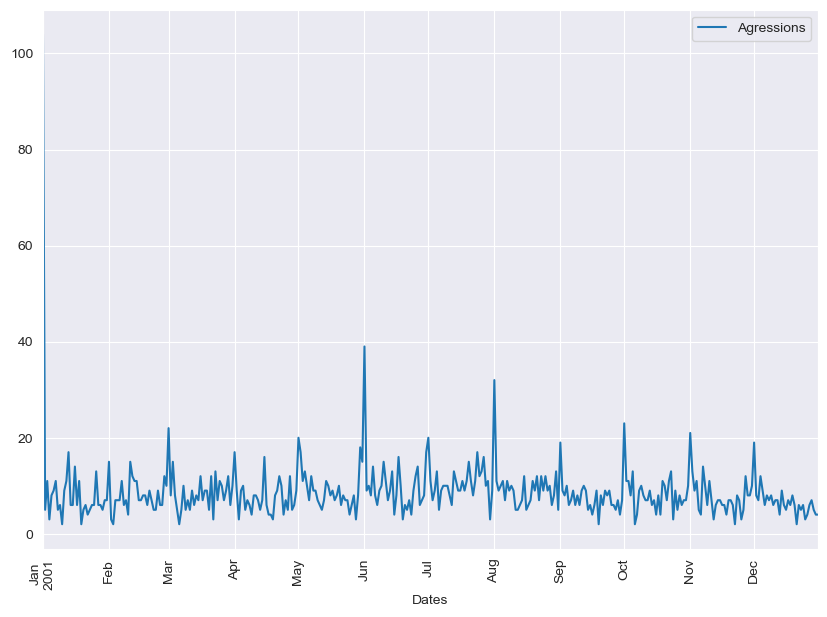

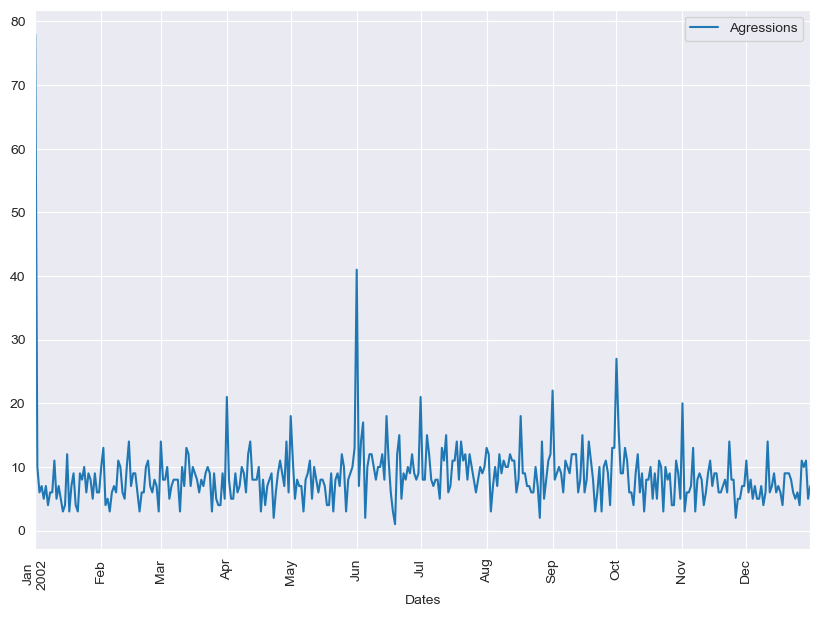

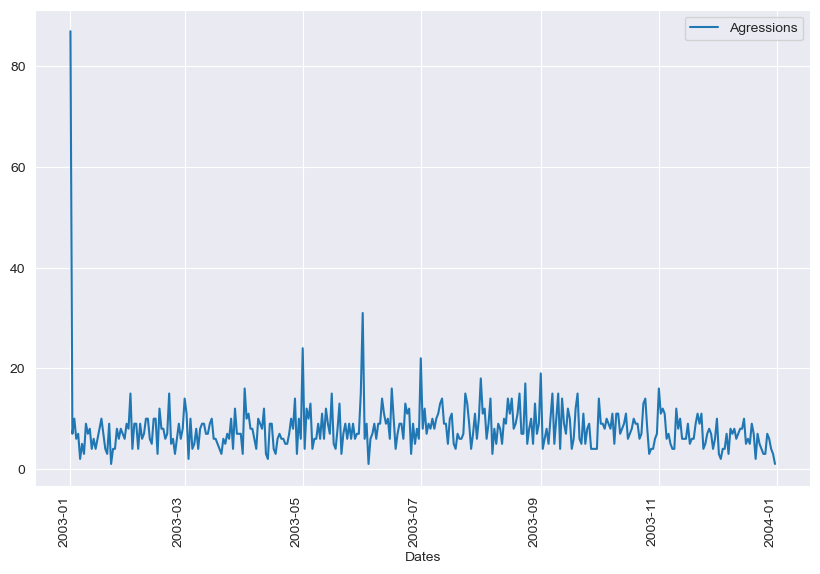

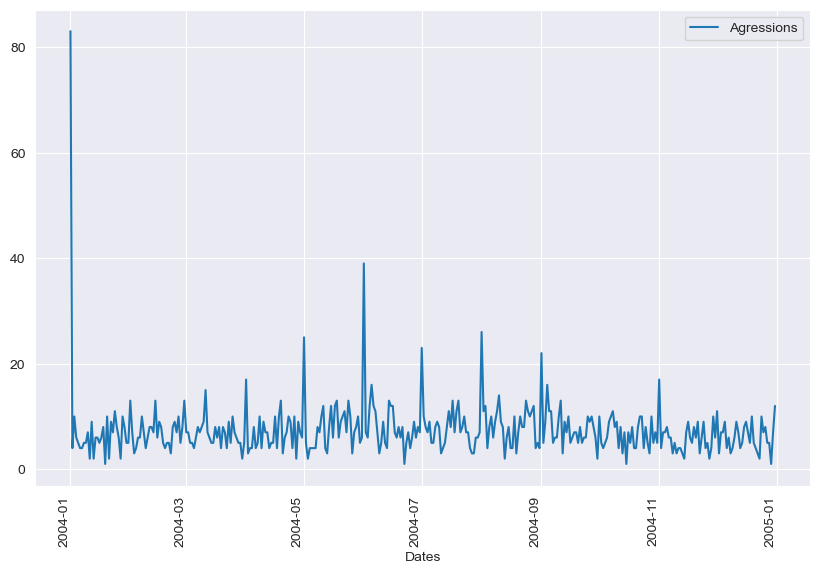

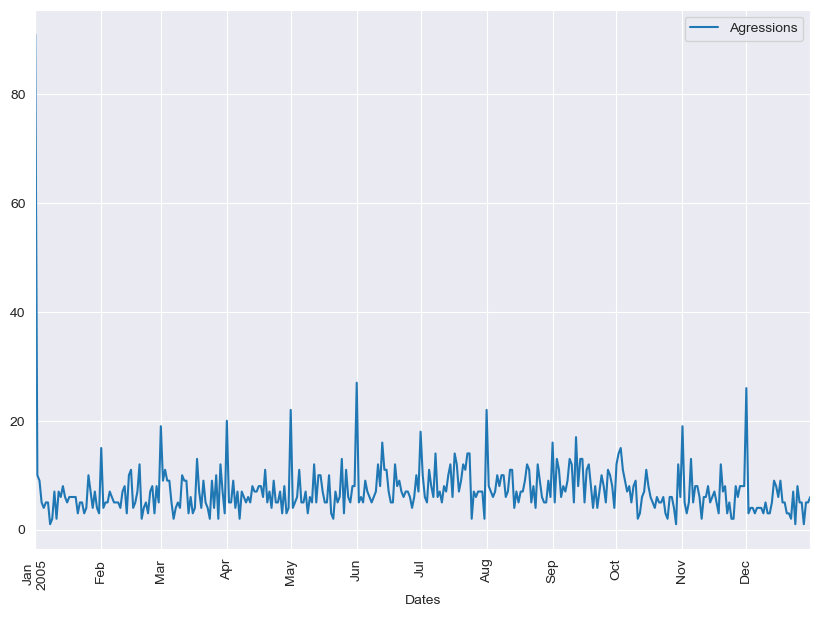

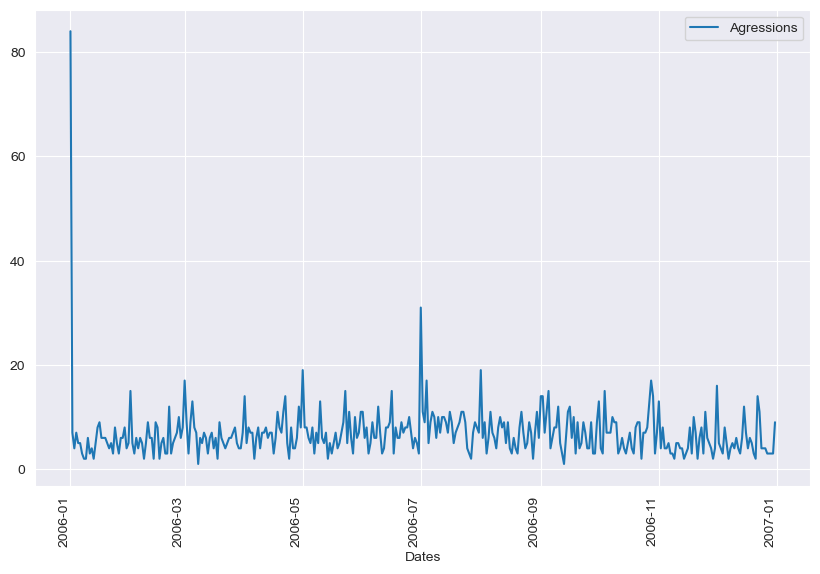

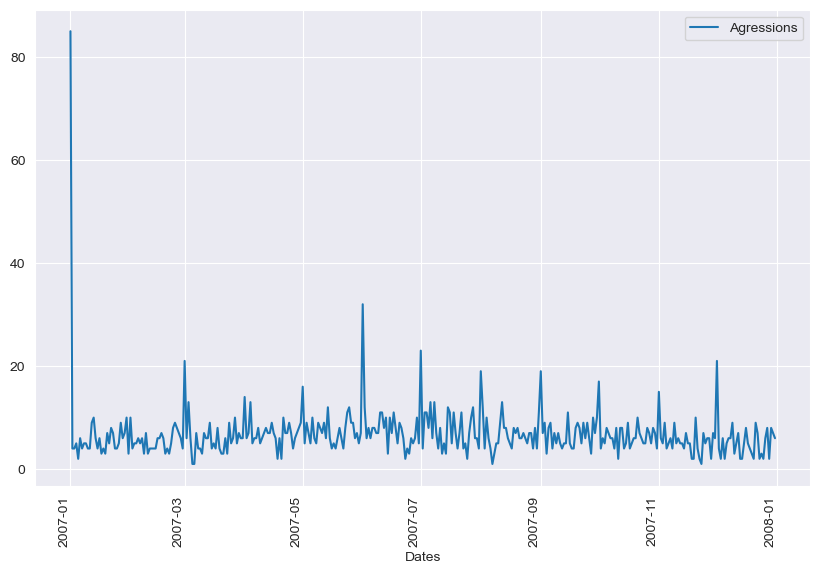

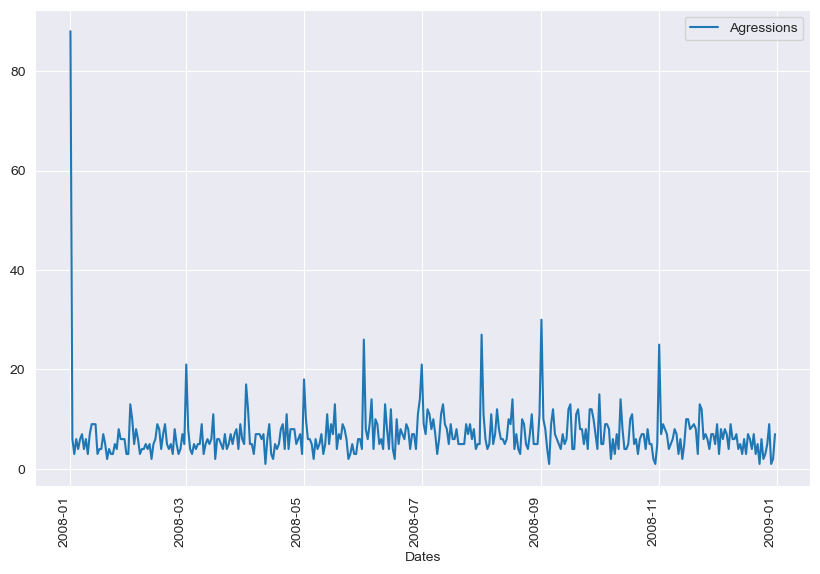

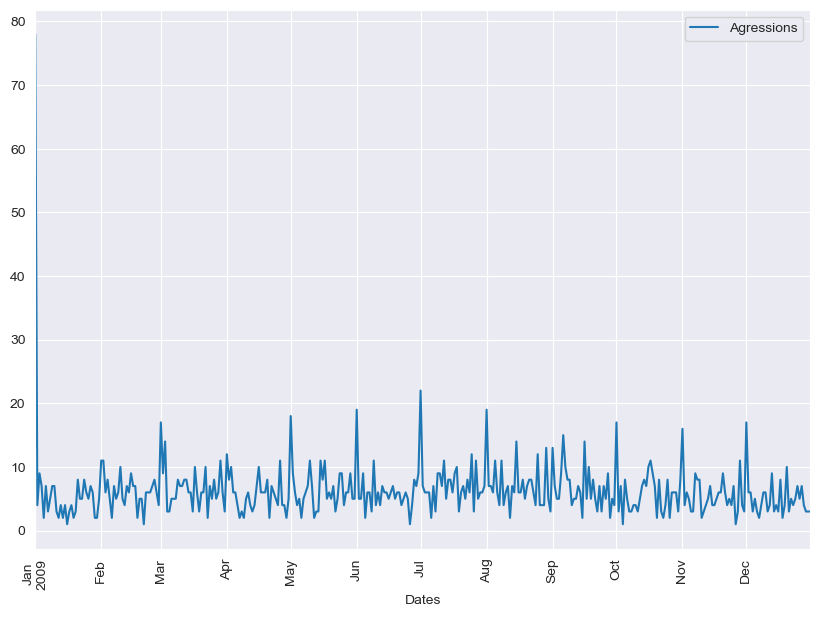

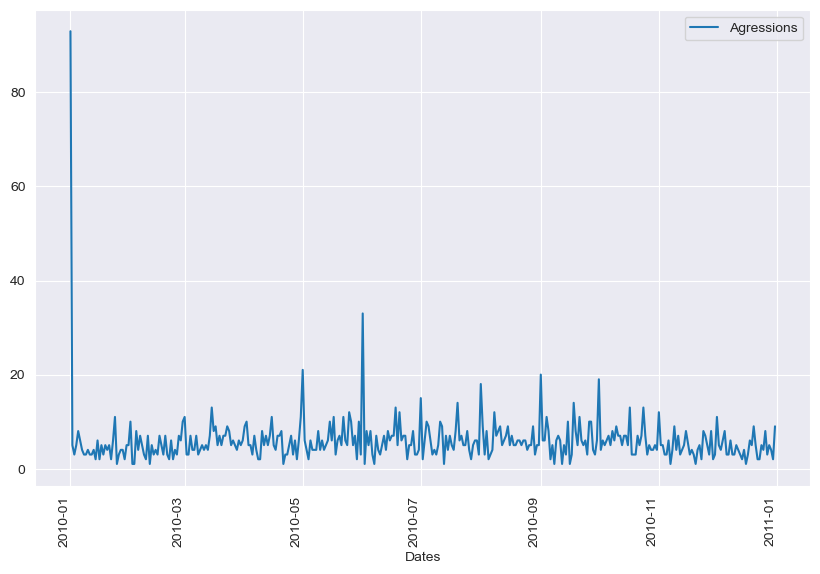

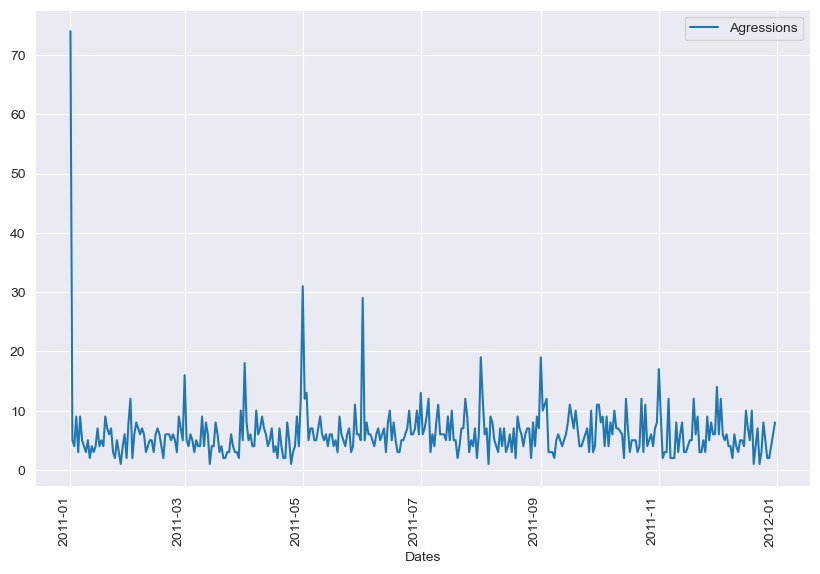

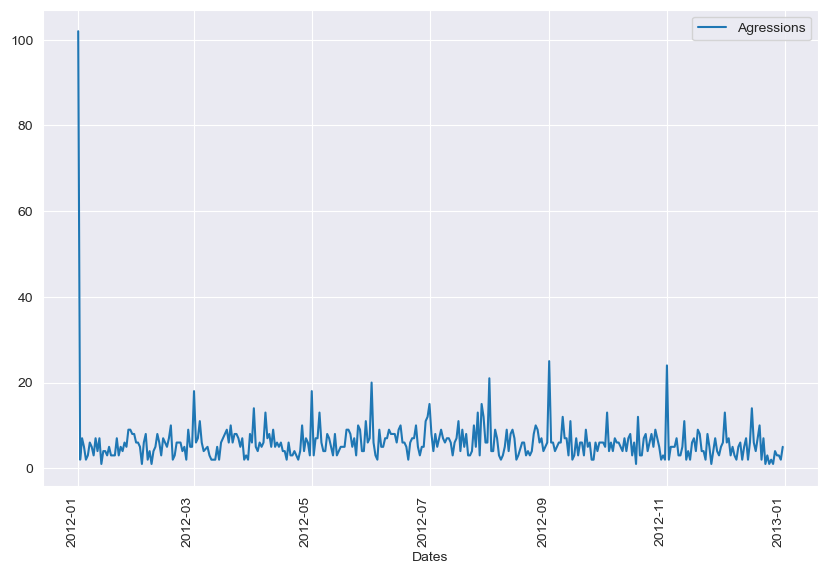

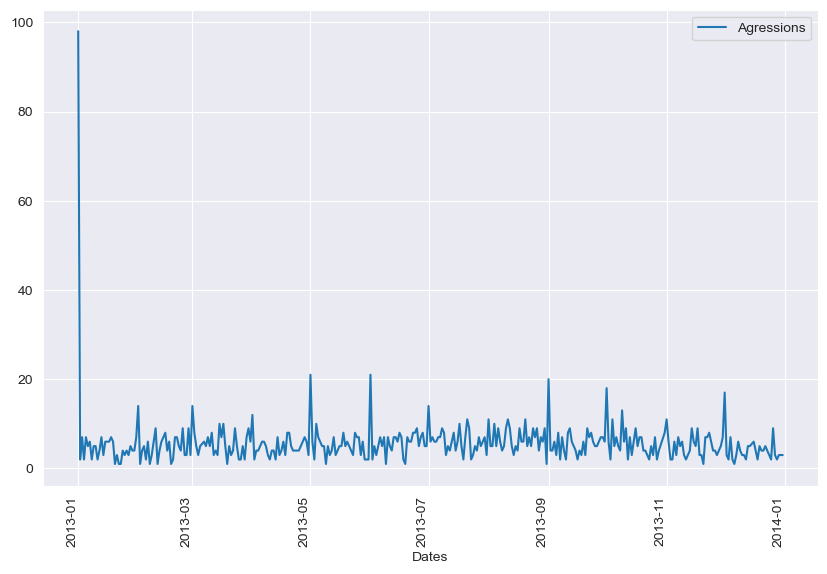

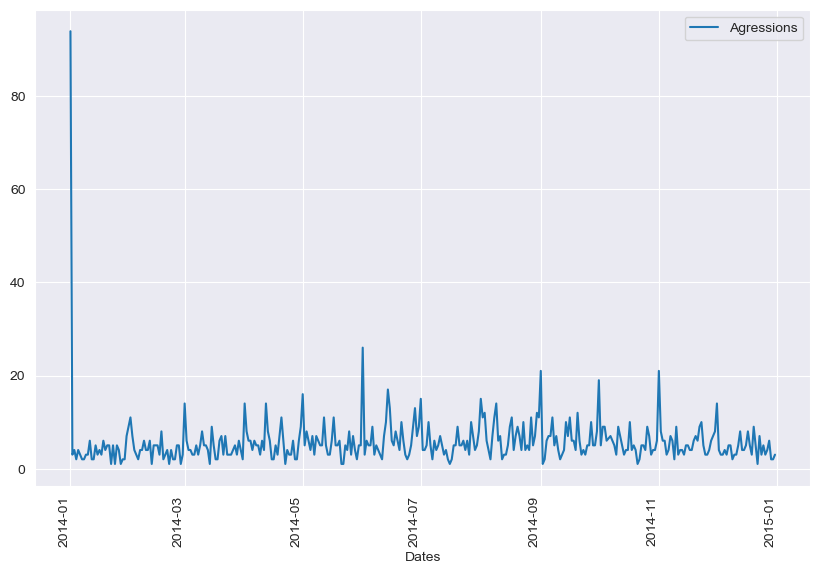

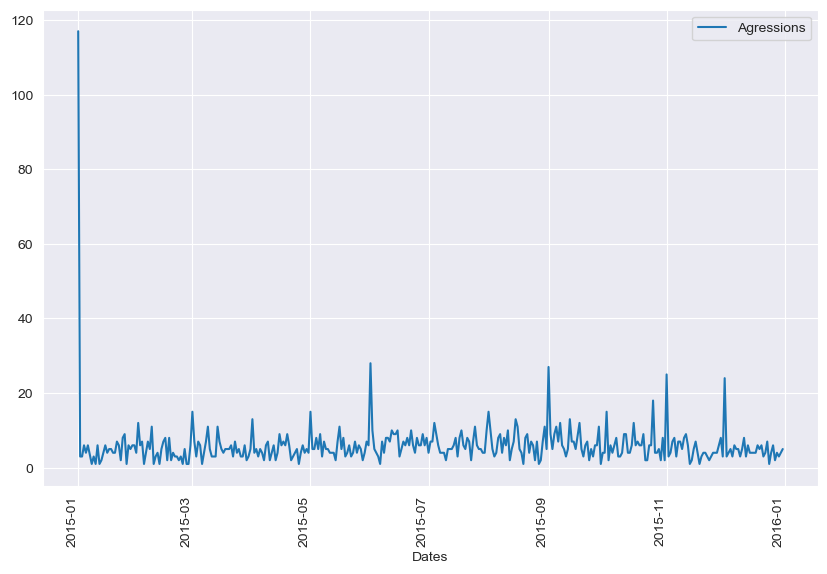

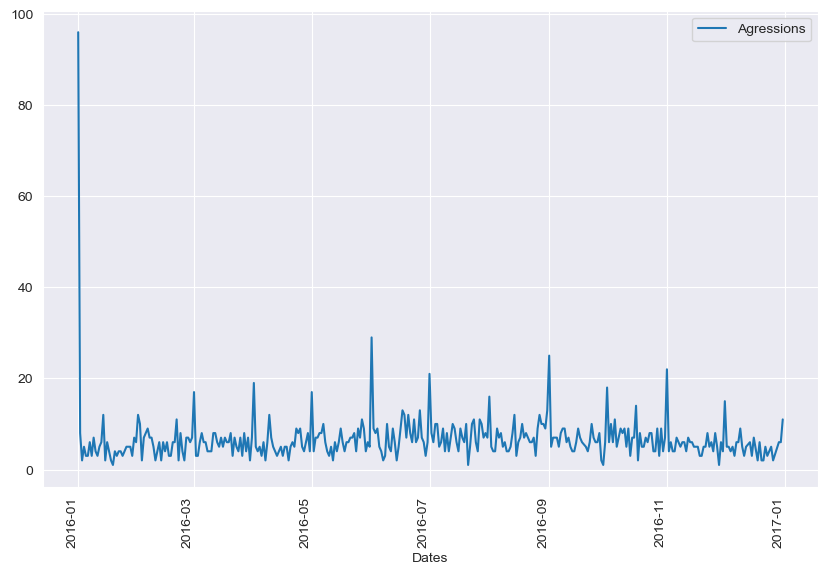

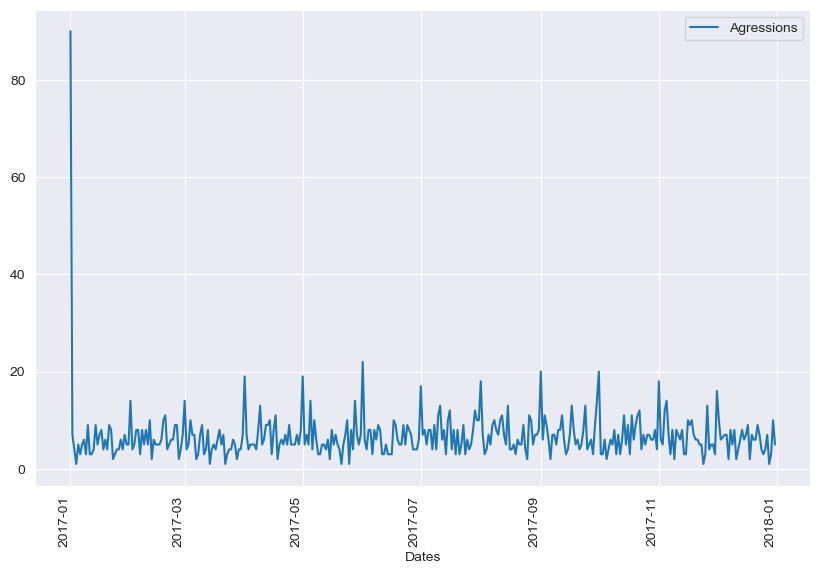

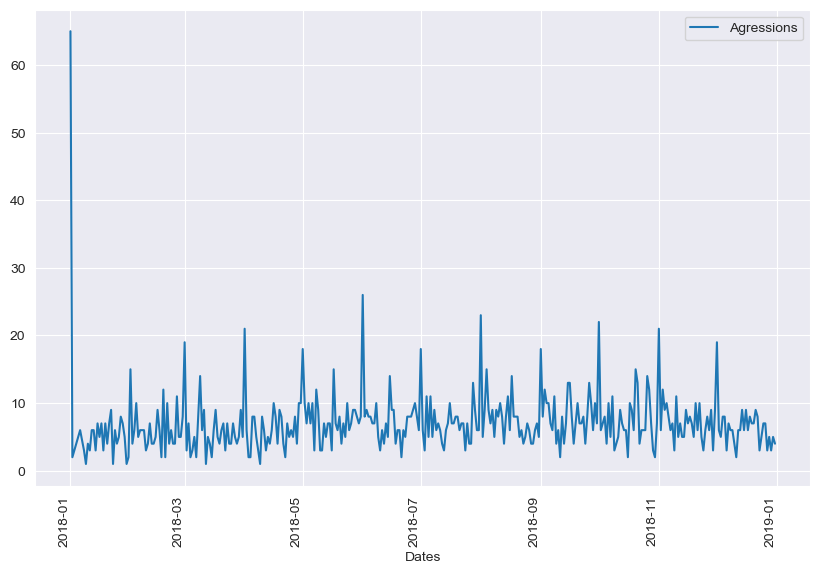

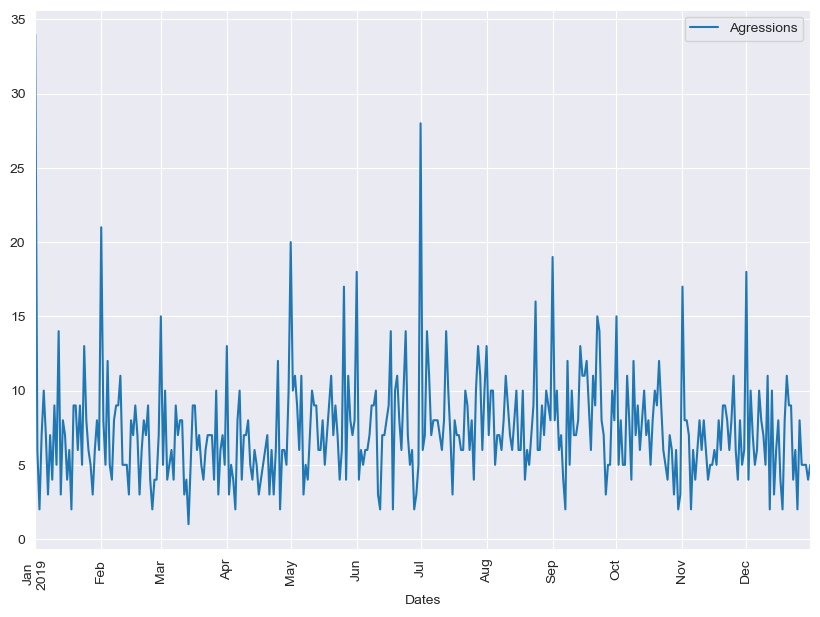

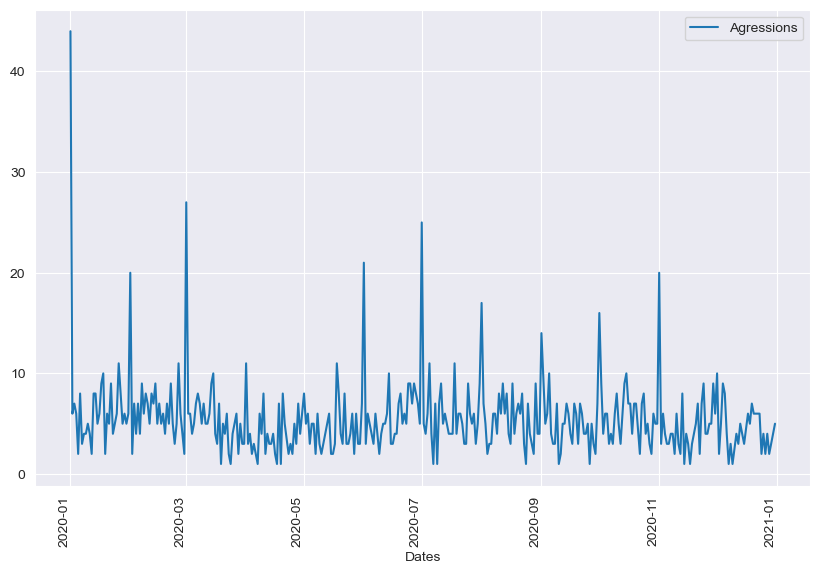

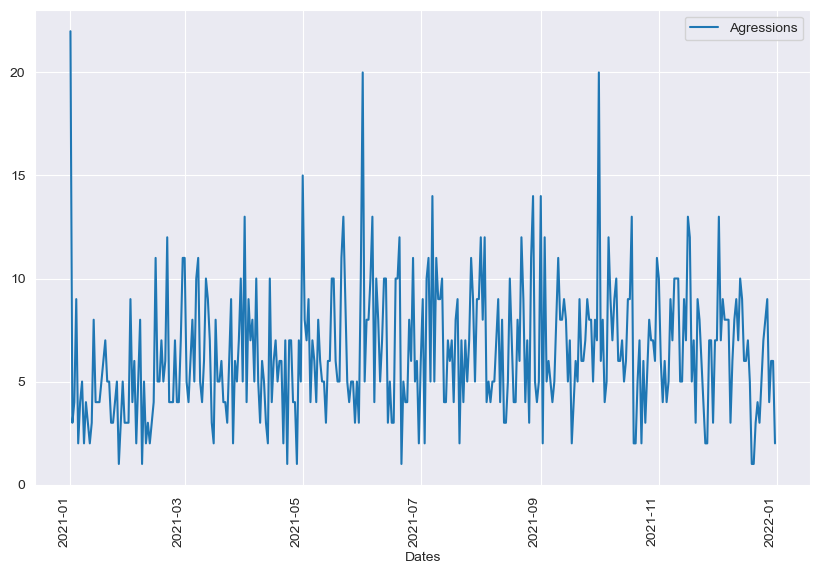

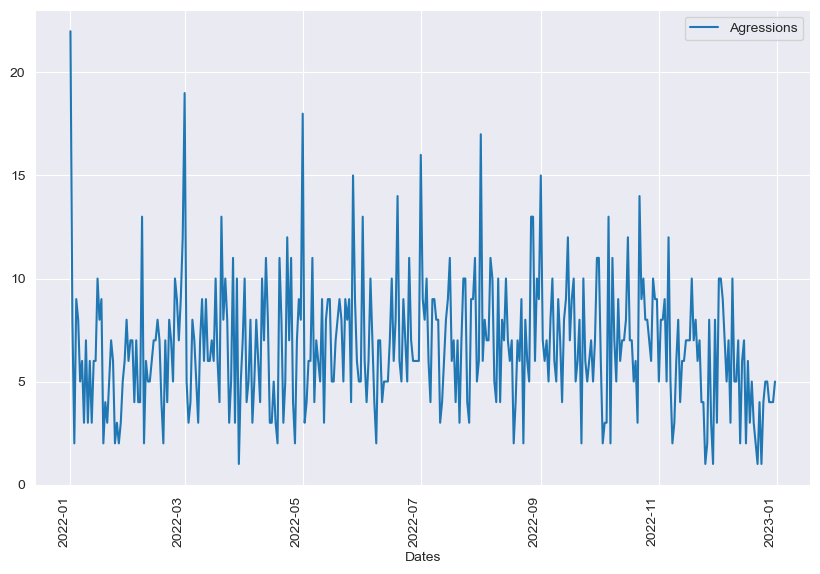

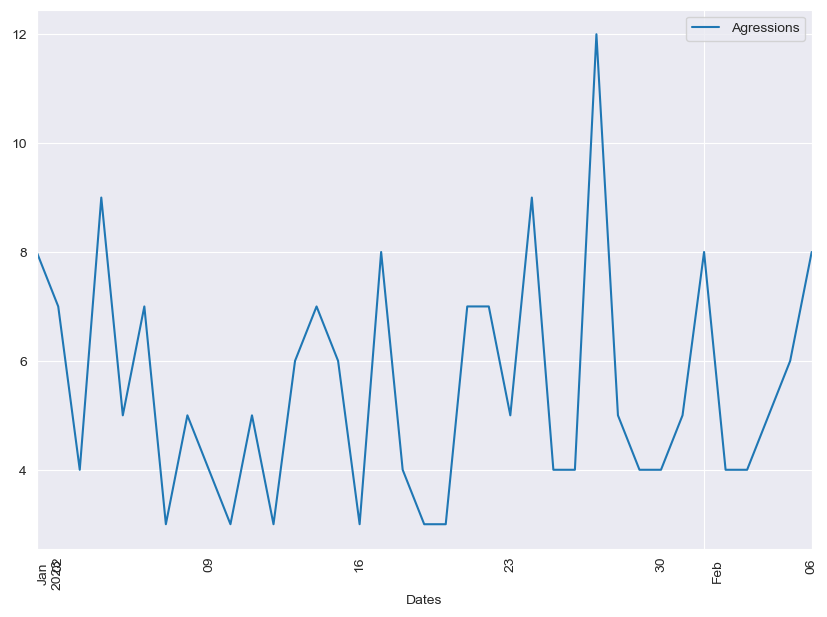

In [26]:
for i in years:
    df_year = new_df[new_df.index.year == i]
    
    df_year.plot(rot=90, figsize=(10, 7));

In [27]:
#dates amb pics
pp = new_df[new_df['Agressions'] > 20]
pp.index

DatetimeIndex(['2001-01-01', '2001-03-01', '2001-06-01', '2001-08-01',
               '2001-10-01', '2001-11-01', '2002-01-01', '2002-04-01',
               '2002-06-01', '2002-07-01', '2002-09-01', '2002-10-01',
               '2003-01-01', '2003-05-01', '2003-06-01', '2003-07-01',
               '2004-01-01', '2004-05-01', '2004-06-01', '2004-07-01',
               '2004-08-01', '2004-09-01', '2005-01-01', '2005-05-01',
               '2005-06-01', '2005-08-01', '2005-12-01', '2006-01-01',
               '2006-07-01', '2007-01-01', '2007-03-01', '2007-06-01',
               '2007-07-01', '2007-12-01', '2008-01-01', '2008-03-01',
               '2008-06-01', '2008-07-01', '2008-08-01', '2008-09-01',
               '2008-11-01', '2009-01-01', '2009-07-01', '2010-01-01',
               '2010-05-01', '2010-06-01', '2011-01-01', '2011-05-01',
               '2011-06-01', '2012-01-01', '2012-08-01', '2012-09-01',
               '2012-11-01', '2013-01-01', '2013-05-01', '2013-06-01',
      

In [28]:
#alguna cosa passa el primer de cada mes

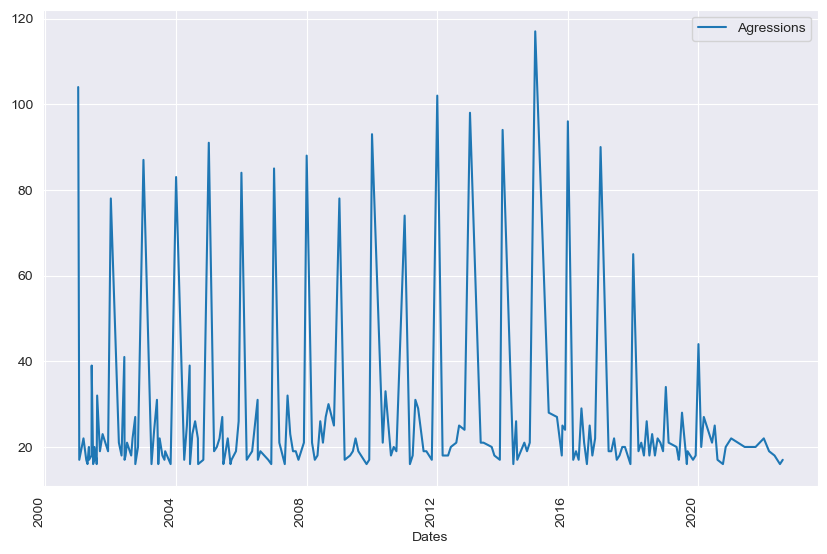

In [29]:
#agafem agressions superiors a 15 i eliminem les dades del primer dia de cada mes
pp = new_df[new_df['Agressions'] > 15]
pp.plot(rot=90, figsize=(10, 7));

In [30]:
pp

Agressions
Dates                 
2001-01-01         104
2001-01-13          17
2001-03-01          22
2001-04-01          17
2001-04-15          16
...                ...
2022-01-01          22
2022-03-01          19
2022-05-01          18
2022-07-01          16
2022-08-01          17

[195 rows x 1 columns]

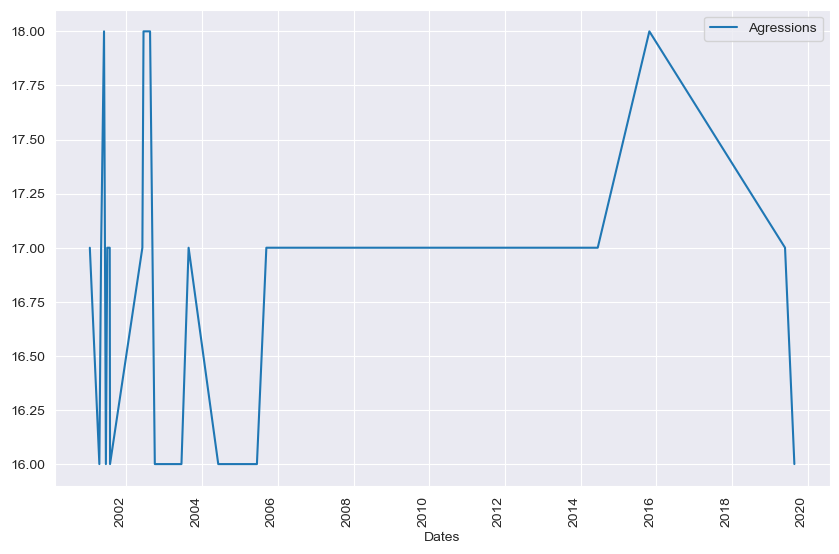

In [31]:
for i in pp.index:
    if i.day == 1:
        pp = pp.drop(index = [i])
pp.plot(rot=90, figsize=(10, 7));

In [32]:
pp.index

DatetimeIndex(['2001-01-13', '2001-04-15', '2001-05-02', '2001-05-30',
               '2001-06-17', '2001-06-30', '2001-07-24', '2001-07-27',
               '2002-06-04', '2002-06-15', '2002-08-17', '2002-10-02',
               '2003-06-16', '2003-08-24', '2004-06-05', '2004-09-04',
               '2005-06-13', '2005-09-12', '2006-07-04', '2006-10-28',
               '2014-06-14', '2015-10-25', '2019-05-26', '2019-08-24'],
              dtype='datetime64[ns]', name='Dates', freq=None)

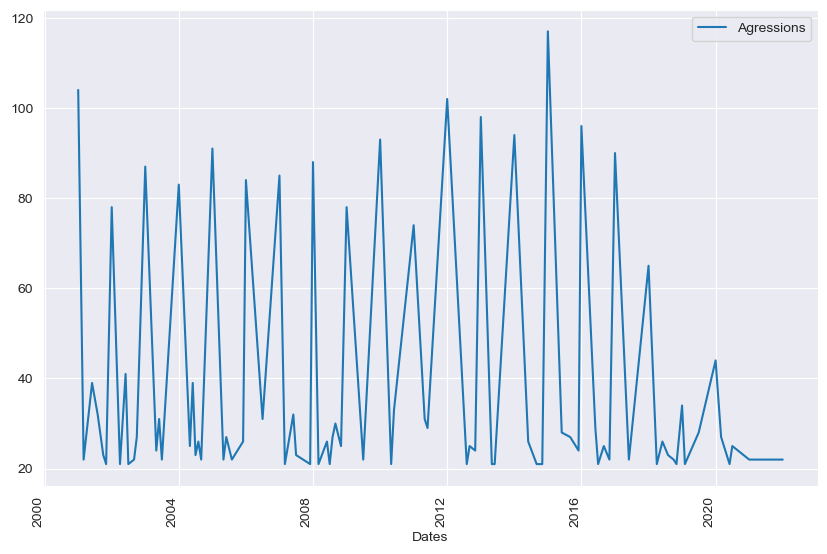

In [33]:
pp_ones = new_df[new_df['Agressions'] > 20]
for i in pp_ones.index:
    if i.day != 1:
        pp_ones = pp_ones.drop(index = [i])
pp_ones.plot(rot=90, figsize=(10, 7));

In [34]:
pp_ones

Agressions
Dates                 
2001-01-01         104
2001-03-01          22
2001-06-01          39
2001-08-01          32
2001-10-01          23
...                ...
2020-03-01          27
2020-06-01          21
2020-07-01          25
2021-01-01          22
2022-01-01          22

[87 rows x 1 columns]

## Anàlisi Agressions

In [35]:
#sum
'2001-01-13', '2001-05-02', '2001-06-17', '2001-07-24', '2001-07-27', '2002-06-15', '2002-08-17', '2002-10-02',
'2003-06-16', '2003-08-24', '2004-06-05', '2004-09-04', '2005-09-12', '2006-10-28', '2014-06-14', '2019-05-26', '2019-08-24'
        
#indv
'2003-07-24', '2003-09-20', '2006-02-21', '2008-06-15', '2010-07-20', '2015-03-14', '2017-05-28', '2017-09-17', 
'2017-11-26', '2019-01-12', '2018-10-20'

#de los dos de arriba mirar uno por uno cual es el valor de las agresiones

#both
'2001-04-15', '2001-05-30', '2001-06-30', '2002-06-04', '2005-06-13', '2006-07-04', '2015-10-25'

('2001-04-15',
 '2001-05-30',
 '2001-06-30',
 '2002-06-04',
 '2005-06-13',
 '2006-07-04',
 '2015-10-25')

In [36]:
dates_ones = pp_ones.index


dates_dif = ['2001-01-13', '2001-04-15', '2001-05-02', '2001-05-30', '2001-06-17', '2001-06-30', '2001-07-24', 
          '2001-07-27', '2002-06-04', '2002-06-15', '2002-08-17', '2002-10-02', '2003-06-16', '2003-07-24',
          '2003-08-24', '2003-09-20', '2004-06-05', '2004-09-04', '2005-06-13', '2005-09-12', '2006-02-21', 
          '2006-07-04', '2006-10-28', '2008-06-15', '2010-07-20', '2014-06-14', '2015-03-14', '2015-10-25',
          '2017-05-28', '2017-09-17', '2017-11-26', '2018-10-20', '2019-01-12', '2019-05-26', '2019-08-24' ]

In [37]:
df4 = pd.DataFrame(dates_dif)
df4[0] = pd.to_datetime(df4[0])
df4['year'] = df4[0].dt.year.astype('int')
df4['month'] = df4[0].dt.month.astype('int')
df4['day'] = df4[0].dt.day.astype('int')
df4['dayofweek'] = df4[0].dt.day_of_week.astype('int')
df4.loc[(df4.month == 3) | (df4.month == 4) | (df4.month == 5), 'estacio'] = 'Primavera'
df4.loc[(df4.month == 6) | (df4.month == 7) | (df4.month == 8), 'estacio'] = 'Estiu'
df4.loc[(df4.month == 9) | (df4.month == 10) | (df4.month == 11), 'estacio'] = 'Tardor'
df4.loc[(df4.month == 12) | (df4.month == 1) | (df4.month == 2), 'estacio'] = 'Hivern'

(array([2., 1., 1., 1., 4., 9., 5., 3., 4., 4., 1.]),
 array([ 1.        ,  1.90909091,  2.81818182,  3.72727273,  4.63636364,
         5.54545455,  6.45454545,  7.36363636,  8.27272727,  9.18181818,
        10.09090909, 11.        ]),
 <BarContainer object of 11 artists>)

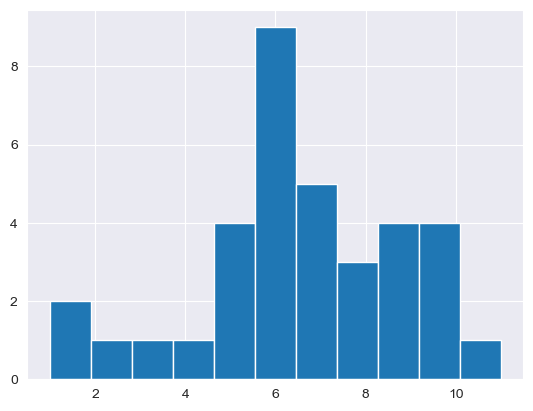

In [38]:
#agressions per mes en dades amb pics
plt.hist(df4['month'], bins = 11)

(array([12.,  4.,  4.,  3.,  0.,  1.,  1.,  0.,  0.,  1.,  2.,  3.,  4.]),
 array([2001.        , 2002.38461538, 2003.76923077, 2005.15384615,
        2006.53846154, 2007.92307692, 2009.30769231, 2010.69230769,
        2012.07692308, 2013.46153846, 2014.84615385, 2016.23076923,
        2017.61538462, 2019.        ]),
 <BarContainer object of 13 artists>)

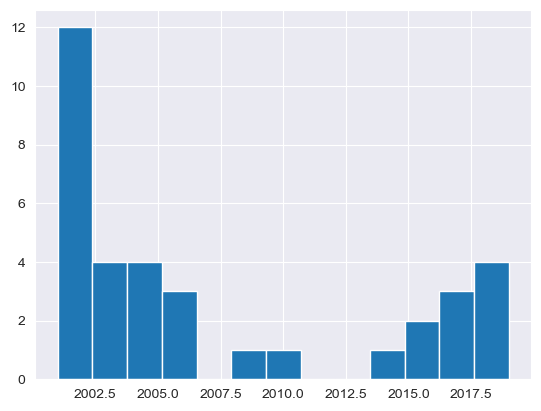

In [39]:
#agressions per any en dates amb pics
plt.hist(df4['year'], bins = 13)

(array([ 3.,  0.,  5.,  0.,  3.,  0.,  1.,  0.,  1.,  0., 13.,  0.,  9.]),
 array([0.        , 0.46153846, 0.92307692, 1.38461538, 1.84615385,
        2.30769231, 2.76923077, 3.23076923, 3.69230769, 4.15384615,
        4.61538462, 5.07692308, 5.53846154, 6.        ]),
 <BarContainer object of 13 artists>)

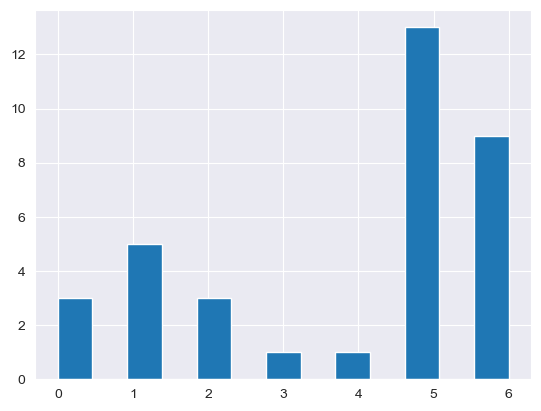

In [40]:
#dia de la setmana de les agressions en dates amb pics
plt.hist(df4['dayofweek'], bins = 13)

(array([5., 1., 0., 0., 2., 4., 7., 0., 4., 0., 5., 3., 4.]),
 array([ 2.        ,  4.15384615,  6.30769231,  8.46153846, 10.61538462,
        12.76923077, 14.92307692, 17.07692308, 19.23076923, 21.38461538,
        23.53846154, 25.69230769, 27.84615385, 30.        ]),
 <BarContainer object of 13 artists>)

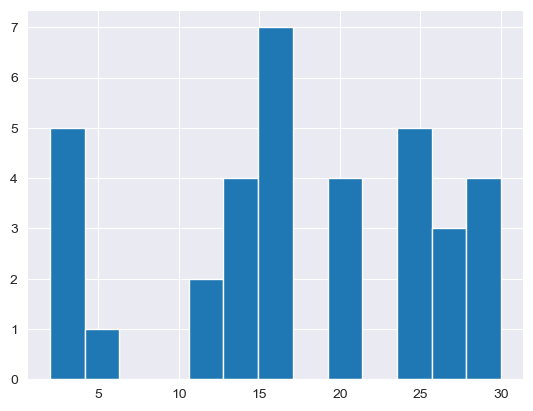

In [41]:
#numero d'agressions per dia del mes en dates amb pics
plt.hist(df4['day'], bins = 13)

(array([ 3.,  0.,  0.,  0.,  6.,  0.,  0.,  0., 17.,  0.,  0.,  0.,  9.]),
 array([0.        , 0.23076923, 0.46153846, 0.69230769, 0.92307692,
        1.15384615, 1.38461538, 1.61538462, 1.84615385, 2.07692308,
        2.30769231, 2.53846154, 2.76923077, 3.        ]),
 <BarContainer object of 13 artists>)

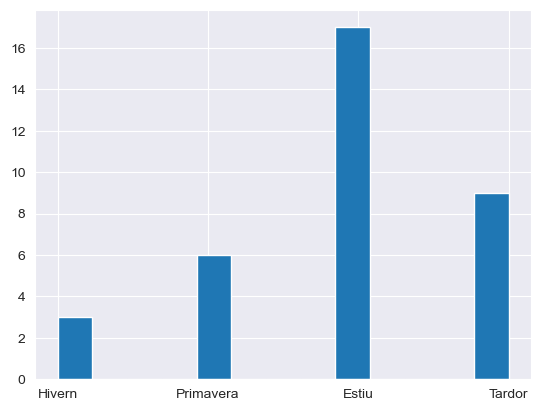

In [42]:
#número d'agressions per estació en dates amb pics
plt.hist(df4['estacio'], bins = 13)

In [43]:
df5 = pd.DataFrame(dates_ones)
df5['year'] = df5.Dates.dt.year.astype('int')
df5['month'] = df5.Dates.dt.month.astype('int')
df5['day'] = df5.Dates.dt.day.astype('int')
df5['dayofweek'] = df5.Dates.dt.day_of_week.astype('int')
df5.loc[(df5.month == 3) | (df5.month == 4) | (df5.month == 5), 'estacio'] = 'Primavera'
df5.loc[(df5.month == 6) | (df5.month == 7) | (df5.month == 8), 'estacio'] = 'Estiu'
df5.loc[(df5.month == 9) | (df5.month == 10) | (df5.month == 11), 'estacio'] = 'Tardor'
df5.loc[(df5.month == 12) | (df5.month == 1) | (df5.month == 2), 'estacio'] = 'Hivern'

(array([22.,  1.,  4.,  2.,  6., 16., 10.,  6.,  7.,  3., 10.]),
 array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.]),
 <BarContainer object of 11 artists>)

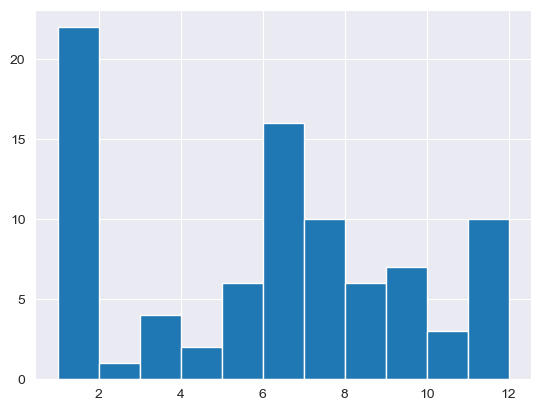

In [44]:
#agressions per mes en dades amb pics el primer dia del mes
plt.hist(df5['month'], bins = 11)

(array([12., 10.,  5.,  7.,  9.,  3.,  7.,  3.,  9.,  7.,  6.,  7.,  2.]),
 array([2001.        , 2002.61538462, 2004.23076923, 2005.84615385,
        2007.46153846, 2009.07692308, 2010.69230769, 2012.30769231,
        2013.92307692, 2015.53846154, 2017.15384615, 2018.76923077,
        2020.38461538, 2022.        ]),
 <BarContainer object of 13 artists>)

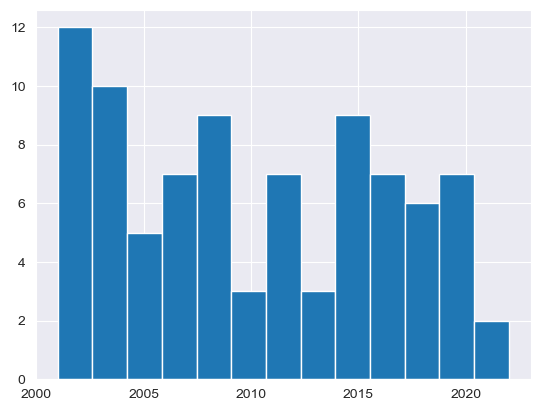

In [45]:
#agressions per any en dates amb pics el primer dia del mes
plt.hist(df5['year'], bins = 13)

(array([13.,  0., 12.,  0., 13.,  0., 13.,  0.,  9.,  0., 13.,  0., 14.]),
 array([0.        , 0.46153846, 0.92307692, 1.38461538, 1.84615385,
        2.30769231, 2.76923077, 3.23076923, 3.69230769, 4.15384615,
        4.61538462, 5.07692308, 5.53846154, 6.        ]),
 <BarContainer object of 13 artists>)

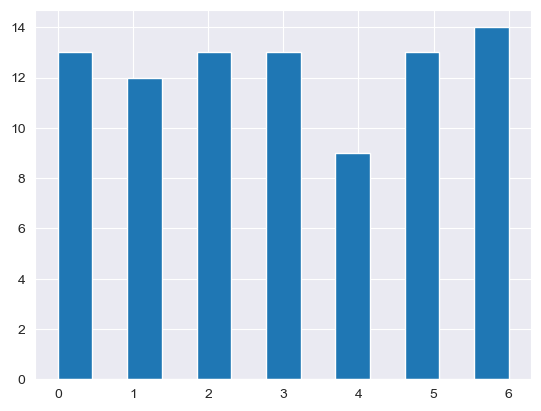

In [46]:
#dia de la setmana de les agressions en dates amb pics el primer dia del mes
plt.hist(df5['dayofweek'], bins = 13)

(array([26., 12., 32., 17.]),
 array([0.  , 0.75, 1.5 , 2.25, 3.  ]),
 <BarContainer object of 4 artists>)

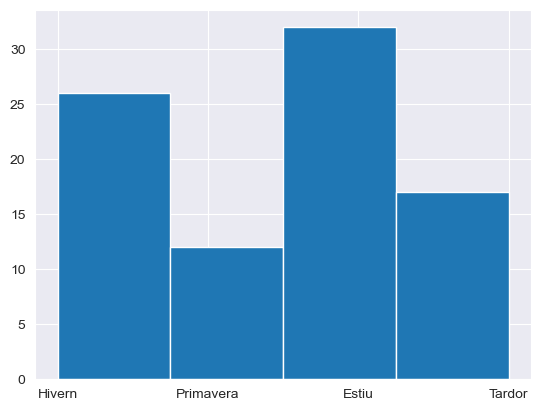

In [47]:
#número d'agressions per estació en dates amb pics el primer dia del mes
plt.hist(df5['estacio'], bins = 4)

## Mirant Hores

In [48]:
df_test = df_prova.set_index('Dates').sort_index()
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_test[(df_test.index.day == 1) & (df_test.index.month == 5) &(df_test.index.year == 2002)].Time)

Dates
2002-05-01    00:00:00
2002-05-01    11:00:00
2002-05-01    00:01:00
2002-05-01    00:01:00
2002-05-01    21:00:00
2002-05-01    06:00:00
2002-05-01    15:00:00
2002-05-01    17:00:00
2002-05-01    12:00:00
2002-05-01    21:00:00
2002-05-01    00:36:35
2002-05-01    22:31:46
2002-05-01    00:01:00
2002-05-01    00:00:00
2002-05-01    07:00:00
2002-05-01    20:30:00
2002-05-01    10:53:00
2002-05-01    21:00:00
Name: Time, dtype: object


In [49]:
#numero d'agressions per hors
df_test = df_prova.groupby(df_prova.Time).size().to_frame()
df_test = df_test.rename(columns = {0:'Agressions'})
# new_df
df_test.sort_values(by=['Agressions'])

Agressions
Time                
12:55:59           1
15:37:02           1
15:37:18           1
15:37:40           1
15:37:56           1
...              ...
02:00:00        1354
12:00:00        1361
22:00:00        1371
00:01:00        2853
00:00:00        3770

[4643 rows x 1 columns]

In [50]:
#comprovar si todas las instancias de 00.01.00 son en el primer dia del mes

In [51]:
with pd.option_context('display.max_rows', None,
                       'display.max_columns', None,
                       'display.precision', 3,
                       ):
    print(df_prova[(df_prova.Date.dt.hour == 0) & (df_prova.Date.dt.minute == 1)].groupby(df_prova.Dates).size().to_frame())

             0
Dates         
2001-01-01  21
2001-01-03   1
2001-01-11   1
2001-01-13   1
2001-01-23   1
2001-01-28   1
2001-02-01   4
2001-02-12   1
2001-02-13   1
2001-02-15   1
2001-02-16   1
2001-02-24   1
2001-02-28   1
2001-03-01   2
2001-03-04   1
2001-03-07   2
2001-03-13   1
2001-03-23   1
2001-03-25   1
2001-04-01   6
2001-04-10   1
2001-04-21   1
2001-04-22   1
2001-04-23   1
2001-04-27   1
2001-04-28   1
2001-05-01   1
2001-05-02   1
2001-05-26   1
2001-05-29   1
2001-06-01   7
2001-06-05   1
2001-06-11   1
2001-06-21   1
2001-06-29   1
2001-07-01   1
2001-07-05   1
2001-07-12   1
2001-07-13   1
2001-07-16   1
2001-07-24   1
2001-08-01   6
2001-08-09   1
2001-08-13   2
2001-08-26   1
2001-08-27   1
2001-09-01   2
2001-09-07   1
2001-09-10   1
2001-09-11   1
2001-09-26   1
2001-10-01   6
2001-10-05   1
2001-10-09   1
2001-10-19   1
2001-10-22   1
2001-11-01   6
2001-11-05   1
2001-11-20   1
2001-11-24   1
2001-11-27   1
2001-12-01   2
2001-12-08   1
2001-12-12   1
2002-01-01

In [52]:
#no sempre son el primer del mes, però si que només hi ha més de dos agresions el primer dia del mes

In [53]:
df_prova[(df_prova.Date.dt.hour == 0) & (df_prova.Date.dt.minute == 0)].groupby(df_prova.Dates).size().to_frame()

0
Dates         
2001-01-01  53
2001-01-14   1
2001-01-15   1
2001-01-16   1
2001-01-21   1
...         ..
2023-01-24   1
2023-01-25   1
2023-01-26   2
2023-01-28   1
2023-02-06   1

[2160 rows x 1 columns]

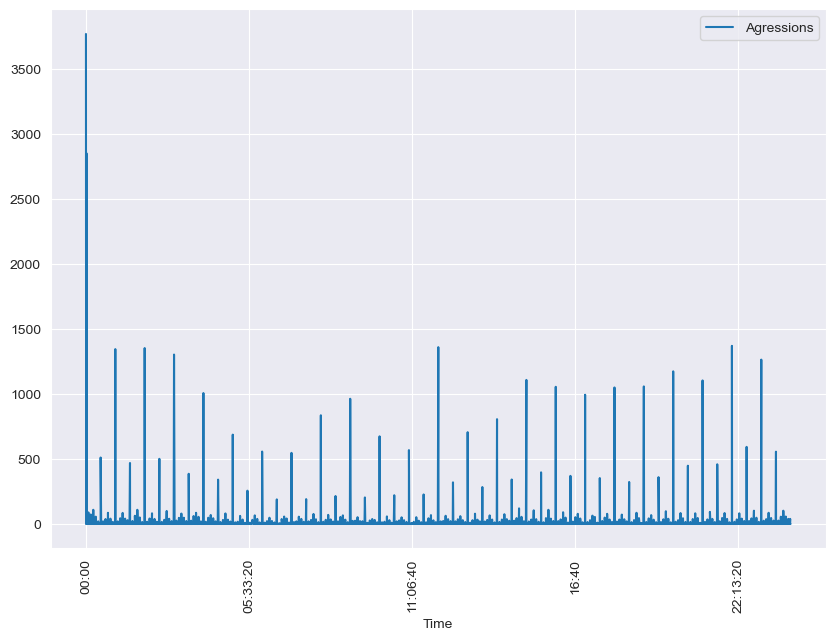

In [54]:
df_test.plot(rot=90, figsize=(10, 7));

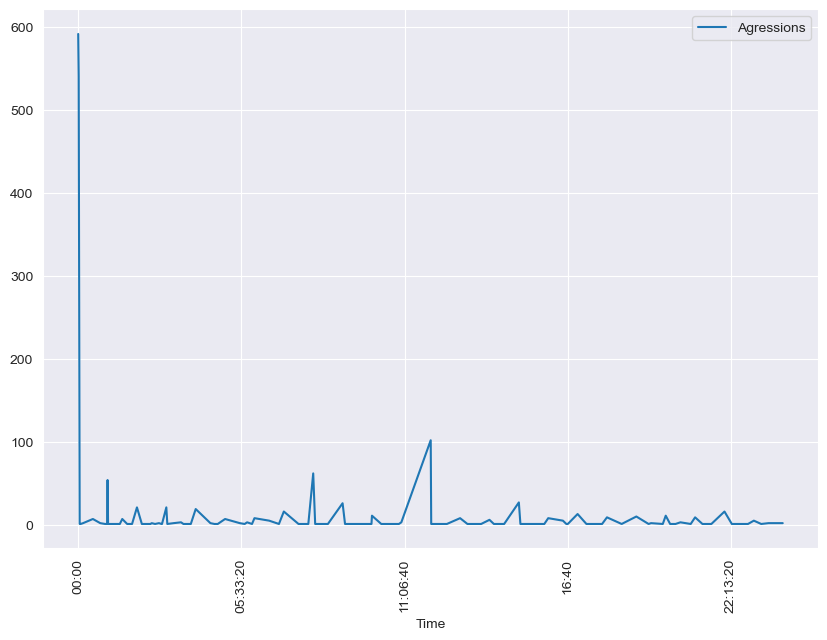

In [55]:
#primer dia de l'any
df_test = df_prova[(df_prova.Dates.dt.day == 1) & (df_prova.Dates.dt.month ==1)].groupby(df_prova.Time).size().to_frame()
df_test = df_test.rename(columns = {0:'Agressions'})
# new_df
df_test.plot(rot=90, figsize=(10, 7));

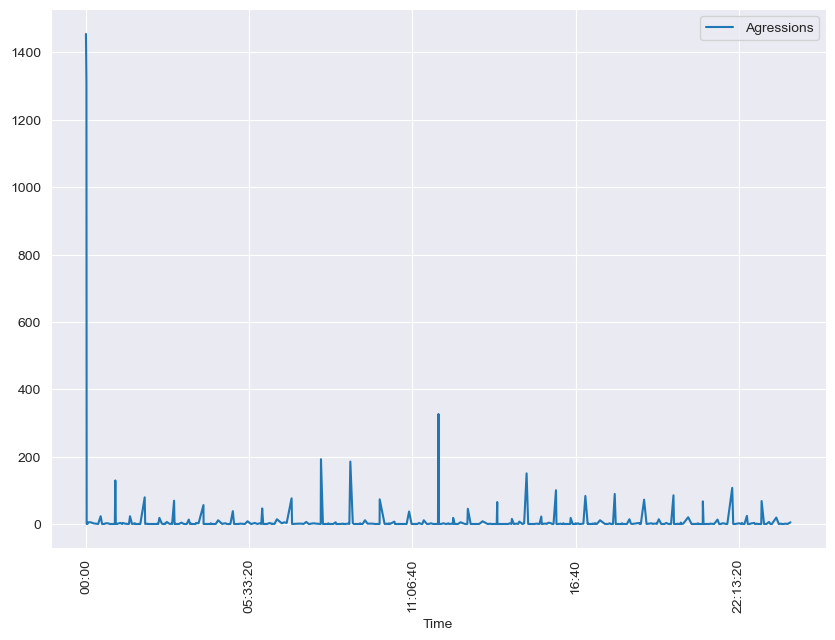

In [56]:
#perimer dia del mes
df_test = df_prova[df_prova.Dates.dt.day == 1].groupby(df_prova.Time).size().to_frame()
df_test = df_test.rename(columns = {0:'Agressions'})
# new_df
df_test.plot(rot=90, figsize=(10, 7));

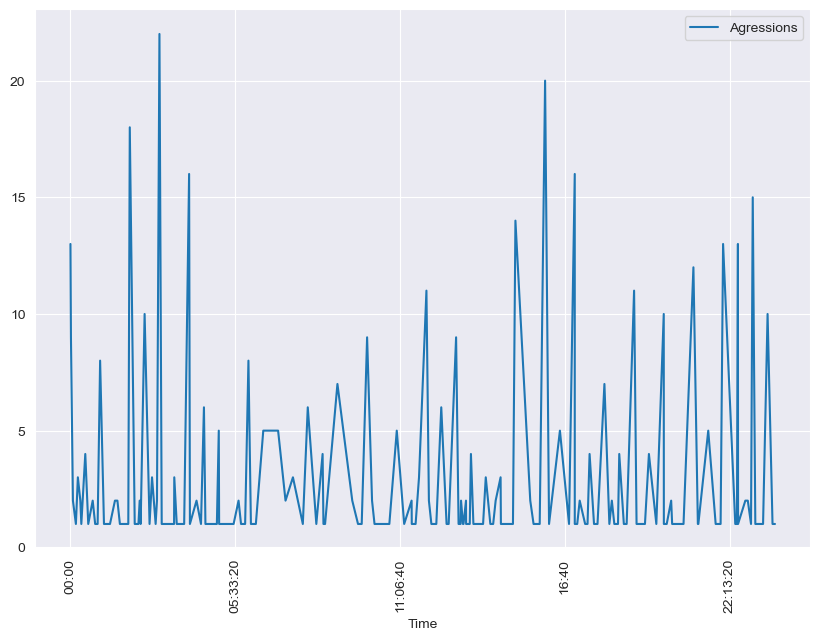

In [57]:
#Altres dies que no son el primer del mes però tenen un numero elevat d'agressions
df_test = df_prova[df_prova.Dates.isin(dates_dif)].groupby(df_prova.Time).size().to_frame()
df_test = df_test.rename(columns = {0:'Agressions'})
df_test.plot(rot=90, figsize=(10, 7));

In [58]:
#Potser fer un histograma que sigui la acumulació decrims en periodes de 6 hores

In [59]:
#destacar que a las 12pm sembla haver més agressions del normal

### HEATMAPS Y DEMÁS

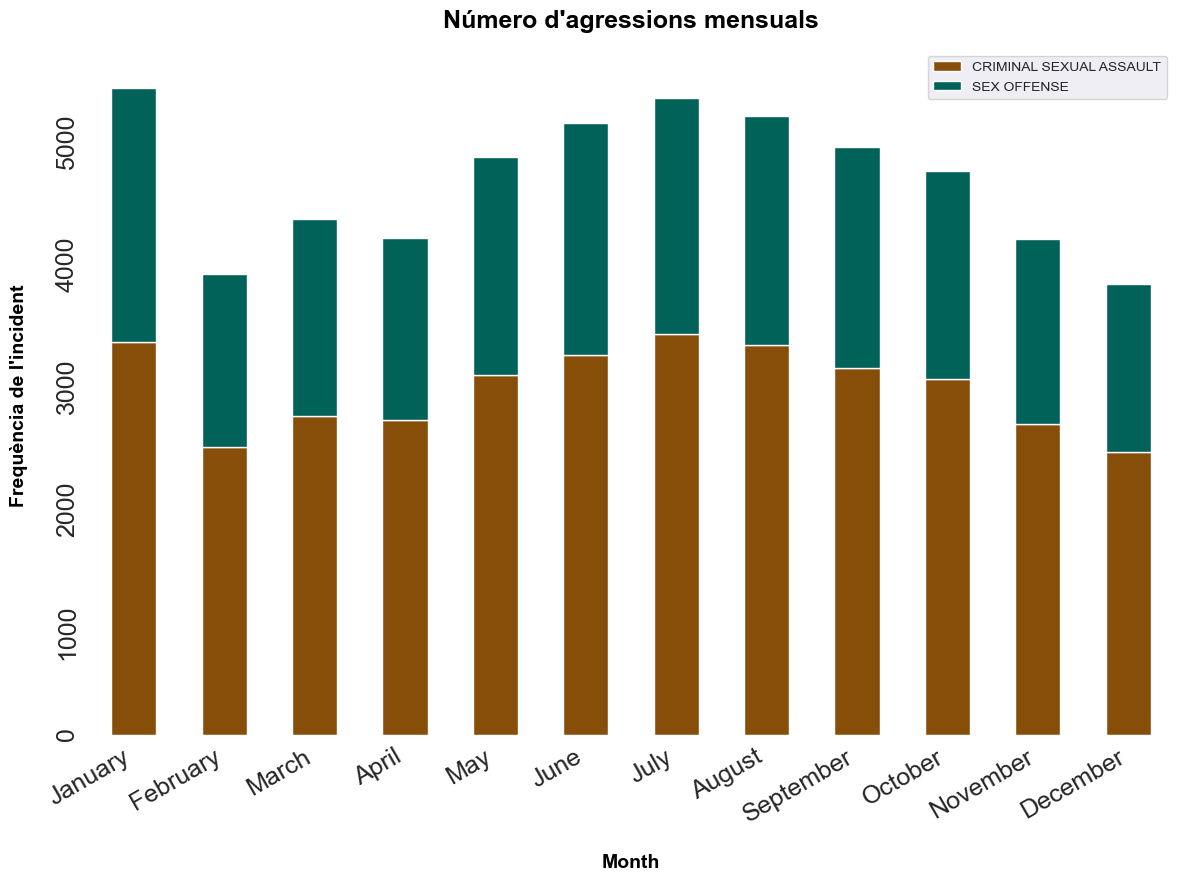

In [64]:
num_primary_types = 2
num_months = 12

###
# Group our data
##
# Group our data by month
crimes_gb_mpt = df_prova.groupby(by = [df_prova.Dates.dt.month, "Primary Type"], axis = 0)

# Count the number of incidents of our grouped set
crimes_gb_mpt_pt_count = crimes_gb_mpt["Primary Type"].count()

# We may chose to display only some of the crime class, for readability
if num_primary_types != None:
    crimes_gb_mpt_pt_count = crimes_gb_mpt_pt_count.nlargest(num_primary_types * num_months)

crimes_gb_mpt_pt_count_un = crimes_gb_mpt_pt_count.unstack()

###
# Plot our data
##
months = {
    1: "January",
    2: "February",
    3: "March",
    4: "April",
    5: "May",
    6: "June",
    7: "July",
    8: "August",
    9: "September",
    10: "October",
    11: "November",
    12: "December",
}

plot_main_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 18,
}

plot_axis_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 14,
}
# Since the catecorical variable 'primary_type' has many levels,  
# we are required to create a color map such that different levels
# can be as distinguishable as possible...
cat_cmap = ListedColormap(sns.color_palette("BrBG", 10).as_hex())

ax = crimes_gb_mpt_pt_count_un.plot(
    kind = "bar", 
    stacked = True, 
    figsize = (14, 10), 
    use_index = False, 
    legend = True,
    cmap = cat_cmap
)

# # Normalize the y-axis values
# ax.set_ylim(0, ceiling(crimes_gb_mpt_pt_count.max(), to = 1000000))

# Set graph title
ax.set_title(label = "Número d'agressions mensuals", fontdict = plot_main_title_font, pad = 20)

# Set axis proper labels
ax.set_xlabel(xlabel = "Month", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(ylabel = "Frequència de l'incident", fontdict = plot_axis_title_font, labelpad = 20)

# Set x-axis ticks and corresponding labels to be the index of our series object
ax.set_xticks(ticks = crimes_gb_mpt_pt_count.index.levels[0] - 1);
ax.set_xticklabels(labels = [months[x] for x in crimes_gb_mpt_pt_count.index.levels[0]])
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18, rotation=90)


ax.set_facecolor('xkcd:white')

# Auto-format year labels
ax.get_figure().autofmt_xdate();

ax.legend(bbox_to_anchor = (1, 1.01));

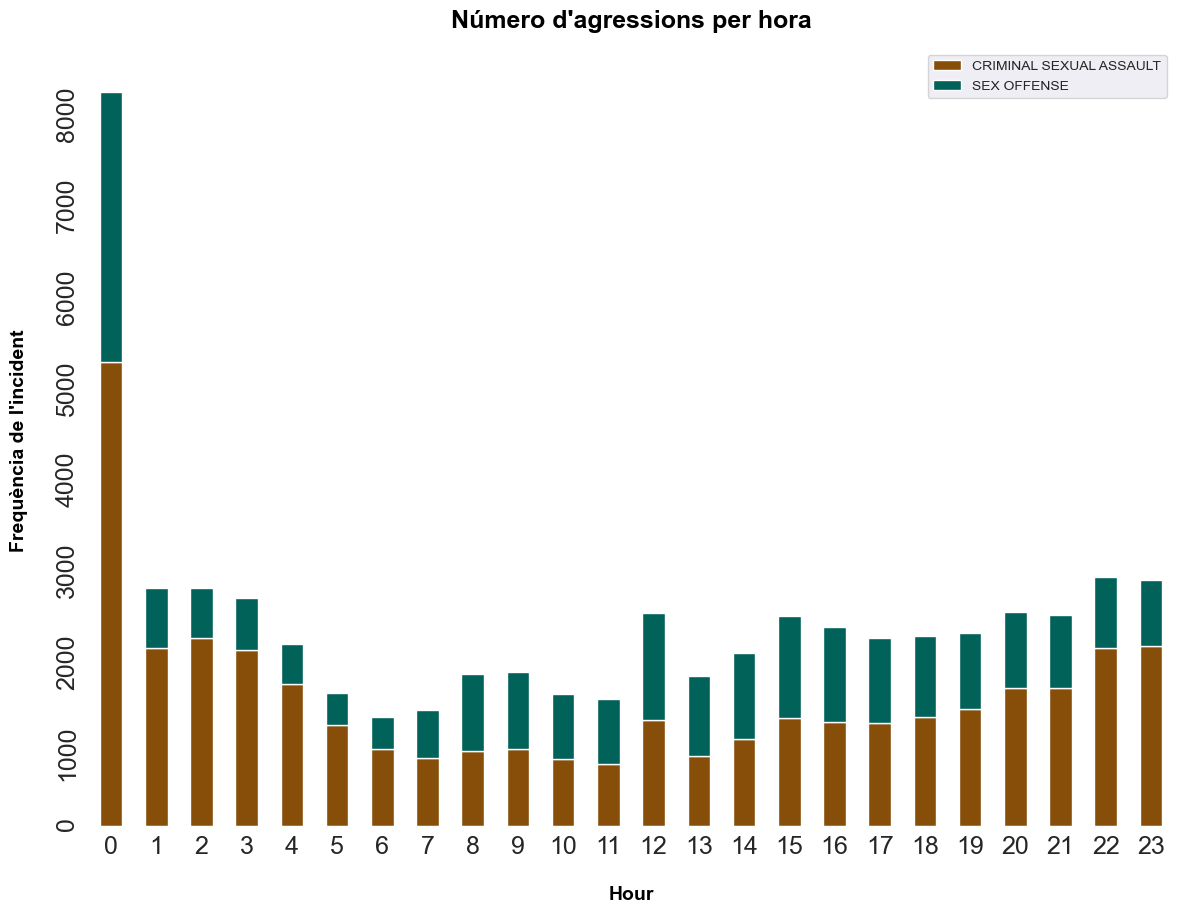

In [65]:
# We need this for palette management

num_primary_types = 10
num_hours = 24

###
# Group our data
##
# Group our data by hour
crimes_gb_hpt = df_prova.groupby(by = [df_prova.Date.dt.hour, "Primary Type"], axis = 0)

# Count the number of incidents of our grouped set
crimes_gb_hpt_pt_count = crimes_gb_hpt["Primary Type"].count()

# We may chose to display only some of the crime class, for readability
if num_primary_types != None:
    crimes_gb_hpt_pt_count = crimes_gb_hpt_pt_count.nlargest(num_primary_types * num_hours)
    
crimes_gb_hpt_pt_count_un = crimes_gb_hpt_pt_count.unstack()

###
# Plot our data
##
plot_main_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 18,
}

plot_axis_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 14,
}

# Since the catecorical variable 'primary_type' has many levels,  
# we are required to create a color map such that different levels
# can be as distinguishable as possible...
cat_cmap = ListedColormap(sns.color_palette("BrBG", 10).as_hex())

ax = crimes_gb_hpt_pt_count_un.plot(
    kind = "bar", 
    stacked = True, 
    figsize = (14, 10), 
    use_index = False, 
    legend = True,
    cmap = cat_cmap
)

# # Normalize the y-axis values
# ax.set_ylim(0, ceiling(crimes_gb_hpt_pt_count.max(), to = 1000000))

# Set graph title
ax.set_title(label = "Número d'agressions per hora", fontdict = plot_main_title_font, pad = 20)

# Set axis proper labels
ax.set_xlabel(xlabel = "Hour", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel(ylabel = "Frequència de l'incident", fontdict = plot_axis_title_font, labelpad = 20)
plt.xticks(fontsize=18, rotation=90)
plt.yticks(fontsize=18, rotation=90)
ax.set_facecolor('xkcd:white')


# Rotate x-axis labels so as to appear vertical
for tick in ax.get_xticklabels():
    tick.set_rotation(0)

ax.legend(bbox_to_anchor = (1, 1.01));

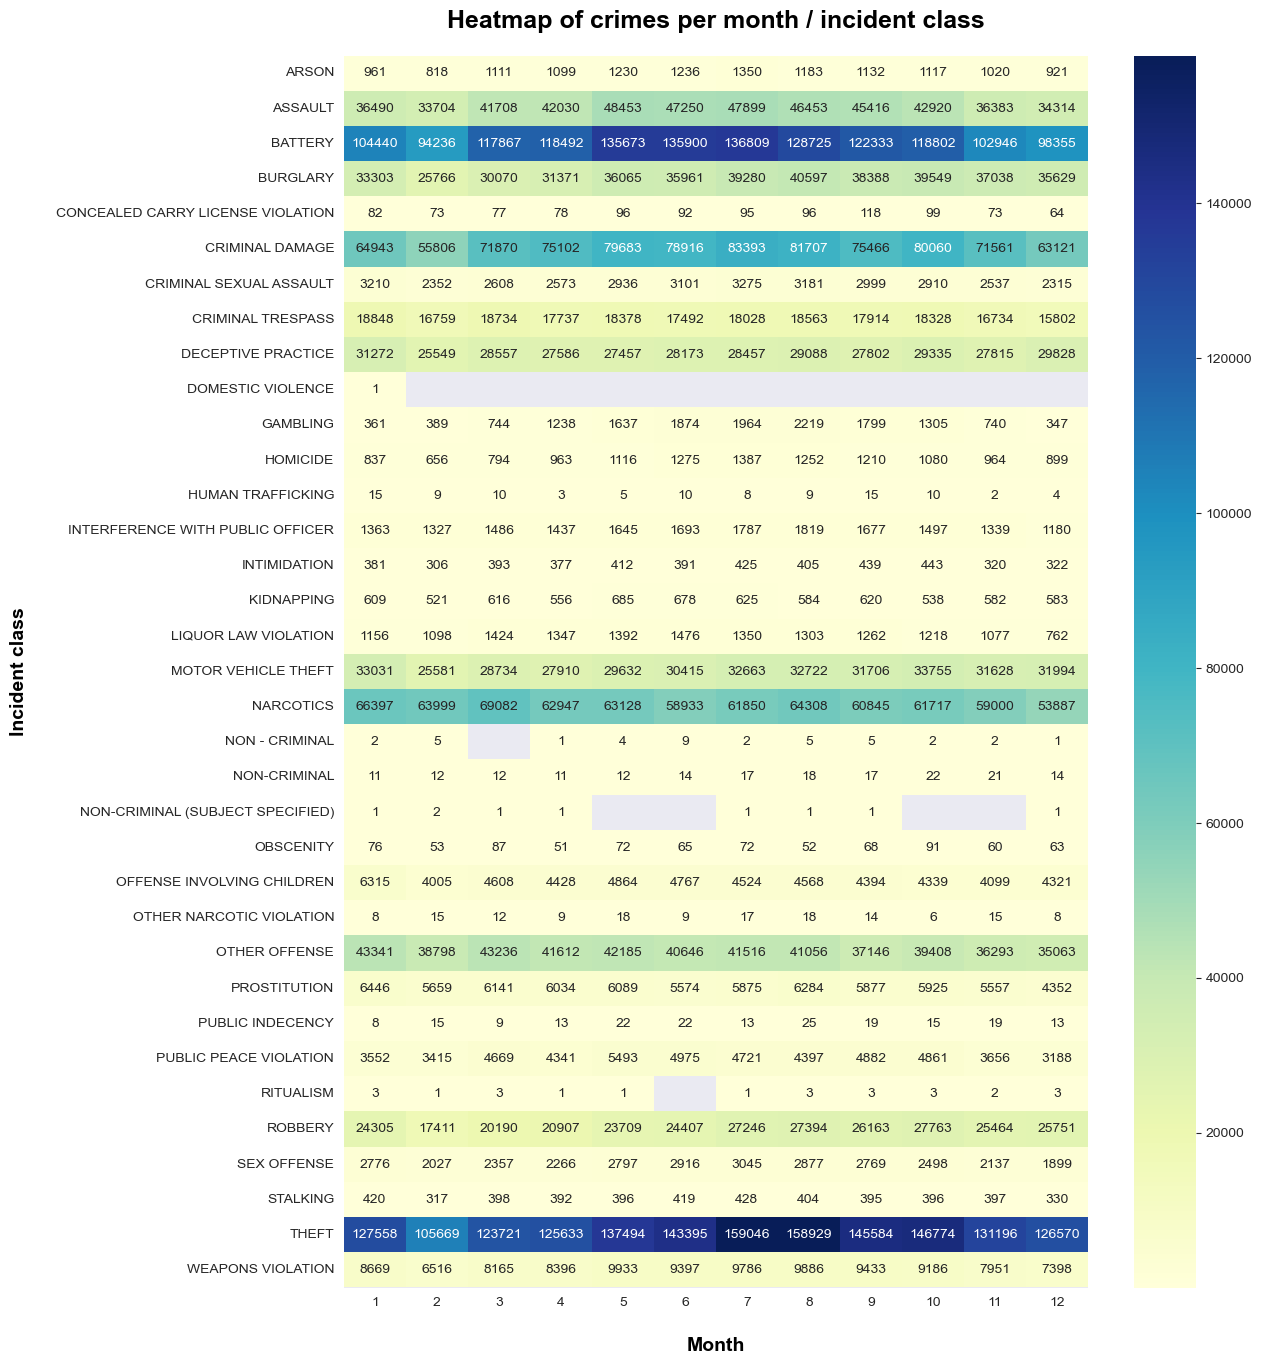

In [151]:
###
# Group our data
##
# Group our data by month
crimes_gb_mpt = df.groupby(by = ["Primary Type", df.Dates.dt.month], axis = 0)

# Count the number of incidents of our grouped set
crimes_gb_mpt_count = crimes_gb_mpt["Primary Type"].count()

crimes_gb_mpt_count_un = crimes_gb_mpt_count.unstack()

###
# Plot our data
##
plot_main_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 18,
}

plot_axis_title_font = {
    "family": "sans serif",
    "color":  "black",
    "weight": "bold",
    "size": 14,
}

fig, ax = plt.subplots(figsize = (12, 16))
sns.heatmap(data = crimes_gb_mpt_count_un, annot = True, fmt = ".0f", linewidths = .0, center = crimes_gb_mpt_count.max() / 2, cmap = "YlGnBu", ax = ax)

# Set graph title
ax.set_title(label = "Heatmap of crimes per month / incident class", fontdict = plot_main_title_font, pad = 20)

# Set axis proper labels
ax.set_xlabel(xlabel = "Month", fontdict = plot_axis_title_font, labelpad = 20)
ax.set_ylabel("Incident class", fontdict = plot_axis_title_font, labelpad = 20);

In [ ]:
#lectura i reorganització de les variables exògenes per a un bin processat

In [152]:
#variables exògenes
race = pd.read_csv('C:/Users/carlo/Downloads/Race & Ethnicity.csv')
race.drop(columns=race.columns[:6],axis=1, inplace=True)
race = race.set_index('Unnamed: 6')
race.drop(columns=race.columns[:2],axis=1, inplace=True)
race['Area'] = np.nan
race = race.reset_index()
race.dropna(axis = 0, how = 'all', inplace = True)
race = race.set_index('Unnamed: 6')

In [153]:
num = 1
indx=0
for i in race.index:
    s = str(num)
    if s in i or i == 'Chicago':
        race['Area'].iloc[indx] = i
        nom = i
        num+=1
    else:
        race['Area'].iloc[indx] = nom
    indx+=1

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [154]:
race = race.groupby(['Area', 'Unnamed: 6']).first()
race.dropna(axis = 0, how = 'all', inplace = True)
race.head(20)

2000*  \
Area                 Unnamed: 6                                                      
 10. Norwood Park     Hispanic or Latino                                    2,409    
                      Not Hispanic or Latino: Asian alone                   1,216    
                      Not Hispanic or Latino: Black or African Ameri...       332    
                      Not Hispanic or Latino: Other                           424    
                      Not Hispanic or Latino: White alone                  33,288    
                      Total                                                37,669    
 11. Jefferson Park   Hispanic or Latino                                    2,881    
                      Not Hispanic or Latino: Asian alone                   1,237    
                      Not Hispanic or Latino: Black or African Ameri...        81    
                      Not Hispanic or Latino: Other                           559    
                      Not Hispanic or Latino: White alone                  21,101    
                      Total                                                25,859    
 12. Forest Glen      Hispanic or Latino                                    1,389    
                      Not Hispanic or Latino: Asian alone                   1,586    
                      Not Hispanic or Latino: Black or African Ameri...        71    
                      Not Hispanic or Latino: Other                           326    
                      Not Hispanic or Latino: White alone                  14,793    
                      Total                                                18,165    
 13. North Park       Hispanic or Latino                                    2,652    
                      Not Hispanic or Latino: Asian alone                   4,415    

                                                                              2010  \
Area                 Unnamed: 6                                                      
 10. Norwood Park     Hispanic or Latino                                    4,442    
                      Not Hispanic or Latino: Asian alone                   1,696    
                      Not Hispanic or Latino: Black or African Ameri...       164    
                      Not Hispanic or Latino: Other                           564    
                      Not Hispanic or Latino: White alone                  30,157    
                      Total                                                37,023    
 11. Jefferson Park   Hispanic or Latino                                    4,927    
                      Not Hispanic or Latino: Asian alone                   2,256    
                      Not Hispanic or Latino: Black or African Ameri...       265    
                      Not Hispanic or Latino: Other                           525    
                      Not Hispanic or Latino: White alone                  17,475    
                      Total                                                25,448    
 12. Forest Glen      Hispanic or Latino                                    2,126    
                      Not Hispanic or Latino: Asian alone                   1,989    
                      Not Hispanic or Latino: Black or African Ameri...       137    
                      Not Hispanic or Latino: Other                           441    
                      Not Hispanic or Latino: White alone                  13,815    
                      Total                                                18,508    
 13. North Park       Hispanic or Latino                                    3,224    
                      Not Hispanic or Latino: Asian alone                   4,600    

                                                                         2008-2012  \
Area                 Unnamed: 6                                                      
 10. Norwood Park     Hispanic or Latino                                    4,935    
                      Not Hispani

In [155]:
citizenship = pd.read_csv('C:/Users/carlo/Downloads/citizenship.csv')
citizenship = citizenship.set_index('Unnamed: 0')
citizenship.drop(columns=citizenship.columns[:7],axis=1, inplace=True)
citizenship['Area'] = np.nan
citizenship = citizenship.reset_index()
citizenship.dropna(axis = 0, how = 'all', inplace = True)
citizenship = citizenship.set_index('Unnamed: 0')

In [156]:
num = 1
indx=0
for i in citizenship.index:
    s = str(num)
    if s in i or i == 'Chicago':
        citizenship['Area'].iloc[indx] = s
        nom = s
        num+=1
    else:
        citizenship['Area'].iloc[indx] = nom
    indx+=1

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [157]:
citizenship = citizenship.groupby(['Area', 'Unnamed: 0']).first()
citizenship.dropna(axis = 0, how = 'all', inplace = True)
citizenship.head(20)

2000  2008-2012  2009-2013  \
Area Unnamed: 0                                                        
1    Foreign born                      21,473     16,697     16,752    
     Not a U.S. citizen                16,025     11,379     11,318    
     Percent foreign born                33.8%      29.0%      29.3%   
     Total                             63,484     57,559     57,165    
     U.S. citizen by birth             42,011     40,862     40,413    
     U.S. citizen by naturalization     5,448      5,318      5,434    
10   Foreign born                       7,045      8,310      7,606    
     Not a U.S. citizen                 2,615      2,646      2,246    
     Percent foreign born                18.7%      22.2%      20.6%   
     Total                             37,619     37,429     36,988    
     U.S. citizen by birth             30,574     29,119     29,382    
     U.S. citizen by naturalization     4,430      5,664      5,360    
11   Foreign born                       7,083      7,625      7,614    
     Not a U.S. citizen                 3,572      3,429      3,119    
     Percent foreign born                27.4%      28.5%      28.0%   
     Total                             25,859     26,771     27,212    
     U.S. citizen by birth             18,776     19,146     19,598    
     U.S. citizen by naturalization     3,511      4,196      4,495    
12   Foreign born                       3,594      3,389      3,472    
     Not a U.S. citizen                   958        589        709    

                                     2010-2014  2011-2015  2012-2016  \
Area Unnamed: 0                                                        
1    Foreign born                      15,862     15,858     14,666    
     Not a U.S. citizen                10,226     10,432      9,453    
     Percent foreign born                28.8%      29.0%      26.4%   
     Total                             55,053     54,402     55,500    
     U.S. citizen by birth             39,191     38,544     40,834    
     U.S. citizen by naturalization     5,636      5,426      5,213    
10   Foreign born                       6,837      7,042      7,385    
     Not a U.S. citizen                 1,932      1,803      1,995    
     Percent foreign born                18.7%      20.0%      20.5%   
     Total                             36,486     36,083     36,002    
     U.S. citizen by birth             29,649     29,041     28,617    
     U.S. citizen by naturalization     4,905      5,239      5,390    
11   Foreign born                       7,081      7,699      7,755    
     Not a U.S. citizen                 2,455      2,671      2,756    
     Percent foreign born                26.3%      28.0%      29.0%   
     Total                             26,975     27,264     26,755    
     U.S. citizen by birth             19,894     19,565     19,000    
     U.S. citizen by naturalization     4,626      5,028      4,999    
12   Foreign born                       3,675      3,617      3,226    
     Not a U.S. citizen                   875        974        755    

                                    2013-2017 2014-2018 2015-2019 2016-2020  
Area Unnamed: 0                                                              
1    Foreign born                      15,148    15,130    14,951    14,519  
     Not a U.S. citizen                 9,666     9,706     9,369     8,945  
     Percent foreign born               27.5%     27.6%     27.0%     26.1%  
     Total                             55,062    54,872    55,475    55,643  
     U.S. citizen by birth             39,914    39,742    40,524    41,124  
     U.S. citizen by naturalization     5,482     5,424     5,582     5,574  
10   Foreign born                       7,368     6,405     7,289     6,432  
     Not a U.S. citizen                 1,969     1,715     2,112     1,959  
     Percent foreign born               19.9%     17.2%     19.2%     16.9%  
     Total    

In [158]:
poverty = pd.read_csv('C:/Users/carlo/Downloads/Poverty.csv')
poverty = poverty.set_index('Unnamed: 0')
poverty.drop(columns=poverty.columns[:3],axis=1, inplace=True)
poverty['Area'] = np.nan
poverty = poverty.reset_index()
poverty.dropna(axis = 0, how = 'all', inplace = True)
poverty = poverty.set_index('Unnamed: 0')

In [159]:
num = 1
indx=0
for i in poverty.index:
    s = str(num)
    if s in i or i == 'Chicago':
        poverty['Area'].iloc[indx] = s
        nom = s
        num+=1
    else:
        poverty['Area'].iloc[indx] = nom
    indx+=1

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [160]:
poverty = poverty.groupby(['Area', 'Unnamed: 0']).first()
poverty.dropna(axis = 0, how = 'all', inplace = True)
poverty.head(20)

2000  2008-2012  2009-2013  \
Area Unnamed: 0                                                            
1    Income below poverty level            12,993     14,833     15,065    
     Percent income below poverty level      21.3%      26.9%      27.7%   
     Total                                 60,962     55,080     54,455    
10   Income below poverty level             1,611      1,938      2,136    
     Percent income below poverty level       4.3%       5.3%       5.9%   
     Total                                 37,125     36,911     36,492    
11   Income below poverty level             1,270      1,871      2,078    
     Percent income below poverty level       4.9%       7.0%       7.7%   
     Total                                 25,832     26,678     27,110    
12   Income below poverty level               463      1,267      1,158    
     Percent income below poverty level       2.6%       6.8%       6.0%   
     Total                                 18,141     18,542     18,710    
13   Income below poverty level             1,841      2,274      2,198    
     Percent income below poverty level      10.5%      12.5%      11.7%   
     Total                                 17,570     18,260     18,714    
14   Income below poverty level            10,059     11,305     11,031    
     Percent income below poverty level      17.7%      21.4%      20.9%   
     Total                                 56,990     52,900     52,881    
15   Income below poverty level             5,194      8,609      8,618    
     Percent income below poverty level       8.0%      13.6%      13.6%   

                                         2010-2014  2011-2015 2012-2016  \
Area Unnamed: 0                                                           
1    Income below poverty level            14,173     13,487     13,888   
     Percent income below poverty level      27.2%      26.0%     26.5%   
     Total                                 52,115     51,270     52,328   
10   Income below poverty level             2,150      2,203      2,337   
     Percent income below poverty level       6.0%       6.0%      6.6%   
     Total                                 35,980     35,600     35,508   
11   Income below poverty level             2,383      2,560      2,296   
     Percent income below poverty level       8.9%       9.0%      8.6%   
     Total                                 26,926     27,207     26,746   
12   Income below poverty level               920        781        752   
     Percent income below poverty level       5.0%       4.0%      4.0%   
     Total                                 18,478     18,437     18,622   
13   Income below poverty level             2,169      2,498      2,410   
     Percent income below poverty level      12.4%      14.0%     13.3%   
     Total                                 17,524     17,828     18,139   
14   Income below poverty level            10,011      9,817      9,371   
     Percent income below poverty level      19.5%      19.0%     18.8%   
     Total                                 51,363     50,390     49,864   
15   Income below poverty level             9,390      8,345      8,430   
     Percent income below poverty level      14.6%      13.0%     13.1%   

                                        2013-2017 2014-2018 2015-2019  \
Area Unnamed: 0                                                         
1    Income below poverty level            13,576    13,378    13,343   
     Percent income below poverty level     26.2%     25.9%     25.5%   
     Total                                 51,834    51,681    52,307   
10   Income below poverty level             2,190     2,231     2,590   
     Percent income below poverty level      6.0%      6.1%      6.9%   
     Total                                 36,393    36,623    37,370   
11   Income below poverty level             2,098     2,700     2,639   
     Percent income below poverty level      7.8%      9.7%      

In [161]:
housing = pd.read_csv('C:/Users/carlo/Downloads/Housing.csv')
housing = housing.set_index('Unnamed: 0')
housing.drop(columns=housing.columns[:7],axis=1, inplace=True)
housing['Area'] = np.nan
housing = housing.reset_index()
housing.dropna(axis = 0, how = 'all', inplace = True)
housing = housing.set_index('Unnamed: 0')

In [162]:
num = 1
indx=0
for i in housing.index:
    s = str(num)
    if s in i or i == 'Chicago':
        housing['Area'].iloc[indx] = i
        nom = i
        num+=1
    else:
        housing['Area'].iloc[indx] = nom
    indx+=1

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [163]:
housing = housing.groupby(['Area', 'Unnamed: 0']).first()
housing.dropna(axis = 0, how = 'all', inplace = True)
housing.head(20)

2000  2008-2012  2009-2013  \
Area               Unnamed: 0                                                
1. Rogers Park     Owner occupied             4,688      6,995      6,748    
                   Percent owner occupied      18.4%      29.2%      28.1%   
                   Renter occupied           20,849     16,986     17,256    
                   Total                     25,537     23,981     24,004    
10. Norwood Park   Owner occupied            12,373     11,624     11,353    
                   Percent owner occupied      80.1%      79.4%      79.1%   
                   Renter occupied            3,067      3,022      3,003    
                   Total                     15,440     14,646     14,356    
11. Jefferson Park Owner occupied             7,020      6,535      6,439    
                   Percent owner occupied      66.9%      65.7%      65.0%   
                   Renter occupied            3,476      3,408      3,470    
                   Total                     10,496      9,943      9,909    
12. Forest Glen    Owner occupied             6,186      5,964      5,987    
                   Percent owner occupied      88.9%      87.8%      88.9%   
                   Renter occupied              773        829        749    
                   Total                      6,959      6,793      6,736    
13. North Park     Owner occupied             3,526      3,405      3,478    
                   Percent owner occupied      54.1%      52.9%      54.0%   
                   Renter occupied            2,989      3,031      2,965    
                   Total                      6,515      6,436      6,443    

                                           2010-2014  2011-2015  2012-2016  \
Area               Unnamed: 0                                                
1. Rogers Park     Owner occupied             6,206      5,925      5,793    
                   Percent owner occupied      26.4%      25.0%      23.9%   
                   Renter occupied           17,281     17,895     18,465    
                   Total                     23,487     23,820     24,258    
10. Norwood Park   Owner occupied            11,579     11,511      11,380   
                   Percent owner occupied      80.8%      81.0%      78.7%   
                   Renter occupied            2,753      2,734       3,076   
                   Total                     14,332     14,245      14,456   
11. Jefferson Park Owner occupied             6,419      6,341       6,368   
                   Percent owner occupied      63.5%      62.0%      62.0%   
                   Renter occupied            3,696      3,914       3,898   
                   Total                     10,115     10,255      10,266   
12. Forest Glen    Owner occupied             5,915      5,948       6,014   
                   Percent owner occupied      89.0%      89.0%      90.2%   
                   Renter occupied              758        708         655   
                   Total                      6,673      6,656       6,669   
13. North Park     Owner occupied             3,396      3,301       3,237   
                   Percent owner occupied      52.4%      51.0%      50.8%   
                   Renter occupied            3,080      3,229       3,138   
                   Total                      6,476      6,530       6,375   

                                          2013-2017  2014-2018  2015-2019  \
Area               Unnamed: 0                                               
1. Rogers Park     Owner occupied             5,746     6,064      6,091    
                   Percent owner occupied     23.9%      25.0%      24.5%   
                   Renter occupied           18,342    18,218     18,741    
                   Total                     24,088    24,282     24,832    
10. Norwood Park   Owner occupied            11,446     11,591     11,194   
                   Percent owner occupied     77.6%      77.4%      74.5%  

In [164]:
education = pd.read_csv('C:/Users/carlo/Downloads/Education.csv')
education = education.set_index('Unnamed: 0')
education.drop(columns=education.columns[:6],axis=1, inplace=True)
education['Area'] = np.nan
education = education.reset_index()
education.dropna(axis = 0, how = 'all', inplace = True)
education = education.set_index('Unnamed: 0')

In [165]:
num = 1
indx=0
for i in education.index:
    s = str(num)
    if s in i or i == 'Chicago':
        education['Area'].iloc[indx] = s
        nom = s
        num+=1
    else:
        education['Area'].iloc[indx] = nom
    indx+=1

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [166]:
education = education.groupby(['Area', 'Unnamed: 0']).first()
education.dropna(axis = 0, how = 'all', inplace = True)
education.head()

2000  2008-2012  2009-2013  2010-2014  \
Area Unnamed: 0                                                                
1    BA or Higher                   12,355     15,195     15,360     15,517    
     High School Graduate Only       7,607      6,738      6,827      7,150    
     Not HS Graduate                 9,835      6,832      6,600      6,089    
     Percent HS Grad or Higher        74.6%      81.8%      82.5%      83.6%   
     Percent with a BA or Higher      32.0%      40.4%      40.8%      41.8%   

                                  2011-2015 2012-2016 2013-2017 2014-2018  \
Area Unnamed: 0                                                             
1    BA or Higher                   15,502     16,320    16,146    17,084   
     High School Graduate Only       6,998      7,175     7,689     7,464   
     Not HS Graduate                 5,862      5,708     5,231     4,906   
     Percent HS Grad or Higher        84.0%     85.0%     86.3%     87.1%   
     Percent with a BA or Higher      42.0%     42.9%     42.4%     45.0%   

                                 2015-2019 2016-2020  
Area Unnamed: 0                                       
1    BA or Higher                   17,307    18,083  
     High School Graduate Only       7,418     6,901  
     Not HS Graduate                 4,658     4,480  
     Percent HS Grad or Higher       88.0%     88.3%  
     Percent with a BA or Higher     45.0%     47.2%

In [167]:
education

2000  2008-2012  2009-2013  2010-2014  \
Area Unnamed: 0                                                                
1    BA or Higher                   12,355     15,195     15,360     15,517    
     High School Graduate Only       7,607      6,738      6,827      7,150    
     Not HS Graduate                 9,835      6,832      6,600      6,089    
     Percent HS Grad or Higher        74.6%      81.8%      82.5%      83.6%   
     Percent with a BA or Higher      32.0%      40.4%      40.8%      41.8%   
...                                     ...        ...        ...        ...   
9    Not HS Graduate                 1,126        611        611        644    
     Percent HS Grad or Higher        86.4%      92.6%      92.6%      92.2%   
     Percent with a BA or Higher      30.2%      42.0%      40.7%      41.9%   
     Some College                    2,577      2,601      2,592      2,441    
     Total                           8,284      8,242      8,239      8,280    

                                  2011-2015 2012-2016 2013-2017 2014-2018  \
Area Unnamed: 0                                                             
1    BA or Higher                   15,502     16,320    16,146    17,084   
     High School Graduate Only       6,998      7,175     7,689     7,464   
     Not HS Graduate                 5,862      5,708     5,231     4,906   
     Percent HS Grad or Higher        84.0%     85.0%     86.3%     87.1%   
     Percent with a BA or Higher      42.0%     42.9%     42.4%     45.0%   
...                                     ...       ...       ...       ...   
9    Not HS Graduate                   438        351       420       384   
     Percent HS Grad or Higher        95.0%     95.8%     95.1%     95.5%   
     Percent with a BA or Higher      46.0%     47.2%     47.5%     49.8%   
     Some College                    2,357      2,302     2,173     2,162   
     Total                           8,463      8,280     8,587     8,543   

                                 2015-2019 2016-2020  
Area Unnamed: 0                                       
1    BA or Higher                   17,307    18,083  
     High School Graduate Only       7,418     6,901  
     Not HS Graduate                 4,658     4,480  
     Percent HS Grad or Higher       88.0%     88.3%  
     Percent with a BA or Higher     45.0%     47.2%  
...                                    ...       ...  
9    Not HS Graduate                   364       351  
     Percent HS Grad or Higher       96.0%     95.7%  
     Percent with a BA or Higher     49.0%     49.5%  
     Some College                    2,230     2,006  
     Total                           8,257     8,069  

[546 rows x 10 columns]

In [168]:
#minuts 00 o hores fixes (15, 30, 45)
#12pm

In [169]:
def features (data):
    
    df = data.copy()
        
    # Time features
    df['year'] = df.index.year.astype('int')
    df['quarter'] = df.index.quarter.astype('int')
    df['month'] = df.index.month.astype('int')
    df['day'] = df.index.day.astype('int')
    df['dayofweek'] = df.index.day_of_week.astype('int')
    df['weekofyear'] = df.index.week.astype('int')
    df['isweekend'] = df.dayofweek.apply(lambda x: 1 if x in (5,6) else 0)
    df['firstday'] = df.day.apply(lambda x: 1 if x==1 else 0)
    df['primavera'] = df.month.apply(lambda x: 1 if x in (3,4,5) else 0)
    df['estiu'] = df.month.apply(lambda x: 1 if x in (6,7,8) else 0)
    df['tardor'] = df.month.apply(lambda x: 1 if x in (9,10,11) else 0)
    df['hivern'] = df.month.apply(lambda x: 1 if x in (12,1,2) else 0)
    

    df['daysinmonth'] = df.index.days_in_month.astype('int')
        
    # Dummy features
    df = pd.get_dummies(df, columns=['year'], drop_first=True)
    df = pd.get_dummies(df, columns=['quarter'], drop_first=True)
    df = pd.get_dummies(df, columns=['dayofweek'], drop_first=True)
    

    # DeterministicProcess
    fourierA = CalendarFourier(freq='A', order=5)
    fourierM = CalendarFourier(freq='M', order=2)
    fourierW = CalendarFourier(freq='W', order=4)
    dp = DeterministicProcess(index=df.index,
                          order=1,
                          seasonal=False,
                          constant=False,
                          additional_terms=[fourierA, fourierM, fourierW],
                          drop=True)
    dp_df = dp.in_sample()
    df = pd.concat([df, dp_df], axis=1)
    
        
    return df

In [170]:
#Exogenes
ed = education.reset_index()
ed.Area = ed.Area.astype('int')
cit = citizenship.reset_index()
cit.Area = cit.Area.astype('int')
pov = poverty.reset_index()
pov.Area = pov.Area.astype('int')

In [172]:
new_df_dies = df_prova.groupby(df_prova.Dates).size().reset_index()
new_df_dies = pd.merge(x.to_frame(), new_df_dies, how='left')
new_df_dies = new_df_dies.fillna(0)
new_df_dies = new_df_dies.rename(columns = {0:'Agressions'}).set_index('Dates')
new_df_dies.index = pd.to_datetime(new_df_dies.index)
#variable Cap d'any
new_df_dies['New Years'] = 0
new_df_dies.loc[(new_df_dies.index.day == 1) & (new_df_dies.index.month == 1), 'New Years'] = 1
new_df_dies

Agressions  New Years
Dates                            
2001-01-01       104.0          1
2001-01-02         5.0          0
2001-01-03        11.0          0
2001-01-04         3.0          0
2001-01-05         8.0          0
...                ...        ...
2023-02-02         4.0          0
2023-02-03         4.0          0
2023-02-04         5.0          0
2023-02-05         6.0          0
2023-02-06         8.0          0

[8072 rows x 2 columns]

In [82]:
#new_df total dies

x = pd.DataFrame()
x = df.groupby(df.Dates).first().reset_index()
x = x['Dates']
new_df_dies = df_prova.groupby(df_prova.Dates).size().reset_index()
new_df_dies = pd.merge(x.to_frame(), new_df_dies, how='left')
new_df_dies = new_df_dies.fillna(0)
new_df_dies = new_df_dies.rename(columns = {0:'Agressions'}).set_index('Dates')
new_df_dies.index = pd.to_datetime(new_df_dies.index)
new_df_dies['New Years'] = 0
new_df_dies.loc[(new_df_dies.index.day == 1) & (new_df_dies.index.month == 1), 'New Years'] = 1

#new_df total dies pred
new_df_dies.iloc[-14:].Agressions = np.nan

# Adding lags
for l in range(1,5):
    new_df_dies[f'agressions_lag_{l}'] = new_df_dies['Agressions'].shift(l)
    new_df_dies[f'agressions_lag_{l}'] = new_df_dies[f'agressions_lag_{l}'].fillna(0)

#mitjanes
new_df_dies['agressions_week_avg'] = new_df_dies['Agressions'].rolling(7).mean()
new_df_dies['agressions_biweek_avg'] = new_df_dies['Agressions'].rolling(14).mean()
new_df_dies['agressions_1_month_avg'] = new_df_dies['Agressions'].rolling(30).mean()
new_df_dies['agressions_2_month_avg'] = new_df_dies['Agressions'].rolling(60).mean()

new_df_dies['agressions_week_avg'] = new_df_dies['agressions_week_avg'].fillna(0)
new_df_dies['agressions_biweek_avg'] = new_df_dies['agressions_biweek_avg'].fillna(0)
new_df_dies['agressions_1_month_avg'] = new_df_dies['agressions_1_month_avg'].fillna(0)
new_df_dies['agressions_2_month_avg'] = new_df_dies['agressions_2_month_avg'].fillna(0)


new_df_dies = features(new_df_dies)


new_df_dies

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


Agressions  New Years  agressions_lag_1  agressions_lag_2  \
Dates                                                                   
2001-01-01       104.0          1               0.0               0.0   
2001-01-02         5.0          0             104.0               0.0   
2001-01-03        11.0          0               5.0             104.0   
2001-01-04         3.0          0              11.0               5.0   
2001-01-05         8.0          0               3.0              11.0   
...                ...        ...               ...               ...   
2023-02-02         NaN          0               0.0               0.0   
2023-02-03         NaN          0               0.0               0.0   
2023-02-04         NaN          0               0.0               0.0   
2023-02-05         NaN          0               0.0               0.0   
2023-02-06         NaN          0               0.0               0.0   

            agressions_lag_3  agressions_lag_4  agressions_week_avg  \
Dates                                                                 
2001-01-01               0.0               0.0                  0.0   
2001-01-02               0.0               0.0                  0.0   
2001-01-03               0.0               0.0                  0.0   
2001-01-04             104.0               0.0                  0.0   
2001-01-05               5.0             104.0                  0.0   
...                      ...               ...                  ...   
2023-02-02               0.0               0.0                  0.0   
2023-02-03               0.0               0.0                  0.0   
2023-02-04               0.0               0.0                  0.0   
2023-02-05               0.0               0.0                  0.0   
2023-02-06               0.0               0.0                  0.0   

            agressions_biweek_avg  agressions_1_month_avg  \
Dates                                                       
2001-01-01                    0.0                     0.0   
2001-01-02                    0.0                     0.0   
2001-01-03                    0.0                     0.0   
2001-01-04                    0.0                     0.0   
2001-01-05                    0.0                     0.0   
...                           ...                     ...   
2023-02-02                    0.0                     0.0   
2023-02-03                    0.0                     0.0   
2023-02-04                    0.0                     0.0   
2023-02-05                    0.0                     0.0   
2023-02-06                    0.0                     0.0   

            agressions_2_month_avg  ...  sin(1,freq=M)  cos(1,freq=M)  \
Dates                               ...                                 
2001-01-01                     0.0  ...       0.000000       1.000000   
2001-01-02                     0.0  ...       0.201299       0.979530   
2001-01-03                     0.0  ...       0.394356       0.918958   
2001-01-04                     0.0  ...       0.571268       0.820763   
2001-01-05                     0.0  ...       0.724793       0.688967   
...                            ...  ...            ...            ...   
2023-02-02                     0.0  ...       0.222521       0.974928   
2023-02-03                     0.0  ...       0.433884       0.900969   
2023-02-04                     0.0  ...       0.623490       0.781831   
2023-02-05                     0.0  ...       0.781831       0.623490   
2023-02-06                     0.0  ...       0.900969       0.433884   

            sin(2,freq=M)  cos(2,freq=M)  sin(1,freq=W-SUN)  \
Dates                                                         
2001-01-01       0.000000       1.000000           0.000000   
2001-01-02       0.394356       0.918958           0.781831   
2001-01-03       0.724793       0.688967           0.974928   
2001-01-04       0.937752       0.347305           0.433884   
2001-01-05      

In [83]:
#community dies
community_dies = df_prova.groupby([df.Dates, df['Community Area']]).count().unstack(fill_value=0).stack()
community_dies = community_dies.iloc[:, :-23]
community_dies = community_dies.rename(columns = {'ID':'Agressions'})
#exemple de dataset fet per data i ward
community_dies= community_dies.reset_index().set_index('Dates')
community_dies.index = pd.to_datetime(community_dies.index)
#Cap d'Any
community_dies = community_dies[community_dies['Community Area'] != 0]
community_dies.loc[(community_dies.index.day == 1) & (community_dies.index.month == 1), 'New Years'] = 1

#Pred
community_dies.iloc[-1078:].Agressions = np.nan

#lags
for l in range(1,5):
    for i in community_dies['Community Area'].unique():
        community_dies.loc[community_dies['Community Area'] == i, f'agressions_lag_{l}'] = community_dies.loc[community_dies['Community Area'] == i].Agressions.shift(l)
    community_dies[f'agressions_lag_{l}'] = community_dies[f'agressions_lag_{l}'].fillna(0)

#mitjanes
for i in community_dies['Community Area'].unique():
    community_dies.loc[community_dies['Community Area'] == i, 'agressions_community_1_month_avg'] = community_dies[community_dies['Community Area'] == i].Agressions.rolling(30).mean().fillna(0)
    community_dies.loc[community_dies['Community Area'] == i, 'agressions_community_2_month_avg'] = community_dies[community_dies['Community Area'] == i].Agressions.rolling(60).mean().fillna(0)

community_dies = features(community_dies)

community_dies = community_dies.loc[community_dies.index.year >=2017]

community_dies

C:\Users\carlo\Anaconda3\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  # This is added back by InteractiveShellApp.init_path()


Community Area  Agressions  New Years  agressions_lag_1  \
Dates                                                                 
2017-01-01             1.0           4        1.0               1.0   
2017-01-01             2.0           0        1.0               0.0   
2017-01-01             3.0           1        1.0               0.0   
2017-01-01             4.0           0        1.0               0.0   
2017-01-01             5.0           0        1.0               0.0   
...                    ...         ...        ...               ...   
2023-02-06            73.0           0        NaN               0.0   
2023-02-06            74.0           0        NaN               0.0   
2023-02-06            75.0           0        NaN               0.0   
2023-02-06            76.0           0        NaN               0.0   
2023-02-06            77.0           0        NaN               0.0   

            agressions_lag_2  agressions_lag_3  agressions_lag_4  \
Dates                                                              
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
2017-01-01               0.0               0.0               0.0   
...                      ...               ...               ...   
2023-02-06               0.0               0.0               0.0   
2023-02-06               0.0               0.0               0.0   
2023-02-06               0.0               0.0               0.0   
2023-02-06               0.0               0.0               0.0   
2023-02-06               0.0               0.0               1.0   

            agressions_community_1_month_avg  \
Dates                                          
2017-01-01                          0.233333   
2017-01-01                          0.033333   
2017-01-01                          0.166667   
2017-01-01                          0.033333   
2017-01-01                          0.033333   
...                                      ...   
2023-02-06                          0.000000   
2023-02-06                          0.000000   
2023-02-06                          0.033333   
2023-02-06                          0.033333   
2023-02-06                          0.066667   

            agressions_community_2_month_avg  month  ...  sin(1,freq=M)  \
Dates                                                ...                  
2017-01-01                          0.183333      1  ...       0.000000   
2017-01-01                          0.066667      1  ...       0.000000   
2017-01-01                          0.133333      1  ...       0.000000   
2017-01-01                          0.033333      1  ...       0.000000   
2017-01-01                          0.066667      1  ...       0.000000   
...                                      ...    ...  ...            ...   
2023-02-06                          0.016667      2  ...       0.900969   
2023-02-06                          0.000000      2  ...       0.900969   
2023-02-06                          0.033333      2  ...       0.900969   
2023-02-06                          0.066667      2  ...       0.900969   
2023-02-06                          0.050000      2  ...       0.900969   

            cos(1,freq=M)  sin(2,freq=M)  cos(2,freq=M)  sin(1,freq=W-SUN)  \
Dates                                                                        
2017-01-01       1.000000       0.000000        1.00000          -0.781831   
2017-01-01       1.000000       0.000000        1.00000          -0.781831   
2017-01-01       1.000000       0.000000        1.00000          -0.781831   
2017-01-01       1.000000       0.000000        1.00000          -0.781831   
2017-01-01       1.000000       0.000000        1.00000          -0.781831   
...                   ...            ...            ... 

In [84]:
#features sense variables diaries per a les prediccions mensuals
def features (data):
    
    df = data.copy()
        
    # Time features
    df['year'] = df.index.year.astype('int')
    df['quarter'] = df.index.quarter.astype('int')
    df['month'] = df.index.month.astype('int')
    df['primavera'] = df.month.apply(lambda x: 1 if x in (3,4,5) else 0)
    df['estiu'] = df.month.apply(lambda x: 1 if x in (6,7,8) else 0)
    df['tardor'] = df.month.apply(lambda x: 1 if x in (9,10,11) else 0)
    df['hivern'] = df.month.apply(lambda x: 1 if x in (12,1,2) else 0)

        
    # Dummy features
    df = pd.get_dummies(df, columns=['year'], drop_first=True)
    df = pd.get_dummies(df, columns=['quarter'], drop_first=True)
    

    # DeterministicProcess
    fourierA = CalendarFourier(freq='A', order=5)
    fourierM = CalendarFourier(freq='M', order=2)
    fourierW = CalendarFourier(freq='W', order=4)
    dp = DeterministicProcess(index=df.index,
                          order=1,
                          seasonal=False,
                          constant=False,
                          additional_terms=[fourierA, fourierM, fourierW],
                          drop=True)
    dp_df = dp.in_sample()
    df = pd.concat([df, dp_df], axis=1)
    
        
    return df

In [87]:
df['month_year'] = pd.to_datetime(df.Dates).dt.to_period('M')

new_df_mesos = df_prova.groupby([df['month_year']]).size().to_frame()
new_df_mesos = new_df_mesos.rename(columns = {0:'Agressions'})
new_df_mesos[-14:]

Agressions
month_year            
2022-01            183
2022-02            183
2022-03            214
2022-04            192
2022-05            225
2022-06            204
2022-07            229
2022-08            234
2022-09            222
2022-10            230
2022-11            177
2022-12            152
2023-01            169
2023-02             35

In [192]:
df['month_year'] = pd.to_datetime(df.Dates).dt.to_period('M')

new_df_mesos = df_prova.groupby([df['month_year']]).size().to_frame()
new_df_mesos = new_df_mesos.rename(columns = {0:'Agressions'})

new_df_mesos = new_df_mesos.iloc[:-2]
new_df_mesos.iloc[-6:] = np.nan

#Cap d'any
new_df_mesos['New Years'] = 0
new_df_mesos.loc[(new_df_mesos.index.month == 1), 'New Years'] = 1

#mitjanes
new_df_mesos['agressions_2_month_avg'] = new_df_mesos['Agressions'].rolling(2).mean()
new_df_mesos['agressions_6_month_avg'] = new_df_mesos['Agressions'].rolling(6).mean()

new_df_mesos['agressions_2_month_avg'] = new_df_mesos['agressions_2_month_avg'].fillna(0)
new_df_mesos['agressions_6_month_avg'] = new_df_mesos['agressions_6_month_avg'].fillna(0)

#lags
for l in range(1,5):
    new_df_mesos[f'agressions_lag_{l}'] = new_df_mesos['Agressions'].shift(l)
    new_df_mesos[f'agressions_lag_{l}'] = new_df_mesos[f'agressions_lag_{l}'].fillna(0)

new_df_mesos = features(new_df_mesos)

new_df_mesos

Agressions  New Years  agressions_2_month_avg  \
month_year                                                  
2001-01          322.0          1                     0.0   
2001-02          223.0          0                   272.5   
2001-03          264.0          0                   243.5   
2001-04          225.0          0                   244.5   
2001-05          286.0          0                   255.5   
...                ...        ...                     ...   
2022-08            NaN          0                     0.0   
2022-09            NaN          0                     0.0   
2022-10            NaN          0                     0.0   
2022-11            NaN          0                     0.0   
2022-12            NaN          0                     0.0   

            agressions_6_month_avg  agressions_lag_1  agressions_lag_2  \
month_year                                                               
2001-01                        0.0               0.0               0.0   
2001-02                        0.0             322.0               0.0   
2001-03                        0.0             223.0             322.0   
2001-04                        0.0             264.0             223.0   
2001-05                        0.0             225.0             264.0   
...                            ...               ...               ...   
2022-08                        0.0               0.0             204.0   
2022-09                        0.0               0.0               0.0   
2022-10                        0.0               0.0               0.0   
2022-11                        0.0               0.0               0.0   
2022-12                        0.0               0.0               0.0   

            agressions_lag_3  agressions_lag_4  month  primavera  ...  \
month_year                                                        ...   
2001-01                  0.0               0.0      1          0  ...   
2001-02                  0.0               0.0      2          0  ...   
2001-03                  0.0               0.0      3          1  ...   
2001-04                322.0               0.0      4          1  ...   
2001-05                223.0             322.0      5          1  ...   
...                      ...               ...    ...        ...  ...   
2022-08                225.0             192.0      8          0  ...   
2022-09                204.0             225.0      9          0  ...   
2022-10                  0.0             204.0     10          0  ...   
2022-11                  0.0               0.0     11          0  ...   
2022-12                  0.0               0.0     12          0  ...   

            cos(4,freq=A-DEC)  sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  \
month_year                                                            
2001-01              1.000000           0.000000           1.000000   
2001-02             -0.534373           0.455907          -0.890028   
2001-03             -0.605056          -0.933837           0.357698   
2001-04              0.996298           0.994218           0.107381   
2001-05             -0.397543          -0.785650          -0.618671   
...                       ...                ...                ...   
2022-08             -0.444378          -0.566702           0.823923   
2022-09             -0.519744           0.880012          -0.474951   
2022-10              0.998667          -0.997917          -0.064508   
2022-11             -0.490029           0.858764           0.512371   
2022-12             -0.534373          -0.455907          -0.890028   

            cos(1,freq=M)  sin(1,freq=W-SUN)  cos(1,freq=W-SUN)  \
month_year                                                        
2001-01               1.0           0.000000           1.000000   
2001-02               1.0           0.433884          -0.900969   
2001-03               1.0           0.433884          -0.900969   
2001-04               1.0          -0.781831  

In [193]:
#community mesos

df['month_year'] = pd.to_datetime(df.Dates).dt.to_period('M')

community_mesos = df_prova.groupby([df['month_year'], df['Community Area']]).count().unstack(fill_value=0).stack()
community_mesos = community_mesos.iloc[:, :-23]
community_mesos = community_mesos.rename(columns = {'ID':'Agressions'})
community_mesos= community_mesos.reset_index().set_index('month_year')
community_mesos = community_mesos[community_mesos['Community Area'] != 0]

community_mesos = community_mesos.loc[community_mesos.index.year != 2023]
community_mesos.loc[(community_mesos.index.year == 2022) & (community_mesos.index.month > 6), 'Agressions'] = np. nan
#Cap d'any
community_mesos['New Years'] = 0
community_mesos.loc[(community_mesos.index.month == 1), 'New Years'] = 1

#mitjanes
for i in community_mesos['Community Area'].unique():
    community_mesos.loc[community_mesos['Community Area'] == i, 'agressions_community_2_month_avg'] = community_mesos[community_mesos['Community Area'] == i].Agressions.rolling(2).mean().fillna(0)
    community_mesos.loc[community_mesos['Community Area'] == i, 'agressions_community_6_month_avg'] = community_mesos[community_mesos['Community Area'] == i].Agressions.rolling(6).mean().fillna(0)
    
#lags
for l in range(1,5):
    for i in community_mesos['Community Area'].unique():
        community_mesos.loc[community_mesos['Community Area'] == i, f'agressions_lag_{l}'] = community_mesos.loc[community_mesos['Community Area'] == i].Agressions.shift(l)
    community_mesos[f'agressions_lag_{l}'] = community_mesos[f'agressions_lag_{l}'].fillna(0)
    
community_mesos = features(community_mesos)

community_mesos

Community Area  Agressions  New Years  \
month_year                                          
2001-01                1.0         1.0          1   
2001-01                2.0         0.0          1   
2001-01                3.0         1.0          1   
2001-01                4.0         0.0          1   
2001-01                5.0         0.0          1   
...                    ...         ...        ...   
2022-12               73.0         NaN          0   
2022-12               74.0         NaN          0   
2022-12               75.0         NaN          0   
2022-12               76.0         NaN          0   
2022-12               77.0         NaN          0   

            agressions_community_2_month_avg  \
month_year                                     
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
2001-01                                  0.0   
...                                      ...   
2022-12                                  0.0   
2022-12                                  0.0   
2022-12                                  0.0   
2022-12                                  0.0   
2022-12                                  0.0   

            agressions_community_6_month_avg  agressions_lag_1  \
month_year                                                       
2001-01                                  0.0               0.0   
2001-01                                  0.0               0.0   
2001-01                                  0.0               0.0   
2001-01                                  0.0               0.0   
2001-01                                  0.0               0.0   
...                                      ...               ...   
2022-12                                  0.0               0.0   
2022-12                                  0.0               0.0   
2022-12                                  0.0               0.0   
2022-12                                  0.0               0.0   
2022-12                                  0.0               0.0   

            agressions_lag_2  agressions_lag_3  agressions_lag_4  month  ...  \
month_year                                                               ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
2001-01                  0.0               0.0               0.0      1  ...   
...                      ...               ...               ...    ...  ...   
2022-12                  0.0               0.0               0.0     12  ...   
2022-12                  0.0               0.0               0.0     12  ...   
2022-12                  0.0               0.0               0.0     12  ...   
2022-12                  0.0               0.0               0.0     12  ...   
2022-12                  0.0               0.0               0.0     12  ...   

            cos(4,freq=A-DEC)  sin(5,freq=A-DEC)  cos(5,freq=A-DEC)  \
month_year                                                            
2001-01              1.000000           0.000000           1.000000   
2001-01              1.000000           0.000000           1.000000   
2001-01              1.000000           0.000000           1.000000   
2001-01              1.000000           0.000000           1.000000   
2001-01              1.000000           0.000000           1.000000   
...                       ...                ...                ...   
2022-12             -0.534373          -0.455907          -0.890028   
2022-12             -0.534373          -0.455907          -0.890028   
2022-12             -0.534373          -0.455907          -0.890028   
2022-12         

In [195]:
#afegim les exògenes al lloc corresponent a cada dataset


for i in pov.Area.unique():
    area = pov.loc[(pov.Area == i)]
    x = area.loc[area['Unnamed: 0'] == 'Percent income below poverty level']
    x = float(x.iloc[0, 2].strip('%'))/100
    if i == 78:
        new_df_mesos.loc[(new_df_mesos.index.year < 2008), 'Poverty'] = x
        new_df_dies.loc[(new_df_dies.index.year < 2008), 'Poverty'] = x
    else:
        community_mesos.loc[(community_mesos.index.year < 2008) & (community_mesos['Community Area'] == i), 'Poverty'] = x
        community_dies.loc[(community_dies.index.year < 2008) & (community_dies['Community Area'] == i), 'Poverty'] = x
        
idx = 3
year = 2008
while(year<2016): 
    for i in pov.Area.unique():
        area = pov.loc[(pov.Area == i)]
        x = area.loc[area['Unnamed: 0'] == 'Percent income below poverty level']
        x = float(x.iloc[0, idx].strip('%'))/100
        if i == 78:
            new_df_mesos.loc[(new_df_mesos.index.year == year), 'Poverty'] = x
            new_df_dies.loc[(new_df_dies.index.year == year), 'Poverty'] = x
        else:
            community_mesos.loc[(community_mesos.index.year == year) & (community_mesos['Community Area'] == i), 'Poverty'] = x
            community_dies.loc[(community_dies.index.year == year) & (community_dies['Community Area'] == i), 'Poverty'] = x
    idx +=1
    year +=1
    
for i in pov.Area.unique():
    area = pov.loc[(pov.Area == i)]
    x = area.loc[area['Unnamed: 0'] == 'Percent income below poverty level']
    x = float(x.iloc[0, 11].strip('%'))/100
    if i == 78:
        new_df_mesos.loc[(new_df_mesos.index.year >= 2016), 'Poverty'] = x
        new_df_dies.loc[(new_df_dies.index.year >= 2016), 'Poverty'] = x
    else:
        community_mesos.loc[(community_mesos.index.year >= 2016) & (community_mesos['Community Area'] == i), 'Poverty'] = x
        community_dies.loc[(community_dies.index.year >= 2016) & (community_dies['Community Area'] == i), 'Poverty'] = x
        
for i in cit.Area.unique():
    area = cit.loc[(cit.Area == i)]
    x = area.loc[area['Unnamed: 0'] == 'Percent foreign born']
    x = float(x.iloc[0, 2].strip('%'))/100
    if i==78:
        new_df_mesos.loc[(new_df_mesos.index.year < 2008), 'Foreign born'] = x
        new_df_dies.loc[(new_df_dies.index.year < 2008), 'Foreign born'] = x
    else:
        community_mesos.loc[(community_mesos.index.year < 2008) & (community_mesos['Community Area'] == i), 'Foreign born'] = x
        community_dies.loc[(community_dies.index.year < 2008) & (community_dies['Community Area'] == i), 'Foreign born'] = x
        
idx = 3
year = 2008
while(year<2016): 
    for i in cit.Area.unique():
        area = cit.loc[(cit.Area == i)]
        x = area.loc[area['Unnamed: 0'] == 'Percent foreign born']
        x = float(x.iloc[0, idx].strip('%'))/100
        if i==78:
            new_df_mesos.loc[(new_df_mesos.index.year == year), 'Foreign born'] = x
            new_df_dies.loc[(new_df_dies.index.year == year), 'Foreign born'] = x
        else:
            community_mesos.loc[(community_mesos.index.year == year) & (community_mesos['Community Area'] == i), 'Foreign born'] = x
            community_dies.loc[(community_dies.index.year == year) & (community_dies['Community Area'] == i), 'Foreign born'] = x
    idx +=1
    year +=1
    
for i in cit.Area.unique():
    area = cit.loc[(cit.Area == i)]
    x = area.loc[area['Unnamed: 0'] == 'Percent foreign born']
    x = float(x.iloc[0, 11].strip('%'))/100
    if i==78:
        new_df_mesos.loc[(new_df_mesos.index.year >=2016), 'Foreign born'] = x
        new_df_dies.loc[(new_df_dies.index.year >=2016), 'Foreign born'] = x
    else:
        community_mesos.loc[(community_mesos.index.year >= 2016) & (community_mesos['Community Area'] == i), 'Foreign born'] = x
        community_dies.loc[(community_dies.index.year >= 2016) & (community_dies['Community Area'] == i), 'Foreign born'] = x
        
for i in ed.Area.unique():
    area = ed.loc[(ed.Area == i)]
    x = area.loc[area['Unnamed: 0'] == 'Percent HS Grad or Higher']
    y = area.loc[area['Unnamed: 0'] == 'Percent with a BA or Higher']
    x = float(x.iloc[0, 2].strip('%'))/100
    y = float(y.iloc[0, 2].strip('%'))/100
    if i ==78:
        new_df_mesos.loc[(new_df_mesos.index.year < 2008), 'HS Grads'] = x
        new_df_mesos.loc[(new_df_mesos.index.year < 2008), 'BA Grads'] = y
        new_df_dies.loc[(new_df_dies.index.year < 2008), 'HS Grads'] = x
        new_df_dies.loc[(new_df_dies.index.year < 2008), 'BA Grads'] = y
    else:
        community_mesos.loc[(community_mesos.index.year < 2008) & (community_mesos['Community Area'] == i), 'HS Grads'] = x
        community_mesos.loc[(community_mesos.index.year < 2008) & (community_mesos['Community Area'] == i), 'BA Grads'] = y
        community_dies.loc[(community_dies.index.year < 2008) & (community_dies['Community Area'] == i), 'HS Grads'] = x
        community_dies.loc[(community_dies.index.year < 2008) & (community_dies['Community Area'] == i), 'BA Grads'] = y
        
idx = 3
year = 2008
while(year<2016): 
    for i in ed.Area.unique():
        area = ed.loc[(ed.Area == i)]
        x = area.loc[area['Unnamed: 0'] == 'Percent HS Grad or Higher']
        y = area.loc[area['Unnamed: 0'] == 'Percent with a BA or Higher']
        x = float(x.iloc[0, idx].strip('%'))/100
        y = float(y.iloc[0, idx].strip('%'))/100
        if i ==78:
            new_df_mesos.loc[(new_df_mesos.index.year == year), 'HS Grads'] = x
            new_df_mesos.loc[(new_df_mesos.index.year == year), 'BA Grads'] = y
            new_df_dies.loc[(new_df_dies.index.year == year), 'HS Grads'] = x
            new_df_dies.loc[(new_df_dies.index.year == year), 'BA Grads'] = y
        else:
            community_mesos.loc[(community_mesos.index.year == year) & (community_mesos['Community Area'] == i), 'HS Grads'] = x
            community_mesos.loc[(community_mesos.index.year == year) & (community_mesos['Community Area'] == i), 'BA Grads'] = y
            community_dies.loc[(community_dies.index.year == year) & (community_dies['Community Area'] == i), 'HS Grads'] = x
            community_dies.loc[(community_dies.index.year == year) & (community_dies['Community Area'] == i), 'BA Grads'] = y
    idx +=1
    year +=1
    
    
for i in ed.Area.unique():
    area = ed.loc[(ed.Area == i)]
    x = area.loc[area['Unnamed: 0'] == 'Percent HS Grad or Higher']
    y = area.loc[area['Unnamed: 0'] == 'Percent with a BA or Higher']
    x = float(x.iloc[0, 11].strip('%'))/100
    y = float(y.iloc[0, 11].strip('%'))/100
    if i ==78:
        new_df_mesos.loc[(new_df_mesos.index.year >= 2016), 'HS Grads'] = x
        new_df_mesos.loc[(new_df_mesos.index.year >= 2016), 'BA Grads'] = y
        new_df_dies.loc[(new_df_dies.index.year >= 2016), 'HS Grads'] = x
        new_df_dies.loc[(new_df_dies.index.year >= 2016), 'BA Grads'] = y
    else:
        community_mesos.loc[(community_mesos.index.year >= 2016) & (community_mesos['Community Area'] == i), 'HS Grads'] = x
        community_mesos.loc[(community_mesos.index.year >= 2016) & (community_mesos['Community Area'] == i), 'BA Grads'] = y
        community_dies.loc[(community_dies.index.year >= 2016) & (community_dies['Community Area'] == i), 'HS Grads'] = x
        community_dies.loc[(community_dies.index.year >= 2016) & (community_dies['Community Area'] == i), 'BA Grads'] = y

In [196]:
new_df_mesos = new_df_mesos.to_csv('new_df_mesos.csv')
new_df_dies = new_df_dies.to_csv('new_df_dies.csv')
community_mesos = community_mesos.to_csv('community_mesos.csv')
community_dies = community_dies.to_csv('community_dies.csv')

df = df.to_csv('df.csv', index = False)
df_prova = df_prova.to_csv('df_prova.csv', index = False)

cit = cit.to_csv('cit.csv', index = False)
ed = ed.to_csv('ed.csv', index = False)
pov = pov.to_csv('pov.csv', index = False)

In [69]:
zone_mapping = {
    'N' : 'North',
    'S' : 'South',
    'E' : 'East',
    'W' : 'West'
}
df_prova['zone'] = df_prova.Block.str.split(" ", n = 2, expand = True)[1].map(zone_mapping)

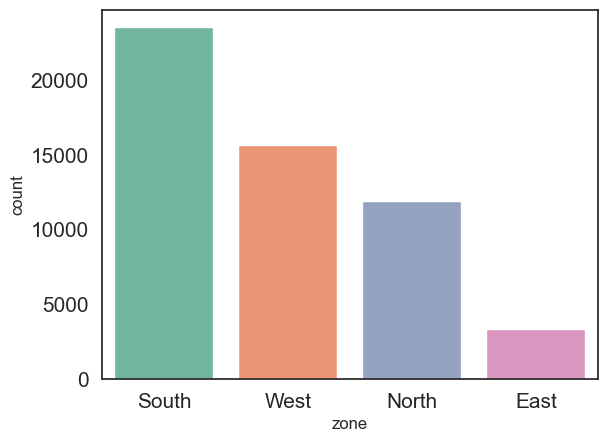

In [73]:
# zone_plot = sns.countplot(data=df_prova,x='zone',hue=df_prova.Date.dt.year,order=df_prova.zone.value_counts().index,palette='Set2')

#crims per zona geogràfica
sns.set_theme(style='white')
zone_plot = sns.countplot(data=df_prova,x='zone',order=df_prova.zone.value_counts().index,palette='Set2')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.show()

In [98]:
df_prova.zone.value_counts(normalize=True) * 100

South    43.222286
West     28.711343
North    21.838996
East      6.227375
Name: zone, dtype: float64

In [74]:
r = df_prova[(df_prova.Date.dt.hour != 0) | (df_prova.Date.dt.minute !=0)]
r = r[(r.Date.dt.hour != 0) | (r.Date.dt.minute !=1)]
#exclouem els valors atípics

In [77]:
#http://www.chicago.climatemps.com/december.php

#horari nocturn segons les hores del mes
r.loc[(r.Date.dt.month == 1) & (r.Date.dt.hour < 17) & (r.Date.dt.hour >=7), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 1) & (r.Date.dt.hour >= 17) | (r.Date.dt.hour <7), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 2) & (r.Date.dt.hour < 18) & (r.Date.dt.hour >=7), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 2) & (r.Date.dt.hour >= 18) | (r.Date.dt.hour <7), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 12) & (r.Date.dt.hour < 16) & (r.Date.dt.hour >=7), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 12) & (r.Date.dt.hour >= 16) | (r.Date.dt.hour <7), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 3) & (r.Date.dt.hour < 19) & (r.Date.dt.hour >=7), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 3) & (r.Date.dt.hour >= 19) | (r.Date.dt.hour <7), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 4) & (r.Date.dt.hour < 20) & (r.Date.dt.hour >=6), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 4) & (r.Date.dt.hour >= 20) | (r.Date.dt.hour <6), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 5) & (r.Date.dt.hour < 20) & (r.Date.dt.hour >=6), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 5) & (r.Date.dt.hour >= 20) | (r.Date.dt.hour <6), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 6) & (r.Date.dt.hour < 21) & (r.Date.dt.hour >=5), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 6) & (r.Date.dt.hour >= 21) | (r.Date.dt.hour <5), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 7) & (r.Date.dt.hour < 20) & (r.Date.dt.hour >=5), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 7) & (r.Date.dt.hour >= 20) | (r.Date.dt.hour <5), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 8) & (r.Date.dt.hour < 20) & (r.Date.dt.hour >=6), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 8) & (r.Date.dt.hour >= 20) | (r.Date.dt.hour <6), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 9) & (r.Date.dt.hour < 19) & (r.Date.dt.hour >=6), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 9) & (r.Date.dt.hour >= 19) | (r.Date.dt.hour <6), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 10) & (r.Date.dt.hour < 18) & (r.Date.dt.hour >=7), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 10) & (r.Date.dt.hour >= 18) | (r.Date.dt.hour <7), 'horari'] = 'nocturn'
r.loc[(r.Date.dt.month == 11) & (r.Date.dt.hour < 17) & (r.Date.dt.hour >=7), 'horari'] = 'diurn'
r.loc[(r.Date.dt.month == 11) & (r.Date.dt.hour >= 17) | (r.Date.dt.hour <7), 'horari'] = 'nocturn'

In [79]:
r['horari']

409        nocturn
430        nocturn
457        nocturn
467        nocturn
478          diurn
            ...   
7733373    nocturn
7733400      diurn
7733438      diurn
7733439      diurn
7733557    nocturn
Name: horari, Length: 47794, dtype: object

(array([    0.,  5000., 10000., 15000., 20000., 25000., 30000.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

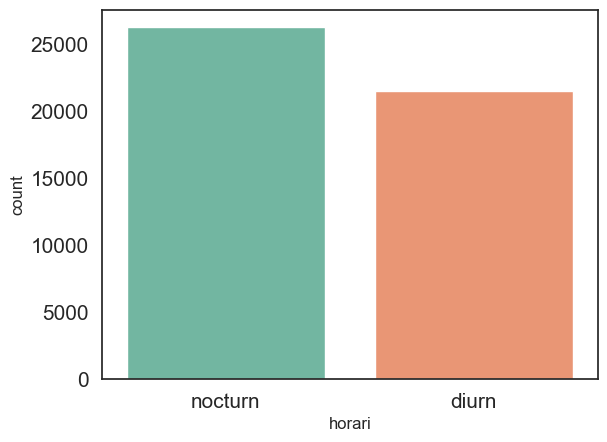

In [81]:
#agressions segons llum
zone_plot = sns.countplot(data=r,x='horari',order=r.horari.value_counts().index,palette='Set2')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

In [103]:
r.horari.value_counts(normalize=True) * 100

nocturn    54.939951
diurn      45.060049
Name: horari, dtype: float64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'RESIDENCE'),
  Text(1, 0, 'APARTMENT'),
  Text(2, 0, 'STREET'),
  Text(3, 0, 'ALLEY'),
  Text(4, 0, 'OTHER'),
  Text(5, 0, 'SIDEWALK'),
  Text(6, 0, 'VEHICLE NON-COMMERCIAL'),
  Text(7, 0, 'SCHOOL, PUBLIC, BUILDING'),
  Text(8, 0, 'HOTEL/MOTEL'),
  Text(9, 0, 'PARK PROPERTY'),
  Text(10, 0, 'RESIDENCE PORCH/HALLWAY'),
  Text(11, 0, 'HOSPITAL BUILDING/GROUNDS'),
  Text(12, 0, 'HOSPITAL BUILDING / GROUNDS'),
  Text(13, 0, 'NURSING HOME/RETIREMENT HOME'),
  Text(14, 0, 'ABANDONED BUILDING'),
  Text(15, 0, 'CHA APARTMENT'),
  Text(16, 0, 'PARKING LOT/GARAGE(NON.RESID.)'),
  Text(17, 0, 'BAR OR TAVERN'),
  Text(18, 0, 'RESIDENCE-GARAGE'),
  Text(19, 0, 'HOTEL / MOTEL')])

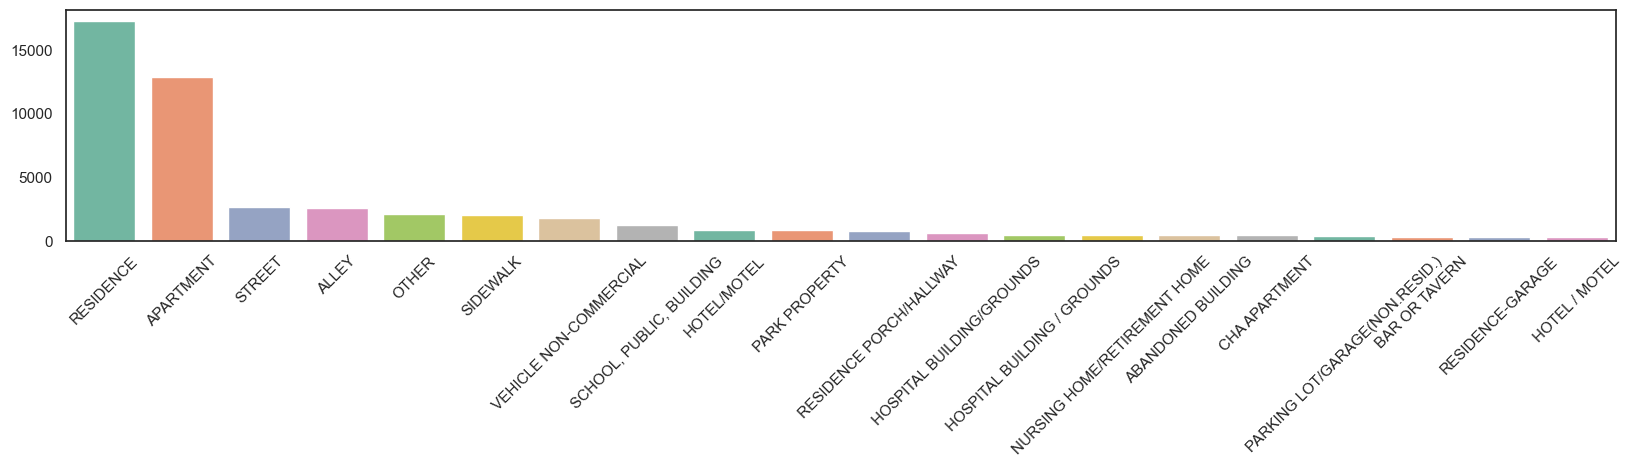

In [104]:
#número total d'agressions per localització
plt.figure(figsize=(20,3))
location_description_plot = sns.barplot(data=df_prova,x=df_prova['Location Description'].value_counts()[0:20].index,y=df_prova['Location Description'].value_counts()[0:20].values,palette='Set2')
plt.xticks(rotation=45)

In [105]:
df_prova['Location Description'].value_counts(normalize=True) * 100

RESIDENCE                                       31.813003
APARTMENT                                       23.751332
STREET                                           4.906465
ALLEY                                            4.783344
OTHER                                            3.903120
                                                  ...    
AIRPORT VENDING ESTABLISHMENT                    0.001838
VEHICLE-COMMERCIAL - TROLLEY BUS                 0.001838
ANIMAL HOSPITAL                                  0.001838
AIRPORT TERMINAL MEZZANINE - NON-SECURE AREA     0.001838
CHA PARKING LOT / GROUNDS                        0.001838
Name: Location Description, Length: 128, dtype: float64

In [106]:
df_prova.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location', 'Dates', 'Time', 'zone'],
      dtype='object')

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Crimes by District')

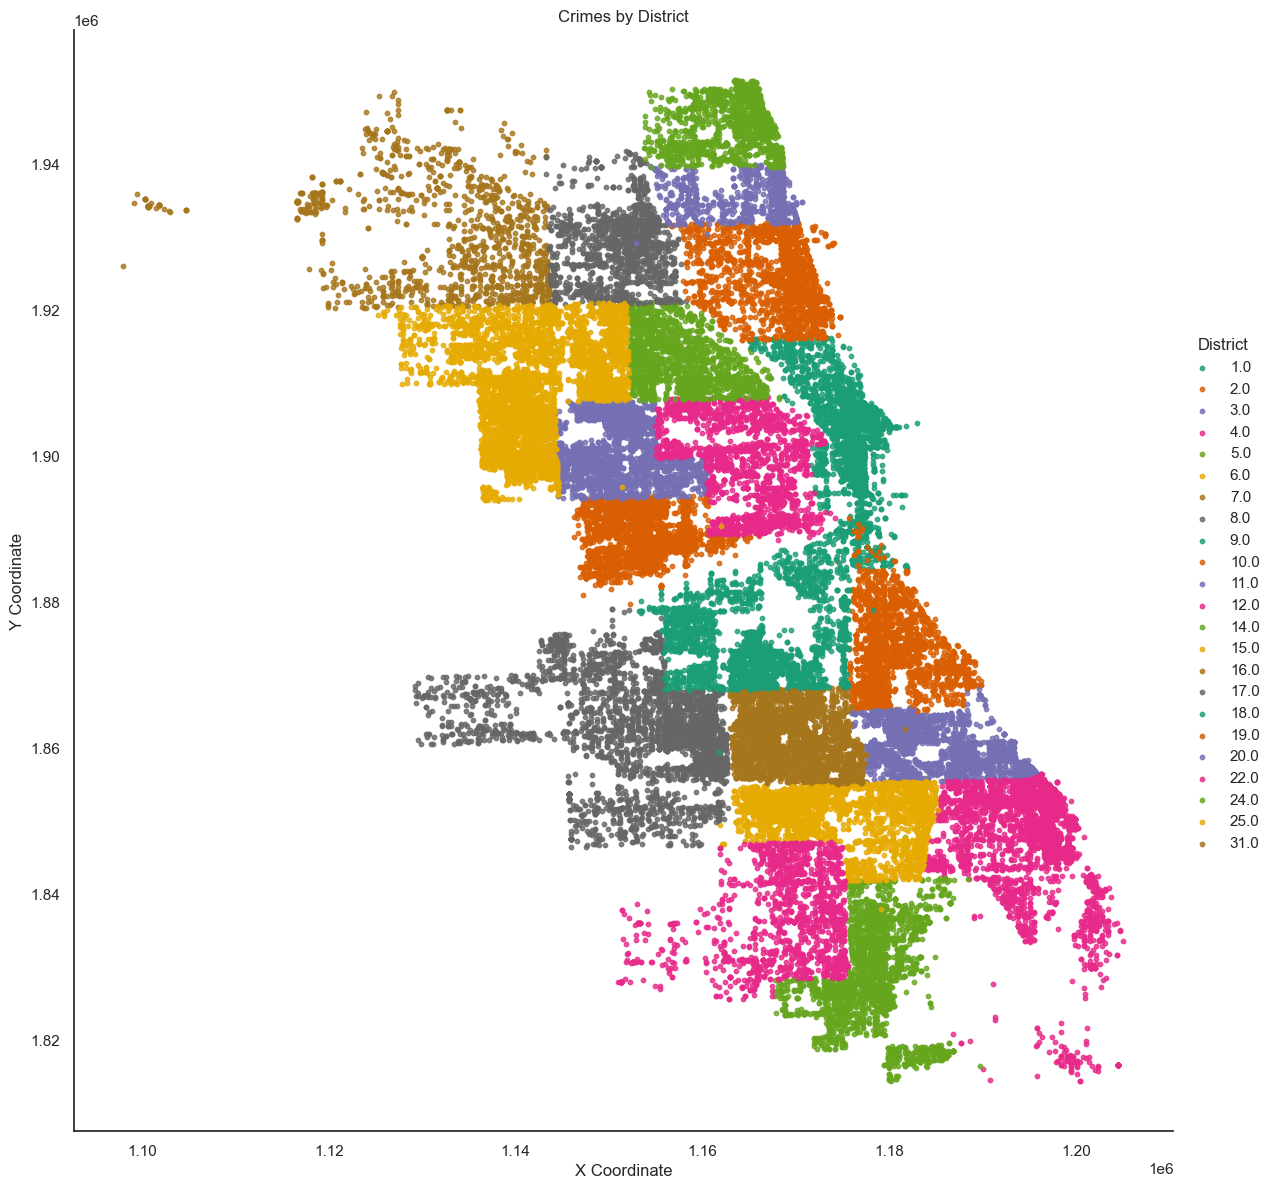

In [107]:
# A full Chicago crime by district. Maybe helpful for later when comparing our clusters

new_crimes_data = df_prova.loc[(df_prova['X Coordinate']!=0)]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="District",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "D", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by District")

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Crimes by Type of crime')

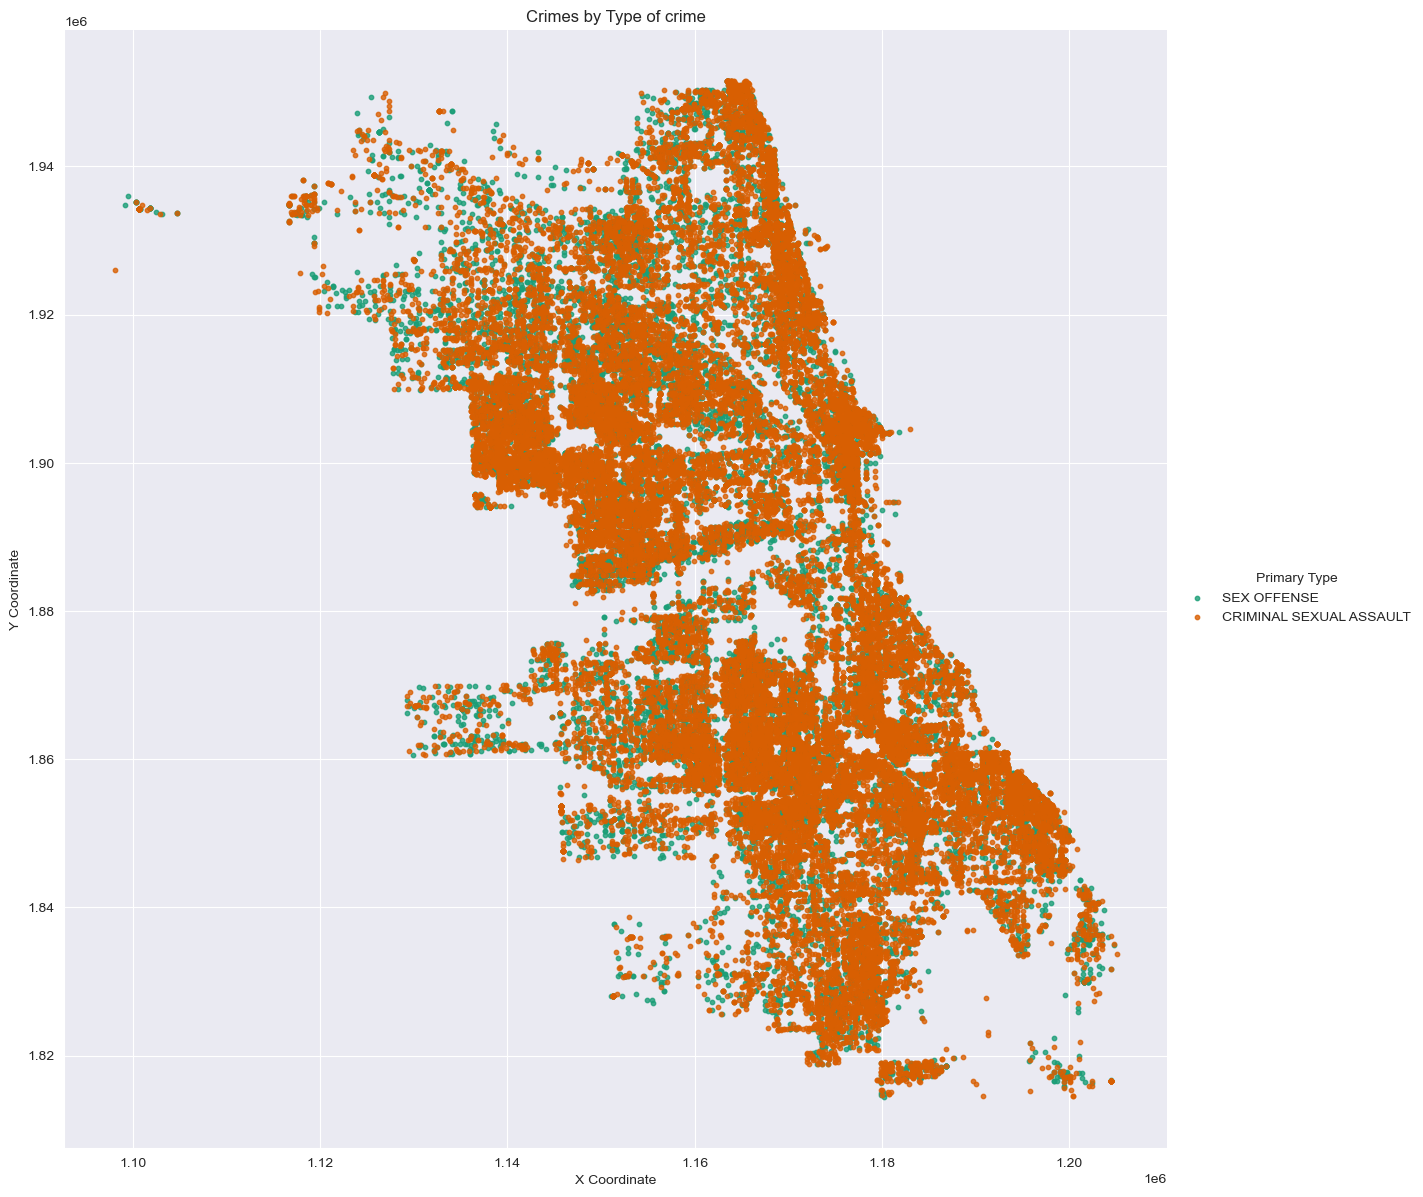

In [119]:
new_crimes_data = df_prova.loc[(df_prova['X Coordinate']!=0)]
sns.lmplot('X Coordinate', 
           'Y Coordinate',
           data=new_crimes_data[:],
           fit_reg=False, 
           hue="Primary Type",
           palette='Dark2',
           height=12,
           ci=2,
           scatter_kws={"marker": "o", 
                        "s": 10})
ax = plt.gca()
ax.set_title("Crimes by Type of crime")